<a href="https://colab.research.google.com/github/kschekmareva/Semi-Supervised-Topic-Modelling-of-RLC-and-Statistical-Analysis/blob/main/Semi_supervised_Topic_Modelling_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Необходимые импорты

In [ ]:
!pip install --no-cache-dir numpy

In [ ]:
import os
os._exit(00)

In [ ]:
!pip uninstall -y numpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import numpy as np

In [ ]:
print(np.__version__)

1.26.4


In [ ]:
import re
import pandas as pd

In [ ]:
from collections import Counter
import re

In [ ]:
import nltk

In [ ]:
import spacy
from nltk.corpus import stopwords

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2


In [ ]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import seaborn as sns

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_df.xlsx to cleaned_df.xlsx


In [ ]:
input_file_name = 'corrected_texts.xlsx'

df = pd.read_excel(input_file_name, sheet_name=0, engine="openpyxl")

FileNotFoundError: [Errno 2] No such file or directory: 'corrected_texts.xlsx'

In [ ]:
len(df)

2844

In [ ]:
df.head()

Номер примера  Номер текста  \
0              9             6   
1             15            10   
2             21            12   
3             29            14   
4             39            17   

                                     Название текста              Автор Язык  \
0  lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)  eng   
1         narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)  eng   
2  description (timed (7 min), paragraph, America...   Liza (F, HL, IH)  eng   
3  business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)  eng   
4    expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)  eng   

  Русский язык Уровень        Год  \
0           FL      IH  2009-2010   
1           HL      IM       2008   
2           HL      IH  2012-2013   
3           HL      AL       2009   
4           HL      IH  2009-2010   

                            Оригинальное предложение  \
0  Частные институты действуют {{по}} {{средствам...   
1  Когда я {{поехола}} в Париж и первый раз пошла...   
2  Мои обязанности включают смотреть за ребенком,...   
3  Подробнее о лекции можно узнать на нашем {{веб...   
4  Мы взяли интервью у name профессора, преподава...   

                            Исправленное предложение       Тег  \
0  Частные институты действуют *посредством* рыно...     orpho   
1  Когда я *поехала* в Париж и первый раз пошла *...  Translit   
2  *В мои обязанности входит* смотреть за ребенко...     Space   
3  Подробнее о лекции можно узнать на нашем *веб-...    Hyphen   
4  Мы взяли интервью у&lt; name&gt;, профессора, ...  Translit   

                                Ошибка   Исправление   Разметчик  \
0  u0441u0442u0438u043cu0443u043bu0430           NaN       admin   
1                             Эфельную      Эйфелеву   mginazova   
2                               так же         также   mginazova   
3                             вебсайте     веб-сайте  iglazunova   
4                         Портландском  Портлендском  Annotator1   

                                Комментарий  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3  Источник: НКРЯ, поисковая система, Abbyy   
4                                       NaN   

                                               Текст  \
0  В смешанной системе экономический контроль осу...   
1  Когда я поехола в Париж и первый раз пошла на ...   
2  Я работаю уборчицей пастором овец. Мои обязанн...   
3  Он подробнее будет рассказывать о причинах ста...   
4  Доклад: Интервью. Мы взяли интервью у name про...   

                                  Исправленный текст  
0  В смешанной системе экономический контроль осу...  
1  Когда я поехала в Париж и первый раз пошла на ...  
2  Я работаю уборщицей пастором овец. Мои обязанн...  
3  Он подробнее будет рассказывать о причинах ста...  
4  Доклад: Интервью. Мы взяли интервью у name про...

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Номер примера                  0
Номер текста                   0
Название текста               20
Автор                          0
Язык                         330
Русский язык                 291
Уровень                      329
Год                          847
Оригинальное предложение       0
Исправленное предложение       0
Тег                            0
Ошибка                         3
Исправление                  119
Разметчик                      0
Комментарий                 2764
Текст                        119
Исправленный текст           119
dtype: int64


### Преобработка датафрейма:

In [ ]:
mode_value = df['Название текста'].mode()[0]
df.fillna({"Название текста": mode_value}, inplace=True)
df

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2839          18099         12260   
2840          18100         12260   
2841          18101         12260   
2842          18111         12284   
2843          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2839                           Важные даты в моей жизни        SFU_Cha_Fan   
2840                           Важные даты в моей жизни        SFU_Cha_Fan   
2841                           Важные даты в моей жизни        SFU_Cha_Fan   
2842                             Моя будушая профессия         SFU-Ber_Ais   
2843      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2839  chi           FL      A2       2022   
2840  chi           FL      A2       2022   
2841  chi           FL      A2       2022   
2842  mon           FL      B2       2022   
2843  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2839  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2840  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2841  Я  окончию  университет  в  {{дветысяча }} два...   
2842               {{Там }} {{теллер }} считал  деньги.   
2843  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение       Тег  \
0     Частные институты действуют *посредством* рыно...     orpho   
1     Когда я *поехала* в Париж и первый раз пошла *...  Translit   
2     *В мои обязанности входит* смотреть за ребенко...     Space   
3     Подробнее о лекции можно узнать на нашем *веб-...    Hyphen   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  Translit   
...                                                 ...       ...   
2839  Я начал изучать *иностранный * язык в *две тыс...  Misspell   
2840  Я приехал в Россию в *две тысячи* восемнадцато...     Space   
2841  Я *окончил * университет в *две тысячи* двадца...     Space   
2842                          Там теллер считал деньги.  Translit   
2843  Я люблю путешествовать в *Пекине * не только п...  Translit   

                                   Ошибка   Исправление   Разметчик  \
0     u0441u0442u0438u043cu0443u043bu0430           NaN       admin   
1                                Эфельную      Эйфелеву   mginazova   
2                                  так же         также   mginazova   
3                                вебсайте     веб-сайте  iglazunova   
4                            Портландском  Портлендском  Annotator1   
...                                   ...           ...         ...   
2839                           иностраный  иност

In [ ]:
mode_value

'answer to questions ( - , - )'

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Номер примера                  0
Номер текста                   0
Название текста                0
Автор                          0
Язык                         330
Русский язык                 291
Уровень                      329
Год                          847
Оригинальное предложение       0
Исправленное предложение       0
Тег                            0
Ошибка                         3
Исправление                  119
Разметчик                      0
Комментарий                 2764
Текст                        119
Исправленный текст           119
dtype: int64


In [ ]:
mode_value_lang = df['Язык'].mode()[0]
df.fillna({"Язык": mode_value_lang}, inplace=True)

In [ ]:
mode_value_lang

'eng'

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Номер примера                  0
Номер текста                   0
Название текста                0
Автор                          0
Язык                           0
Русский язык                 291
Уровень                      329
Год                          847
Оригинальное предложение       0
Исправленное предложение       0
Тег                            0
Ошибка                         3
Исправление                  119
Разметчик                      0
Комментарий                 2764
Текст                        119
Исправленный текст           119
dtype: int64


In [ ]:
mode_value_rus = df['Русский язык'].mode()[0]
df.fillna({"Русский язык": mode_value_rus}, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Номер примера                  0
Номер текста                   0
Название текста                0
Автор                          0
Язык                           0
Русский язык                   0
Уровень                      329
Год                          847
Оригинальное предложение       0
Исправленное предложение       0
Тег                            0
Ошибка                         3
Исправление                  119
Разметчик                      0
Комментарий                 2764
Текст                        119
Исправленный текст           119
dtype: int64


In [ ]:
mode_value_level = df['Уровень'].mode()[0]
df.fillna({"Уровень": mode_value_level}, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Номер примера                  0
Номер текста                   0
Название текста                0
Автор                          0
Язык                           0
Русский язык                   0
Уровень                        0
Год                          847
Оригинальное предложение       0
Исправленное предложение       0
Тег                            0
Ошибка                         3
Исправление                  119
Разметчик                      0
Комментарий                 2764
Текст                        119
Исправленный текст           119
dtype: int64


In [ ]:
unique_years = df['Год'].unique()

print(unique_years)

['2009-2010' 2008 '2012-2013' 2009 2010 '2010-2011' 2011 '2008-2009'
 '2011-2012' '2009-10' '2000-2013' 2012 '2012-13' '2010-11' 2013 nan 2015
 2014 2016 2017 27022017 2018 2019 2020 2021 2022]


In [ ]:
mode_year = df['Год'].mode()[0]
mode_year

'2009-2010'

In [ ]:
df.fillna({"Год": mode_year}, inplace=True)
missing_values = df.isnull().sum()
print(missing_values)

Номер примера                  0
Номер текста                   0
Название текста                0
Автор                          0
Язык                           0
Русский язык                   0
Уровень                        0
Год                            0
Оригинальное предложение       0
Исправленное предложение       0
Тег                            0
Ошибка                         3
Исправление                  119
Разметчик                      0
Комментарий                 2764
Текст                        119
Исправленный текст           119
dtype: int64


In [ ]:
missing_error_rows = df[df['Ошибка'].isna()]
missing_error_rows

Номер примера  Номер текста  \
460           2571          1206   
493           2726          1236   
778           4090          2733   

                                       Название текста             Автор Язык  \
460  supported opinion (non-timed, paragraph, Ameri...  Anna (F, HL, AL)  eng   
493                research paper (non-timed, -, SINQ)   Bob (M, FL, IM)  eng   
778                                                  –                 –  eng   

    Русский язык Уровень        Год  \
460           HL      AL  2009-2010   
493           FL      IM  2008-2009   
778           HL      IH  2000-2013   

                              Оригинальное предложение  \
460  Старые эмигранты жалели представителей третьей...   
493  Естественно, что в путеводители {{не}} {{обяза...   
778  Вода в реке начинает испаряться и поднимается ...   

                              Исправленное предложение    Тег Ошибка  \
460  *отчасти * *отчасти* из- за того, что *те* пос...  orpho    NaN   
493  *необязательно * *необязательно* подробно гово...  orpho    NaN   
778                          *вверх. *        *вверх*   orpho    NaN   

        Исправление Разметчик Комментарий  \
460        отчасти      admin         NaN   
493  необязательно      admin         NaN   
778         вверх.      admin         NaN   

                                                 Текст  \
460  Они также думали что первая волна хочет жить в...   
493  Говоря « названии корабля увековечена память о...   
778  –, – Жара стоит уже больше месяца. Вода в реке...   

                                    Исправленный текст  
460  Они также думали что первая волна хочет жить в...  
493  Говоря « названии корабля увековечена память о...  
778  –, – Жара стоит уже больше месяца. Вода в реке...

In [ ]:
df.loc[460, "Ошибка"] = "от части"

In [ ]:
df.loc[493, "Ошибка"] = "не обязательно"

In [ ]:
df.loc[778, "Ошибка"] = "в верх"

In [ ]:
value = df.loc[473, "Оригинальное предложение"]
value

'Знамя Мира выглядит как три красные точки, расположенные {{по}} {{середине}} красного кольца на белом фоне.'

In [ ]:
df.loc[0, "Ошибка"] = "по средствам"
df.loc[0, "Исправление"] = "посредством"

In [ ]:
df.loc[114, "Ошибка"] = "рарыва"
df.loc[114, "Исправление"] = "разрыва"

In [ ]:
df.loc[223, "Исправление"] = "выводу"

In [ ]:
df.loc[224, "Исправление"] = "необходимо"

In [ ]:
df.loc[257, "Исправление"] = "будет интересна"

In [ ]:
df.loc[329, "Ошибка"] = "петербурге"
df.loc[329, "Исправление"] = "Петербурге"

In [ ]:
df.loc[330, "Ошибка"] = "историчесскую"
df.loc[330, "Исправление"] = "историческую"

In [ ]:
df.loc[356, "Исправление"] = "какого-нибудь"

In [ ]:
df.loc[357, "Исправление"] = "периодов"

In [ ]:
df.loc[377, "Ошибка"] = "Банкси"
df.loc[377, "Исправление"] = "Бэнкси"

In [ ]:
df = df.drop(index=378)
df = df.reset_index(drop=True)

In [ ]:
df.loc[473, "Исправление"] = "восстановила"

In [ ]:
df.loc[487, "Ошибка"] = "не ясно"
df.loc[487, "Исправление"] = "неясно"

In [ ]:
df.loc[488, "Ошибка"] = "о"
df.loc[488, "Исправление"] = "об"

In [ ]:
df.loc[490, "Ошибка"] = "в виду"
df.loc[490, "Исправление"] = "ввиду"

In [ ]:
df = df.drop(index=[530, 531, 546, 547])
df = df.reset_index(drop=True)

In [ ]:
df.loc[545, "Исправление"] = "дополнительных"

In [ ]:
df.loc[546, "Исправление"] = "Горбачёва"

In [ ]:
df = df.drop(index=[607, 608, 609])
df = df.reset_index(drop=True)

In [ ]:
df = df.drop(index=613)
df = df.reset_index(drop=True)

In [ ]:
df = df.drop(index=617)
df = df.reset_index(drop=True)

In [ ]:
df.loc[645, "Исправление"] = "проблемы"

In [ ]:
df = df.drop(index=[646, 647])
df = df.reset_index(drop=True)

In [ ]:
df = df.drop(index=[669, 670])
df = df.reset_index(drop=True)

In [ ]:
df.loc[674, "Ошибка"] = "пожелых"
df.loc[674, "Исправление"] = "пожилых"

In [ ]:
df.loc[736, "Ошибка"] = "говориться"
df.loc[736, "Исправление"] = "говорится"

In [ ]:
df.loc[750, "Ошибка"] = "освоится"
df.loc[750, "Исправление"] = "освоиться"

In [ ]:
df.loc[770, "Ошибка"] = "Спроектирован"
df.loc[770, "Исправление"] = "спроектирован"

In [ ]:
df.loc[782, "Ошибка"] = "что бы"
df.loc[782, "Исправление"] = "чтобы"

In [ ]:
df = df.drop(index=791)
df = df.reset_index(drop=True)

In [ ]:
df.loc[802, "Ошибка"] = "опастность"
df.loc[802, "Исправление"] = "опасность"

In [ ]:
df.loc[851, "Ошибка"] = "житы"
df.loc[851, "Исправление"] = "жить"

In [ ]:
df.loc[852, "Ошибка"] = "dетми"
df.loc[852, "Исправление"] = "детьми"

In [ ]:
df.loc[853, "Ошибка"] = "болжам"
df.loc[853, "Исправление"] = "большом"

In [ ]:
df.loc[854, "Ошибка"] = "очены"
df.loc[854, "Исправление"] = "очень"

In [ ]:
df.loc[855, "Ошибка"] = "павезло"
df.loc[855, "Исправление"] = "повезло"

In [ ]:
df.loc[856, "Ошибка"] = "песаты"
df.loc[856, "Исправление"] = "писать"

In [ ]:
df.loc[857, "Ошибка"] = "димаю"
df.loc[857, "Исправление"] = "думаю"

In [ ]:
df.loc[858, "Ошибка"] = "што"
df.loc[858, "Исправление"] = "что"

In [ ]:
df.loc[859, "Ошибка"] = "ето"
df.loc[859, "Исправление"] = "это"

In [ ]:
df.loc[860, "Ошибка"] = "очены"
df.loc[860, "Исправление"] = "очень"

In [ ]:
df.loc[861, "Ошибка"] = "поможит"
df.loc[861, "Исправление"] = "поможет"

In [ ]:
df.loc[862, "Ошибка"] = "сабираюс"
df.loc[862, "Исправление"] = "собираюсь"

In [ ]:
df.loc[868, "Ошибка"] = "Харвард"
df.loc[868, "Исправление"] = "Гарвард"

In [ ]:
df = df.drop(index=870)
df = df.reset_index(drop=True)

In [ ]:
df.loc[879, "Ошибка"] = "испоьзовать"
df.loc[879, "Исправление"] = "использовать"

In [ ]:
df.loc[880, "Ошибка"] = "Русский"
df.loc[880, "Исправление"] = "русский"

In [ ]:
df.loc[883, "Ошибка"] = "проходиш"
df.loc[883, "Исправление"] = "проходишь"

In [ ]:
df = df.drop(index=884)
df = df.reset_index(drop=True)

In [ ]:
df.loc[897, "Исправление"] = "литература"

In [ ]:
df.loc[898, "Ошибка"] = "прикрасная"
df.loc[898, "Исправление"] = "прекрасная"

In [ ]:
df.loc[899, "Ошибка"] = "американце"
df.loc[899, "Исправление"] = "американцы"

In [ ]:
df.loc[901, "Исправление"] = "взрослеют"

In [ ]:
df.loc[1096, "Исправление"] = "что"

In [ ]:
df.loc[1097, "Исправление"] = "русский"

In [ ]:
df.loc[1098, "Исправление"] = "язык"

In [ ]:
df.loc[1099, "Исправление"] = "красивый"

In [ ]:
df.loc[1446, "Исправление"] = "удаётся"

In [ ]:
df.loc[1447, "Исправление"] = "должен"

In [ ]:
df.loc[1448, "Исправление"] = "выглядеть"

In [ ]:
df.loc[1449, "Исправление"] = "то же"

In [ ]:
df.loc[1486, "Исправление"] = "гуманитарных"

In [ ]:
df.loc[1489, "Исправление"] = "он"

In [ ]:
df.loc[1512, "Исправление"] = "бояться"

In [ ]:
df.loc[1515, "Исправление"] = "могла"

In [ ]:
df.loc[1523, "Исправление"] = "смеялась"

In [ ]:
df.loc[1525, "Исправление"] = "спокойно"

In [ ]:
df.loc[1542, "Исправление"] = "Человек"

In [ ]:
df.loc[1544, "Исправление"] = "фастфуд"

In [ ]:
df.loc[1545, "Исправление"] = "По-моему"

In [ ]:
df.loc[1546, "Исправление"] = "чтобы"

In [ ]:
df.loc[1547, "Исправление"] = "чтобы"

In [ ]:
df.loc[1550, "Исправление"] = "по"

In [ ]:
df.loc[1553, "Исправление"] = "понимают"

In [ ]:
df.loc[1555, "Исправление"] = "вернуть"

In [ ]:
df.loc[1556, "Исправление"] = "альянс"

In [ ]:
df.loc[1557, "Исправление"] = "альянс"

In [ ]:
df.loc[1563, "Исправление"] = "маленький"

In [ ]:
df.loc[1564, "Исправление"] = "дешево"

In [ ]:
df.loc[1571, "Исправление"] = "молодая"

In [ ]:
df.loc[1574, "Исправление"] = "влияние"

In [ ]:
df.loc[1575, "Исправление"] = "влияние"

In [ ]:
df.loc[1576, "Исправление"] = "так же"

In [ ]:
df.loc[1577, "Исправление"] = "зелёноглазая"

In [ ]:
df.loc[1581, "Исправление"] = "преувеличиваю"

In [ ]:
df.loc[1587, "Исправление"] = "несмотря"

In [ ]:
df.loc[1588, "Исправление"] = "неправильно"

In [ ]:
df.loc[1589, "Исправление"] = "Персидский"

In [ ]:
df.loc[1593, "Исправление"] = "удочку"

In [ ]:
df.loc[1596, "Исправление"] = "компромиссы"

In [ ]:
df.loc[1600, "Исправление"] = "раза"

In [ ]:
df.loc[1601, "Исправление"] = "большого"

In [ ]:
df.loc[1606, "Исправление"] = "была"

In [ ]:
df.loc[1839, "Исправление"] = "по-моему"

In [ ]:
df.loc[1840, "Исправление"] = "рэпер"

In [ ]:
df.loc[1841, "Исправление"] = "будет"

In [ ]:
df = df.drop(index=1842)
df = df.reset_index(drop=True)

In [ ]:
df.loc[1842, "Исправление"] = "была"

In [ ]:
df.loc[1843, "Исправление"] = "была"

In [ ]:
df.loc[1950, "Исправление"] = "со"

In [ ]:
df.loc[2200, "Исправление"] = "друг"

In [ ]:
df = df.drop(index=2265)
df = df.reset_index(drop=True)

In [ ]:
df = df.drop(index=2268)
df = df.reset_index(drop=True)

In [ ]:
df.loc[2567, "Ошибка"] = "окончал"
df.loc[2567, "Исправление"] = "окончил"

In [ ]:
df = df.drop(index=[2623, 2624])
df = df.reset_index(drop=True)

In [ ]:
df.loc[2662, "Ошибка"] = "деле-"
df.loc[2662, "Исправление"] = "деле"

In [ ]:
df.loc[2748, "Исправление"] = "безобидные"

In [ ]:
df.loc[2749, "Исправление"] = "электростанции"

In [ ]:
df = df.drop(index=2754)
df = df.reset_index(drop=True)

In [ ]:
df = df.drop(index=2761)
df = df.reset_index(drop=True)

In [ ]:
df.loc[2803, "Исправление"] = "некомфортно"

In [ ]:
df = df.drop(index=2818)
df = df.reset_index(drop=True)

In [ ]:
missing_correction_rows = df[df['Исправление'].isna()]
missing_correction_rows

Empty DataFrame
Columns: [Номер примера, Номер текста, Название текста, Автор, Язык, Русский язык, Уровень, Год, Оригинальное предложение, Исправленное предложение, Тег, Ошибка, Исправление, Разметчик, Комментарий, Текст, Исправленный текст]
Index: []

In [ ]:
len(missing_correction_rows)

0

In [ ]:
unique_tags = df['Тег'].unique()

print(unique_tags)

['orpho' 'Translit' 'Space' 'Hyphen' 'Misspell' 'Ortho, Misspell'
 'Ortho, Hyphen' 'Graph' 'graph' 'Orpho' 'Orpho, Graph' 'Hyphen, Misspell'
 'ortho, Hyphen' 'Ortho, Misspell, Graph' 'space'
 'Ortho, Misspell, Hyphen']


In [ ]:
missing_text_rows = df[df['Текст'].isna()]
missing_text_rows

Номер примера  Номер текста  \
826            4367          3238   
827            4368          3238   
828            4369          3238   
830            4371          3238   
833            4373          3238   
...             ...           ...   
2289          15518          9255   
2315          15630          9281   
2426          16191          9668   
2492          16494         10058   
2577          16808         10395   

                                        Название текста            Автор  \
826   answers to questions to audio lecture (non-tim...  Nat (F, FL, AL)   
827   answers to questions to audio lecture (non-tim...  Nat (F, FL, AL)   
828   answers to questions to audio lecture (non-tim...  Nat (F, FL, AL)   
830   answers to questions to audio lecture (non-tim...  Nat (F, FL, AL)   
833   answers to questions to audio lecture (non-tim...  Nat (F, FL, AL)   
...                                                 ...              ...   
2289                       Эссе обзор подкастов о любви       Квон Икчжу   
2315                         Диалог о свободном времени              ГАх   
2426                                             Письмо            Лаура   
2492                                          Мой город      Катарина Я.   
2577                    Почему я хочу учиться в России?     SFU_Ora_Gulb   

         Язык Русский язык Уровень        Год  \
826       eng           FL      AL  2011-2012   
827       eng           FL      AL  2011-2012   
828       eng           FL      AL  2011-2012   
830       eng           FL      AL  2011-2012   
833       eng           FL      AL  2011-2012   
...       ...          ...     ...        ...   
2289      kor           FL      IM       2019   
2315      kaz           HL      IM       2020   
2426      spa           FL      NM       2020   
2492      ser           FL      B1  2009-2010   
2577  turkmen           FL      B1       2020   

                               Оригинальное предложение  \
826   &amp;lt; Мин 5: 30 разночинцы» (разночинцы – э...   
827      &amp;lt; {{Как}} описывет Толстой декабристов?   
828   &amp;lt; Какими были образованные люди до дека...   
830   &amp;lt; Как декабристы формируют общественное...   
833   &amp;lt; Как описывает Лотман идеального чинов...   
...                                                 ...   
2289  В  начале  своего  повествования  Алиса  говор...   
2315  {{Когда }} {{то }} {{я }} смотрела  в  интерне...   
2426  Этот  музей  был  о  культуре  и  традициях  к...   
2492  В  {{Требинье }} родился  {{поет &lt;}} нрзб&gt;.   
2577  У  собеседника  сразу  появлялись  вопросы: &q...   

                               Исправленное предложение       Тег  \
826   Мин 5: 30 разночинцы» (разночинцы это люди из ...  Misspell   
827                Как *описывает* Толстой декабристов?  Misspell   
828   Какими были образованные люди до декабристов?&...  Misspell   
830   Как декабристы формируют общественное мнение п...  Translit   
833   Как описывает Лотман идеального чиновника» ник...  Misspell   
...                                                 ...       ...   
2289  В начале своего повествования Алиса говорит: &...     Space   
2315  *Когда-то* смотрела в интернете рецепты, и оче...    Hyphen   
2426  Этот музей был *посвящён культуре и традициям*...  Misspell   
2492           В *Требине* родился *поэт* &lt;нрзб&gt;.  Translit   
2577  У собеседника сразу появлялись вопросы: &quot;...    Hyphen   

             Ошибка  Исправление     Разметчик  \
826    образованные    состоящие  IBaynazarova   
827             Как    описывает  IBaynazarova   
828          котоые      которые  IBaynazarova   
830               и       Глинка  IBaynazarova   
833       французки   французски  IBaynazarova   
...             ...          ...           ...   
2289          также       так же    Annotator1   
2315     Когда   то     Когда-то    AKazkenova   
2426          кичва        кечуа     MKrivolap   
2492       Требинье  

In [ ]:
df = df.dropna(subset=['Текст'])

In [ ]:
missing_text_rows_01 = df[df['Текст'].isna()]
missing_text_rows_01

Empty DataFrame
Columns: [Номер примера, Номер текста, Название текста, Автор, Язык, Русский язык, Уровень, Год, Оригинальное предложение, Исправленное предложение, Тег, Ошибка, Исправление, Разметчик, Комментарий, Текст, Исправленный текст]
Index: []

In [ ]:
unique_levels = df['Уровень'].unique()
unique_levels

array(['IH', 'IM', 'AL', 'AM', 'AH', '2013', 'A2', 'B1', 'B2', 'Other',
       'IL', 'C2', 'C1', 'NH', 'A1', 'NM'], dtype=object)

In [ ]:
unique_lang = df['Язык'].unique()
unique_lang

array(['eng', 'ita', 'ser', 'ger', 'kor', 'kaz', 'fin', 'chi', 'swe',
       'nor', 'jap', 'dut', 'est', 'taj', 'por', 'far', 'spa', 'tur',
       'ara', 'turkmen', 'slo', 'mac', 'vie', 'ben', 'fr', 'gre', 'urd'],
      dtype=object)

In [ ]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

35

In [ ]:
df = df.drop_duplicates()

In [ ]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

In [ ]:
tags_to_keep = [
    "Ortho, Misspell", "Ortho, Hyphen", "Orpho, Graph", "Hyphen, Misspell",
    "ortho, Hyphen", "Ortho, Misspell, Graph", "Ortho, Misspell, Hyphen"
]

filtered_df = df[df["Тег"].isin(tags_to_keep)]

filtered_df

Номер примера  Номер текста  \
11               62            22   
12               63            22   
13               67            23   
15               86            32   
16               88            32   
...             ...           ...   
2785          17914         11610   
2786          17923         11610   
2787          17923         11610   
2788          17940         11614   
2790          17943         11614   

                                        Название текста              Автор  \
11    expository (timed (5 min), sentences, American...  Vadim (M, HL, AL)   
12    expository (timed (5 min), sentences, American...  Vadim (M, HL, AL)   
13    expository (non-timed, paragraph (essay draft)...   Matt (M, FL, AL)   
15    description (non-timed, paragraph, Russian in ...    Bob (M, FL, IH)   
16    description (non-timed, paragraph, Russian in ...    Bob (M, FL, IH)   
...                                                 ...                ...   
2785                                           Дневник           Рали_L2_m   
2786                                           Дневник           Рали_L2_m   
2787                                           Дневник           Рали_L2_m   
2788                                   Письмо задание 2        Милана_L2_f   
2790                                   Письмо задание 2        Милана_L2_f   

     Язык Русский язык Уровень        Год  \
11    eng           HL      AL  2010-2011   
12    eng           HL      AL  2010-2011   
13    eng           FL      AL       2011   
15    eng           FL      IH  2009-2010   
16    eng           FL      IH  2009-2010   
...   ...          ...     ...        ...   
2785  urd           FL      A2       2021   
2786  urd           FL      A2       2021   
2787  urd           FL      A2       2021   
2788  ser           FL      B1       2021   
2790  ser           FL      B1       2021   

                               Оригинальное предложение  \
11    На плакате {{рбенок}}, и реклама {{предуприжде...   
12                              Красиво и {{окуратно}}.   
13    Дальше, она обращает внимание на использование...   
15    Весной {{2009}} {{ого}} года я слушал курс о р...   
16    Мы занимались отношением между Российской Импе...   
...                                                 ...   
2785  После  ужина,  я  {{сдалел }} домашнее  задани...   
2786  Я  {{сместе }} с  {{однакусниками }} и  {{прип...   
2787  Я  {{сместе }} с  {{однакусниками }} и  {{прип...   
2788  Мне  были  наиболее  интересны  предметы  мате...   
2790  Я  {{ёште }} не  знаю  что  для  меня  будет  ...   

                               Исправленное предложение  \
11    На плакате *ребёнок* и реклама *предупреждает*...   
12                                Красиво и *аккуратно*   
13    Дальше, она обращает внимание на использование...   
15    Весной *2009-го*  года я слушал курс о русской...   
16    Мы занимались *отношениями* между Российской И...   
...                                                 ...   
2785  После ужина, я *сделал* домашнее задание, посм...   
2786  *Мы* *вместе* с *однокурсниками* и *преподават...   
2787  *Мы* *вместе* с *однокурсниками* и *преподават...   
2788  Мне были наиболее интересны предметы математик...   
2790  Я *ещё* не знаю что для меня будет самым трудн...   

                         Тег         Ошибка     Исправление    Разметчик  \
11           Ortho, Misspell   предуприждет   предупреждает  ngrigoryeva   
12           Ortho, Misspell       окуратно       аккуратно  ngrigoryeva   
13           Ortho, Misspell         иммено          именно  ngrigoryeva   
15             Ortho, Hyphen       2009 ого         2009-го     tzdorova   
16             Ortho, Hyphen         19 ого           19-го     tzdorova   
...                      ...            ...             ...          ...   
2785         Ortho, Misspell     оденнацать     одиннадцать  AIvaschenko   
2786         Ortho, Misspell  однакусниками  однокурсника

In [ ]:
value_ = filtered_df.loc[11, "Оригинальное предложение"]
value_

'На плакате {{рбенок}}, и реклама {{предуприждет}} родителий о огромных компаниях моды.'

In [ ]:
len(filtered_df)

192

### Определение тематики текстов:

In [ ]:
unique_text_names = df['Название текста'].unique()
unique_text_names

array(['lecture notes (non-timed, sentences, Russian in the Major)',
       'narration (timed (7 min), paragraph, SINQ)',
       'description (timed (7 min), paragraph, American Studies)',
       'business correspondence (non-timed, paragraph, Russian in the Major)',
       'expository (non-timed, paragraph, On Democracy)',
       'argumentation (non-timed, paragraph, Russian Literature)',
       'paraphrase (non-timed, paragraph, Russian in the Major)',
       'expository (timed (5 min), sentences, American Studies)',
       'expository (non-timed, paragraph (essay draft), Environmental Sustainability)',
       'definition (timed (7 min), paragraph, Russian in the Major)',
       'description (non-timed, paragraph, Russian in the Major)',
       'supported opinion (timed (10 min), -, American Studies)',
       'supported opinion (timed, -, American Studies)',
       'summary and paraphrase (non-timed, paragraph, Russian in the Major)',
       'expository (timed (60 min), paragraph, AC

In [ ]:
sum(df['Исправленный текст'].isna())

0

In [ ]:
df['Исправленный текст'] = df['Исправленный текст'].fillna('')

In [ ]:
def preprocess_title(title):
    title = re.sub(r'\d+', '', title)
    title = re.sub(r'[_-]', ' ', title)
    title = re.sub(r'\s+', ' ', title).strip()
    title = re.sub(r'^[a-zA-Z0-9_]+_', '', title)
    title = re.sub(r'[^\w\s]', '', title)
    return title.lower()

In [ ]:
df['Очищенный заголовок'] = df['Название текста'].apply(preprocess_title)

In [ ]:
df

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2814          18099         12260   
2815          18099         12260   
2816          18100         12260   
2817          18101         12260   
2818          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2814                           Важные даты в моей жизни        SFU_Cha_Fan   
2815                           Важные даты в моей жизни        SFU_Cha_Fan   
2816                           Важные даты в моей жизни        SFU_Cha_Fan   
2817                           Важные даты в моей жизни        SFU_Cha_Fan   
2818      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2814  chi           FL      A2       2022   
2815  chi           FL      A2       2022   
2816  chi           FL      A2       2022   
2817  chi           FL      A2       2022   
2818  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2814  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2815  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2816  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2817  Я  окончию  университет  в  {{дветысяча }} два...   
2818  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение       Тег  \
0     Частные институты действуют *посредством* рыно...     orpho   
1     Когда я *поехала* в Париж и первый раз пошла *...  Translit   
2     *В мои обязанности входит* смотреть за ребенко...     Space   
3     Подробнее о лекции можно узнать на нашем *веб-...    Hyphen   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  Translit   
...                                                 ...       ...   
2814  Я начал изучать *иностранный * язык в *две тыс...     Space   
2815  Я начал изучать *иностранный * язык в *две тыс...  Misspell   
2816  Я приехал в Россию в *две тысячи* восемнадцато...     Space   
2817  Я *окончил * университет в *две тысячи* двадца...     Space   
2818  Я люблю путешествовать в *Пекине * не только п...  Translit   

            Ошибка   Исправление   Разметчик  \
0     по средствам   посредством       admin   
1         Эфельную      Эйфелеву   mginazova   
2           так же         также   mginazova   
3         вебсайте     веб-сайте  iglazunova   
4     Портландском  Портлендском  Annotator1   
...            ...           ...         ...   
2814     дветысячи    две тысячи      YuBets   
2815    иностраный  иностранный       YuBets   
2816     дветысячи    две тысячи      YuBets   
2817     дветысяча    две тысячи      YuBets   
2818        пекин

####Titles to remove

In [ ]:
titles_to_remove = [
    'description (timed (7 min), paragraph, American Studies)',
    'expository (non-timed, paragraph, On Democracy)',
    'paraphrase (non-timed, paragraph, Russian in the Major)',
    'definition (timed (7 min), paragraph, Russian in the Major)',
    'description (non-timed, paragraph, Russian in the Major)',
       'supported opinion (timed, -, American Studies)',
       'summary and paraphrase (non-timed, paragraph, Russian in the Major)',
       'expository (timed (60 min), paragraph, ACTR essay)',
       'supported opinion (non-timed, paragraph, American Studies)',
       'business correspondence (non-timed, paragraph, Russian in the Major)',
       'narration (non-timed, sentences, European Studies)',
       'expository (non-timed, paragraph, European Studies)',
       'summary (of the text read at home and analyzed in class) (timed (10 min), paragraph, Russian in the Major)',
       'description (non-timed, paragraph, American Studies)',
       'definition (non-timed, -, Russian in the Major)',
       'narration (non-timed, sentences, Environmental Sustainability)',
       'description &amp; narration (non-timed, paragraph, On Democracy)',
       'description (timed, paragraph, Environmental Sustainability)'
       'expository (non-timed, paragraph, Russian in the Major)',
       'supported opinion (timed (10 min), paragraph, European Studies)',
       'summary (non-timed, -, Russian in the Major)',
       'narration and summary (biographies) (non-timed, paragraph, On Democracy)',
       'summary (non-timed, paragraph, Russian in the Major)',
       'definition (timed (7 min), sentences, Russian in the Major)',
       'research paper (draft 1) (non-timed, paragraph, Power and Imagination)',
       'summary (nontimed, paragraph, Globalization)',
       'summary (non-timed, paragraph, Capstone)',
       'research paper (draft 1) (non-timed, paragraph, Russian in the Major)',
       'research paper (draft 2) (non-timed, paragraph, European Studies)',
       'summary (non-timed, paragraph, American Studies)',
       'description (non-timed, list, American Studies)',
       'supported opinion (non-timed, paragraph, On Democracy)',
       'expository (non-timed, paragraph, Capstone)',
       'grammar exercise (non-timed, sentences, Russian in the Major)',
       'description (non-timed, paragraph, Globalization)',
       'research paper (draft 5) (non-timed, paragraph, European Studies)',
       'paraphrase (non-timed, sentence, On Democracy)',
       'research paper (whole) (non-timed, paragraph, Russian in the Major)',
       'research paper final (non-timed, paragraph, European Studies)',
       'argumentation (timed 10 min, paragraph, Russian in the Major)',
       'research paper (non-timed, paragraph, SINQ)',
       'description (timed (10 min), paragraph, American Studies)',
       'argumentation (non-timed, paragraph, On Democracy)',
       'argumentation (non-timed, sentences, European Studies)',
       'expository (non-timed, -, SINQ)',
       'summary (non-timed, paragraph, On Democracy)',
       'supported opinion (timed (10 min), paragraph, Environmental Sustainability)',
       'description (timed (10 min), list, Russian in the Major)',
       'research paper (draft 5) (non-timed, paragraph, Russian in the Major)',
       'definition (non-timed, sentences, Russian in the Major)',
       'description (timed (7 min), paragraph, SINQ)',
       'research paper (draft 3) (non-timed, paragraph, Russian in the Major)',
       'paraphrase (timed (10 min), paragraph, Russian in the Major)',
       'paraphrase (timed (7 min), paragraph, Russian in the Major)',
       'questions (non-timed, sentences, On Democracy)',
       'compare/contrast (non-timed, -, Capstone Blog)',
       'expository (timed (5 min), paragraph, European Studies)',
       'argumentation (timed (10 min), paragraph, Power and Imagination)',
       'description (non-timed, paragraph, Capstone)',
       'expository (non-timed, paragraph (revised oral presentation speech), On Democracy)',
       'summary of video lecture (non-timed, paragraph, Russian in the Major)',
       'narration (non-timed, paragraph, On Democracy)',
       'argumentaiton (non-timed, paragraph, Russian in the Major)',
       'research paper (draft 1) (non-timed, paragraph, Environmental Sustainability)',
       'expository (non-timed, -, European Studies)',
       'paraphrase (timed (30 min), paragraph, Russian in the Major)',
       'expository (non-timed, paragraph, Advanced Russian)',
       'research paper (draft 6) (non-timed, paragraph, Power and Imagination)',
       'expository (timed (60 min), -, ACTR essay)',
       'supported opinion (timed (10 min), -, Environmental Sustainability)',
       'paraphrase (non-timed, answers to questions (video), Russian in the Major)',
       'expository (timed ( 10 min), paragraph, Russian)',
       'supported opinion (non-timed, paragraph, Power and Imagination)',
       'summary (timed 20 min, paragraph, Russian in the Major)',
       'description (timed, paragraph, American Studies)',
       'summary, report about interview (nontimed, paragraph, Globalization)',
       'research paper (presentation) (non-timed, paragraph, Russian in the Major)',
       'definition (non-timed, paragraph, Russian in the Major)',
       'paraphrase (non-timed, paragraph, FRINQ)',
       'research paper (final) (non-timed, paragraph, Russian in the Major)',
       'compare and contrast (non-timed, paragraph, Russian History)',
       'narration and decription (presentation about politician) (non-timed, paragraph, Advanced Russian)',
       'questions (non-timed, paragraph, Capstone)',
       'expository (non-timed, paragraph, Russian History)',
       'expository (non-timed, sentences, On Democracy)',
       'narration and description (write up of an interview) (non-timed, paragraph, On Democracy)',
       'argumentation (timed (5 min), paragraph, Russian in the Major)',
       'description (non-timed, paragraph, European Studies)',
       'argumentation (non-timed, paragraph, Russian in the Major)', '–',
       'summary (non-timed, paragraph, Russiаn in the Major)',
       'definition (non-timed, sentences, Russian History)',
       'definition (non-timed, sentence, lexical exercise, Russian in the Major)',
       'expository (rough draft) (non-timed, paragraph, Russian in the Major)',
       'expository (non-timed, -, Advanced Russian)',
       'argumentation (non-timed, paragraph, Power and Imagination)',
       'hypothesis (timed (5 min), paragraph, American Studies)',
       'notes (timed (5 min), sentences, American Studies)',
       'summary (non-timed, list, American Studies)',
       'research paper (non-timed, -, Environmental Sustainability)',
       'answers to questions (timed (10 min), sentences, Russian in the Major)',
       'paraphrase and answers to questions about video (nontimed, paragraph, Russian in the Major)',
       'text analysis (non-timed, paragraph, American Studies)',
       'research paper (draft 3) (non-timed, paragraph, Power and Imagination)',
       'resecrh paper (draft 4) (non-timed, paragraph, European Studies)',
       'research paper (draft 2) (non-timed, paragraph, Russian in the Major)',
       'plan (non-timed, sentences, Environmental Sustainability)',
       'expository (non-timed, paragraph, Environmental Sustainability)',
       'summary (timed (10 min), paragraph, Russian in the Major)',
       'answers (non-timed, paragraph, Russian in the Major)',
       'argumentation (non-timed, paragraph (final draft), Environmental Sustainability)',
       'narration and description (write-up of the interview) (non-timed, paragraph, On Democracy)',
       'expository (timed (7 min), paragraph, SINQ)',
       'summary and supported opinion (non-timed, paragraph, Russian in the Major)',
       'description (non-timed, paragraph, Environmental Sustainability)',
       'expository (non-timed, -, Russian in the Major)',
       'expository (non-timed, paragraph, Globalization)',
       'definition (timed (5 min), sentences, American Studies)',
       'answers to questions (non-timed, sentences, Russian in the Major)',
       'answers (non-timed, sentences, Capstone)',
       'narration (non-timed, paragraph, Russian Literature)',
       'supported opinion (non-timed, paragraph, Russian Lexical Studies)',
       'paraphrase (non-timed, paragraph, On Democracy)',
       'compare/contrast &amp; narration (, paragraph, On Democracy)',
       'research paper (non-timed, -, SINQ)',
       'description (non-timed, paragraph (oral presentation speech first draft), Environmental Sustainability)',
       'expository and description (non-timed, paragraph research paper, Russian in the Major)',
       'argumentation (letter to the president) (non-timed, paragraph, SINQ)',
       'research paper (draft 1) (non-timed, -, Advanced Russian)',
       'research paper (draft 2) (non-timed, paragraph, Power and Imagination)',
       'description (timed (10 min), paragraph, Russian in the Major)',
       'paraphrase (non-timed, sentences, On Democracy)',
       'research paper (non-timed, paragraph, American Studies)',
       'research paper (whole text) (non-timed, -, Russian in the Major)',
       'supported opinion (non-timed, paragraph, European Studies)',
       'supported opinion (non-timed, paragraph, Russian Literature)',
       'research paper (draft 1) (non-timed, paragraph, SINQ)',
       'paraphrase (non-timed, answers to questions (for video), Russian in Major)',
       'summary (non-timed, paragraph, Advanced Russian)',
       'argumentation (non-timed, paragraph, European Studies)',
       'expository (oral presentation speech final draft) (non-timed, -, Environmental Sustainability)',
       'definition (non-timed, sentences, Capstone)',
       'argumenation (non-timed, paragraph, Russian in the Major)',
       'answers to questions (non-timed, sentences, Russian History)',
       'supported opinion (timed (7 min), paragraph, American Studies)',
       'argumentation (presentation) (non-timed, paragraph, European Studies)',
       'research paper (final draft) (non-timed, paragraph, Russian in the Major)',
       'research paper (non-timed, paragraph, Russian in the Major)',
       'answers (non-timed, sentences, American Studies)',
       'summary (non-timed, paragraph, European Studies)',
       'description (non-timed, paragraph, FRINQ Globalization)',
       'expository (timed (50 min), paragraph, ACTR essay)',
       'research paper (part draft 2) (non-timed, paragraph, Russian inthe Major)',
       'argumentation (timed (10min), paragraph, Environmental Sustainability)',
       'description (non-timed, sentences, Senior Capstone)',
       'answers to questions (non-timed, sentences/answers to questions, Russian in the Major)',
       'answers to questions (non-timed, sentences, Capstone)',
       'summary (timed (5 min), sentences, European Studies)',
       'research paper (final) (non-timed, paragraph, European Studies)',
       'paraphrase and supported opinion (non-timed, paragraph, Russian Literature)',
       'supported opinion (final essay) (non-timed, -, Russain Literature)',
       'summary (timed (7 min), paragraph, Russian in the Major)',
       'questions (non-timed, sentences, Russian in the Major)',
       'narration (non-timed, paragraph, Russian History)',
       'summary (non-timed, paragraph, FRINQ Globalization)',
       'expository (non-timed, pararaph, American Studies)',
       'narration (timed (7 min), paragraph, SINQ)',
       'argumentation (timed (5 min), sentences, Globalization)',
       'expository (non-timed, sentences, Russian in the Major)',
       '- (non-timed, paragraph, Russian History)',
       'expository (rough draft 1) (non-timed, paragraph, European Studies)',
       'expository (timed (10 min), paragraph, American Studies)',
       'definition (timed (5 min), sentences, Russian in the Major)',
       'expository (non-timed, paragraph, ACTR application essay)',
       ' (non-timed, questions, On Democracy)',
       'description (non-timed, list, Environmental Sustainability)',
       'research paper (final) (non-timed, paragraph, Environmental Sustainability)',
       'narration (non-timed, paragraph, Lexicology)',
       'answers (non-timed, sentences, On Democracy)',
       'answers (non-timed, -, Russian in the Major)',
       'answers to questions to audio lecture (non-timed, sentences, Global Perspectives: Europe)',
       'expository (non-timed, paragraph second draft, On Democracy)',
       'definition (timed (5 min), paragraph, On Democracy)',
       'plan (non-timed, sentences (first draft), Environmental Sustainability)',
       'individual (Italian, expository, )',
       'individual (Serbian, expository, )',
       'individual (German, expository, A2)',
       'answer to questions ( - , - )', 'Individual ( German , FL, B1 )',
       'lecture notes (non-timed, sentences, Russian in the Major)', 'lecture notes (non-timed, sentences, Russian in the Major)',
       'narration (timed (7 min), paragraph, SINQ)',
       'description (timed (7 min), paragraph, American Studies)',
       'business correspondence (non-timed, paragraph, Russian in the Major)',
       'expository (non-timed, paragraph, On Democracy)',
       'argumentation (non-timed, paragraph, Russian Literature)',
       'paraphrase (non-timed, paragraph, Russian in the Major)',
       'expository (timed (5 min), sentences, American Studies)',
       'expository (non-timed, paragraph (essay draft), Environmental Sustainability)',
       'definition (timed (7 min), paragraph, Russian in the Major)',
       'description (non-timed, paragraph, Russian in the Major)',
       'supported opinion (timed (10 min), -, American Studies)',
       'supported opinion (timed, -, American Studies)',
       'summary and paraphrase (non-timed, paragraph, Russian in the Major)',
       'expository (timed (60 min), paragraph, ACTR essay)',
       'expository (non-timed, paragraph, Capstone)',
       'paraphrase (non-timed, paragraph, Environmental Sustainabilty)',
       'supported opinion (non-timed, paragraph, American Studies)',
       'expository (non-timed, paragraph, Russian in the Major)',
       'expository (non-timed, paragraph, European Studies)',
       'narration (non-timed, sentences, European Studies)',
       'expository (timed (7 min), paragraph, Russian in the Major)',
       'summary (of the text read at home and analyzed in class) (timed (10 min), paragraph, Russian in the Major)',
       'description (non-timed, paragraph, American Studies)',
       'expository (non-timed, paragraph, Russian Literature)',
       'research paper (non-timed, paragraph, Russian in the Major)',
       'summary (non-timed, paragraph, SINQ)',
       'summary (text for oral presentation) (non-timed, paragraph, Russian in the Major)',
       'definition (non-timed, -, Russian in the Major)',
       'narration (non-timed, sentences, Environmental Sustainability)',
       'description (timed (5 min), paragraph, American Studies)',
       'description &amp; narration (non-timed, paragraph, On Democracy)',
       'description (timed, paragraph, Environmental Sustainability)',
       'supported opinion (timed (10 min), paragraph, European Studies)',
       'summary (non-timed, -, Russian in the Major)',
       'narration and summary (biographies) (non-timed, paragraph, On Democracy)',
       'summary (non-timed, paragraph, Russian in the Major)',
       'paraphrase (timed (10 min), paragraph, Russian in the Major)',
       'definition (timed (7 min), sentences, Russian in the Major)',
       'research paper (draft 1) (non-timed, paragraph, Power and Imagination)',
       'answers to questions after video (non-timed, sentences, Russian in the Major)',
       'summary (nontimed, paragraph, Globalization)',
       'summary (non-timed, paragraph, Capstone)',
       'research paper (draft 1) (non-timed, paragraph, Russian in the Major)',
       'research paper (draft 2) (non-timed, paragraph, European Studies)',
       'summary (non-timed, paragraph, American Studies)',
       'description (non-timed, list, American Studies)',
       'supported opinion (non-timed, paragraph, On Democracy)',
       'grammar exercise (non-timed, sentences, Russian in the Major)',
       'expository and supported opinion (non-timed, -, Environmental Sustainability)',
       '–', 'description (non-timed, paragraph, Globalization)',
       'research paper (draft 5) (non-timed, paragraph, European Studies)',
       'description (non-timed, sentences, Senior Capstone)',
       'paraphrase (non-timed, sentence, On Democracy)',
       'research paper (whole) (non-timed, paragraph, Russian in the Major)',
       'research paper final (non-timed, paragraph, European Studies)',
       'argumentation (timed 10 min, paragraph, Russian in the Major)',
       'research paper (non-timed, paragraph, SINQ)',
       'description (timed (10 min), paragraph, American Studies)',
       'argumentation (non-timed, paragraph, On Democracy)',
       'argumentation (non-timed, sentences, European Studies)',
       'expository (non-timed, -, SINQ)',
       'summary (non-timed, paragraph, On Democracy)',
       'supported opinion (timed (10 min), paragraph, Environmental Sustainability)',
       'description (timed (10 min), list, Russian in the Major)',
       'expository (non-timed, sentences, Russian in the Major)',
       'research paper (draft 5) (non-timed, paragraph, Russian in the Major)',
       'definition (non-timed, sentences, Russian in the Major)',
       'description (timed (7 min), paragraph, SINQ)',
       'expository (non-timed, paragraph (rough draft), American Studies)',
       'answers (timed (5 min), sentences, Environmental Sustainability)',
       'argumentation (non-timed, -, Environmental Sustainability)',
       'research paper (draft 3) (non-timed, paragraph, Russian in the Major)',
       'notes (non-timed, sentences, Environmental Sustainability)',
       'expository (non-timed, paragraph, Russian History)',
       'paraphrase (timed (7 min), paragraph, Russian in the Major)',
       'questions (non-timed, sentences, On Democracy)',
       'compare/contrast (non-timed, -, Capstone Blog)',
       'expository (timed (5 min), paragraph, European Studies)',
       'argumentation (timed (10 min), paragraph, Power and Imagination)',
       'description (non-timed, paragraph, Capstone)',
       'expository (non-timed, paragraph (revised oral presentation speech), On Democracy)',
       'summary of video lecture (non-timed, paragraph, Russian in the Major)',
       'expository (non-timed, paragraph, Senior Capstone)',
       'paraphrase (non-timed, -, American Studies)',
       'narration (non-timed, paragraph, On Democracy)',
       'description (non-timed, paragraph, Senior Capstone)',
       'expository (non-timed, -, Advanced Russian)',
       'expository (non-timed, paragraph, American Studies)',
       'argumentation (timed (5 min), sentences, FRINQ Globalization)',
       'argumentaiton (non-timed, paragraph, Russian in the Major)',
       'research paper (draft 1) (non-timed, paragraph, Environmental Sustainability)',
       'expository (non-timed, -, European Studies)',
       'paraphrase (timed (30 min), paragraph, Russian in the Major)',
       'definition (timed (10 min), paragraph, Russian in the Major)',
       'answers to questions (timed (7 min), sentences, Russian in the Major)',
       'expository (non-timed, paragraph, Advanced Russian)',
       'research paper (draft 6) (non-timed, paragraph, Power and Imagination)',
       'expository (timed (60 min), -, ACTR essay)',
       'expository (non-timed, sentences, American Studies)',
       'supported opinion (timed (10 min), -, Environmental Sustainability)',
       'paraphrase (non-timed, sentences, On Democracy)',
       'paraphrase (non-timed, answers to questions (video), Russian in the Major)',
       'expository (timed ( 10 min), paragraph, Russian)',
       'supported opinion (non-timed, paragraph, Power and Imagination)',
       'argumentation (non-timed, -, Advanced Russian)',
       'summary (timed 20 min, paragraph, Russian in the Major)',
       'research paper (non-timed, paragraph, American Studies)',
       'description (timed, paragraph, American Studies)',
       'summary, report about interview (nontimed, paragraph, Globalization)',
       'research paper (presentation) (non-timed, paragraph, Russian in the Major)',
       'definition (non-timed, paragraph, Russian in the Major)',
       'paraphrase (non-timed, paragraph, FRINQ)',
       'description (non-timed, paragrpah, Environmental Studies)',
       'research paper (final) (non-timed, paragraph, Russian in the Major)',
       'paraphrase (non-timed, paragraph, Russian Literature)',
       'answers (timed (7 min), sentences, Environmental Sustainability)',
       'compare and contrast (non-timed, paragraph, Russian History)',
       'compare/contrast (non-timed, paragraph, Russian in the Major)',
       'narration and decription (presentation about politician) (non-timed, paragraph, Advanced Russian)',
       'questions (non-timed, paragraph, Capstone)',
       'expository (non-timed, sentences, On Democracy)',
       'narration and description (write up of an interview) (non-timed, paragraph, On Democracy)',
       'argumentation (timed (5 min), paragraph, Russian in the Major)',
       'description (non-timed, paragraph, European Studies)',
       'argumentation (non-timed, paragraph, Russian in the Major)',
       'summary (non-timed, paragraph, Russiаn in the Major)',
       'definition (non-timed, sentences, Russian History)',
       'definition (non-timed, sentence, lexical exercise, Russian in the Major)',
       'expository (rough draft) (non-timed, paragraph, Russian in the Major)',
       'argumentation (non-timed, paragraph, Power and Imagination)',
       'hypothesis (timed (5 min), paragraph, American Studies)',
       'argumentation (timed, paragraph, European Studies)',
       'notes (timed (5 min), sentences, American Studies)',
       'paraphrase (non-timed, paragraph, American Studies)',
       'summary (non-timed, list, American Studies)',
       'research paper (non-timed, -, Environmental Sustainability)',
       'answers to questions (timed (10 min), sentences, Russian in the Major)',
       'paraphrase and answers to questions about video (nontimed, paragraph, Russian in the Major)',
       'expository (timed (60 min), paragraph, ACTR Essay)',
       'narration (in style of fairy tale) (non-timed, paragraph, Power and Imagination)',
       'text analysis (non-timed, paragraph, American Studies)',
       'research paper (draft 3) (non-timed, paragraph, Power and Imagination)',
       'resecrh paper (draft 4) (non-timed, paragraph, European Studies)',
       'research paper (draft 2) (non-timed, paragraph, Russian in the Major)',
       'plan (non-timed, sentences, Environmental Sustainability)',
       'expository (non-timed, paragraph, Environmental Sustainability)',
       'summary (timed (10 min), paragraph, Russian in the Major)',
       'persuasion (non-timed, paragraph, Environmental Sustainability)',
       'supported opinion (timed (7 min), paragraph, American Stduies)',
       'research paper (whole text) (non-timed, paragraph, Russian in the Major)',
       'plan for research paper (non-timed, sentences, Russian in the Major)',
       'answers (non-timed, paragraph, Russian in the Major)',
       'argumentation (non-timed, paragraph (final draft), Environmental Sustainability)',
       'narration and description (write-up of the interview) (non-timed, paragraph, On Democracy)',
       'grammar exercise (non-timed, sentences, American Studies)',
       'paraphrase (timed (20 min), paragraph, AL)',
       'description (non-timed, paragraph, Environmental Sustainability)',
       'expository (non-timed, -, Russian Literature)',
       'expository (timed (7 min), paragraph, SINQ)',
       'summary and supported opinion (non-timed, paragraph, Russian in the Major)',
       'expository (non-timed, -, Russian in the Major)',
       'supported opinion (timed (7 min), paragraph, Russian in the Major)',
       'expository (non-timed, paragraph, Globalization)',
       'definition (timed (5 min), sentences, American Studies)',
       'summary (non-timed, sentences, Russian in the Major)',
       'notes (timed (5 min), list, European Studies)',
       'answers to questions (non-timed, sentences, Russian in the Major)',
       'answers (non-timed, sentences, Capstone)',
       'narration (non-timed, paragraph, Russian Literature)',
       'supported opinion (non-timed, paragraph, Russian Lexical Studies)',
       'summary (non-timed, paragraph, Environmental Sustainability)',
       'paraphrase (non-timed, paragraph, On Democracy)',
       'compare/contrast &amp; narration (, paragraph, On Democracy)',
       'research paper (non-timed, -, SINQ)',
       'description (non-timed, paragraph (oral presentation speech first draft), Environmental Sustainability)',
       'summary (non-timed, paragraph, Globalization)',
       'expository and description (non-timed, paragraph research paper, Russian in the Major)',
       'argumentation (letter to the president) (non-timed, paragraph, SINQ)',
       'research paper (draft 1) (non-timed, -, Advanced Russian)',
       'description (non-timed, -, SINQ)',
       'research paper (draft 2) (non-timed, paragraph, Power and Imagination)',
       'description (timed (10 min), paragraph, Russian in the Major)',
       'research paper (whole text) (non-timed, -, Russian in the Major)',
       'description (non-timed, sentences, European Studies)',
       'research paper (final) (non-timed, paragraph, Environmental Sustainability)',
       'supported opinion (non-timed, paragraph, European Studies)',
       'supported opinion (non-timed, paragraph, Russian Literature)',
       'research paper (draft 1) (non-timed, paragraph, SINQ)',
       'paraphrase (non-timed, answers to questions (for video), Russian in Major)',
       'expository (non-timed, paragraph, Power and Imagination)',
       'summary (non-timed, paragraph, Advanced Russian)',
       'argumentation (non-timed, paragraph, European Studies)',
       'expository (oral presentation speech final draft) (non-timed, -, Environmental Sustainability)',
       'definition (non-timed, sentences, Capstone)',
       'argumenation (non-timed, paragraph, Russian in the Major)',
       'answers to questions (non-timed, sentences, Russian History)',
       'supported opinion (timed (7 min), paragraph, American Studies)',
       'paraphrase (non-timed, sentences, Russian in the Major)',
       'argumentation (presentation) (non-timed, paragraph, European Studies)',
       'resecrh paper draft (5) (non-timed, paragraph, European Studies)',
       'research paper (final draft) (non-timed, paragraph, Russian in the Major)',
       'answers (non-timed, sentences, American Studies)',
       'summary (non-timed, paragraph, European Studies)',
       'description (non-timed, paragraph, FRINQ Globalization)',
       'plan (non-timed, sentences, SINQ)',
       'expository (timed (50 min), paragraph, ACTR essay)',
       'research paper (part draft 2) (non-timed, paragraph, Russian inthe Major)',
       'argumentation (timed (10min), paragraph, Environmental Sustainability)',
       'argumentation (non-timed, paragraph, Environmental Sustainability)',
       'answers to questions (non-timed, sentences/answers to questions, Russian in the Major)',
       'answers to questions (non-timed, sentences, Capstone)',
       'expository (non-timed, paragrpah, Environmental Sustainability)',
       'summary (timed (5 min), sentences, European Studies)',
       'research paper (final) (non-timed, paragraph, European Studies)',
       'paraphrase and supported opinion (non-timed, paragraph, Russian Literature)',
       'supported opinion (final essay) (non-timed, -, Russain Literature)',
       'summary (timed (7 min), paragraph, Russian in the Major)',
       'questions (non-timed, sentences, Russian in the Major)',
       'narration (non-timed, paragraph, Russian History)',
       'summary (non-timed, paragraph, FRINQ Globalization)',
       'expository (non-timed, pararaph, American Studies)',
       'argumentation (timed (5 min), sentences, Globalization)',
       'answers to questions and questions (non-timed, sentences, Russian in the Major)',
       '- (non-timed, paragraph, Russian History)',
       'expository (rough draft 1) (non-timed, paragraph, European Studies)',
       'expository (timed (10 min), paragraph, American Studies)',
       'definition (timed (5 min), sentences, Russian in the Major)',
       'expository (non-timed, paragraph, ACTR application essay)',
       'expository (Non-timed, sentences, Russian in the Major)',
       'argumentation (timed (10 min), list, Russian in the Major)',
       ' (non-timed, questions, On Democracy)',
       'description (non-timed, list, Environmental Sustainability)',
       'supported opinion (non-timed, paragraph, Russian in the Major)',
       'narration (non-timed, paragraph, Russian in the Major)',
       'narration (non-timed, paragraph, Lexicology)',
       'paraphrase (non-timed, paragraph, Environmental Sustainability)',
       'answers (non-timed, sentences, On Democracy)',
       'paraphrase (non-timed, paragraph, Power and Imagination)',
       'description, biography (non-timed, paragraph, Russian Literature)',
       'plan (non-timed, sentences, Russian in the Major)',
       'answers (non-timed, -, Russian in the Major)',
       'paraphrase (timed (15 min), paragraph, Environmental Sustainability)',
       'answers to questions to audio lecture (non-timed, sentences, Global Perspectives: Europe)',
       'expository (non-timed, paragraph second draft, On Democracy)',
       'definition (timed (5 min), paragraph, On Democracy)',
       'plan (non-timed, sentences (first draft), Environmental Sustainability)',
       'individual (Italian, expository, )',
       'individual (Serbian, expository, )',
       'individual (German, expository, A2)',
       'answer to questions ( - , - )', 'a ( - , - )',
       'Individual ( HL , B1) English', 'Individual ( German , FL, B1 )','Y_FS_текст 1 ', 'Y_FS_Чтение',
       'текст 2', 'текст 3 ', 'текст 4','текст 8', 'текст 13','текст 16 ', 'текст 20', 'текст 32',
      'текст 35', 'текст 36',
       'Политики и медиа', 'текст 37', 'текст  49', 'текст 50',
       'текст  65', 'текст 79', 'текст 81',
       'текст 96', 'текст 98', 'текст 105', 'текст 108', 'текст 135',
       'текст 143', 'Дом мышей', 'текст 159', 'текст 162', 'текст 167', 'текст 180','текст 186','текст 203', 'текст 205', 'текст 208','текст 215',
       'текст 216', 'текст 221',
       'текст 222','текст 287', 'текст 303','текст 305', 'текст 307', 'текст 328', 'EC12-B1-2495',
       'EC12-B1-1827', '0145', 'EC12-B1-1711', '9116', '8645', '7424',
       'ЕС12-В1-4930', 'EC12-B1-4953', '0126', '9126', 'EC12-B1-3991',
       'EC12-B1-6143', 'EC12-B1-2136', '7253', 'EC12-B1-4133',
       'EC12-B1-3769',
]


In [ ]:
df.loc[df['Название текста'].isin(titles_to_remove), 'Очищенный заголовок'] = np.nan

In [ ]:
df

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2814          18099         12260   
2815          18099         12260   
2816          18100         12260   
2817          18101         12260   
2818          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2814                           Важные даты в моей жизни        SFU_Cha_Fan   
2815                           Важные даты в моей жизни        SFU_Cha_Fan   
2816                           Важные даты в моей жизни        SFU_Cha_Fan   
2817                           Важные даты в моей жизни        SFU_Cha_Fan   
2818      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2814  chi           FL      A2       2022   
2815  chi           FL      A2       2022   
2816  chi           FL      A2       2022   
2817  chi           FL      A2       2022   
2818  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2814  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2815  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2816  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2817  Я  окончию  университет  в  {{дветысяча }} два...   
2818  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение       Тег  \
0     Частные институты действуют *посредством* рыно...     orpho   
1     Когда я *поехала* в Париж и первый раз пошла *...  Translit   
2     *В мои обязанности входит* смотреть за ребенко...     Space   
3     Подробнее о лекции можно узнать на нашем *веб-...    Hyphen   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  Translit   
...                                                 ...       ...   
2814  Я начал изучать *иностранный * язык в *две тыс...     Space   
2815  Я начал изучать *иностранный * язык в *две тыс...  Misspell   
2816  Я приехал в Россию в *две тысячи* восемнадцато...     Space   
2817  Я *окончил * университет в *две тысячи* двадца...     Space   
2818  Я люблю путешествовать в *Пекине * не только п...  Translit   

            Ошибка   Исправление   Разметчик  \
0     по средствам   посредством       admin   
1         Эфельную      Эйфелеву   mginazova   
2           так же         также   mginazova   
3         вебсайте     веб-сайте  iglazunova   
4     Портландском  Портлендском  Annotator1   
...            ...           ...         ...   
2814     дветысячи    две тысячи      YuBets   
2815    иностраный  иностранный       YuBets   
2816     дветысячи    две тысячи      YuBets   
2817     дветысяча    две тысячи      YuBets   
2818        пекин

In [ ]:
nan_count = df['Очищенный заголовок'].isna().sum()
nan_count

1262

In [ ]:
df['Очищенный текст'] = df['Исправленный текст'].apply(preprocess_title)
df.head()

Номер примера  Номер текста  \
0              9             6   
1             15            10   
2             21            12   
3             29            14   
4             39            17   

                                     Название текста              Автор Язык  \
0  lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)  eng   
1         narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)  eng   
2  description (timed (7 min), paragraph, America...   Liza (F, HL, IH)  eng   
3  business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)  eng   
4    expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)  eng   

  Русский язык Уровень        Год  \
0           FL      IH  2009-2010   
1           HL      IM       2008   
2           HL      IH  2012-2013   
3           HL      AL       2009   
4           HL      IH  2009-2010   

                            Оригинальное предложение  \
0  Частные институты действуют {{по}} {{средствам...   
1  Когда я {{поехола}} в Париж и первый раз пошла...   
2  Мои обязанности включают смотреть за ребенком,...   
3  Подробнее о лекции можно узнать на нашем {{веб...   
4  Мы взяли интервью у name профессора, преподава...   

                            Исправленное предложение       Тег        Ошибка  \
0  Частные институты действуют *посредством* рыно...     orpho  по средствам   
1  Когда я *поехала* в Париж и первый раз пошла *...  Translit      Эфельную   
2  *В мои обязанности входит* смотреть за ребенко...     Space        так же   
3  Подробнее о лекции можно узнать на нашем *веб-...    Hyphen      вебсайте   
4  Мы взяли интервью у&lt; name&gt;, профессора, ...  Translit  Портландском   

    Исправление   Разметчик                               Комментарий  \
0   посредством       admin                                       NaN   
1      Эйфелеву   mginazova                                       NaN   
2         также   mginazova                                       NaN   
3     веб-сайте  iglazunova  Источник: НКРЯ, поисковая система, Abbyy   
4  Портлендском  Annotator1                                       NaN   

                                               Текст  \
0  В смешанной системе экономический контроль осу...   
1  Когда я поехола в Париж и первый раз пошла на ...   
2  Я работаю уборчицей пастором овец. Мои обязанн...   
3  Он подробнее будет рассказывать о причинах ста...   
4  Доклад: Интервью. Мы взяли интервью у name про...   

                                  Исправленный текст Очищенный заголовок  \
0  В смешанной системе экономический контроль осу...                 NaN   
1  Когда я поехала в Париж и первый раз пошла на ...                 NaN   
2  Я работаю уборщицей пастором овец. Мои обязанн...                 NaN   
3  Он подробнее будет рассказывать о причинах ста...                 NaN   
4  Доклад: Интервью. Мы взяли интервью у name про...                 NaN   

                                     Очищенный текст  
0  в смешанной системе экономический контроль осу...  
1  когда я поехала в париж и первый раз пошла на ...  
2  я работаю уборщицей пастором овец мои обязанно...  
3  он подробнее будет рассказывать о причинах ста...  
4  доклад интервью мы взяли интервью у name профе...

In [ ]:
random_texts = df["Очищенный текст"].sample(n=15, random_state=42)
random_texts

1529    текст студент я покупаю одежду и обуви нормаль...
2757    письмо l м уменя вопроса куда ты хочешь поехат...
480     эта атака была очень хорошо организована всего...
1369    эссе о себе родилась я в городе иркутске южной...
1867    немного о себе осталось пять дней мы забыли сд...
1927    немного о себе но я хочу осуществить мою детск...
566     друзья по работе совсем другая история эти люд...
794     публицисты информационного сайта website думаю...
534     во вторых они очень плохо что самое хорошее хо...
1331    описание иконы стиль архитектуры восточный кра...
1790    надо ли бояться научно технического прогресса ...
1780    традиционалисты пессимисты по отношению к буду...
1563    текст студент у нас в финляндии же даже столиц...
789     онa встречается везде на телевидении различных...
1281    мои друзья у кого то их много у кого то их мал...
Name: Очищенный текст, dtype: object

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nlp = spacy.load("ru_core_news_sm")

OSError: [E050] Can't find model 'ru_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
def clean_text(text):
    doc = nlp(text)

    lemmatized_words = [
        token.lemma_ for token in doc
        if not token.is_stop and re.match(r'^[а-яА-ЯёЁ]+$', token.text)
    ]

    return " ".join(lemmatized_words)

df["Очищенный текст"] = df["Очищенный текст"].apply(clean_text)
df

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2814          18099         12260   
2815          18099         12260   
2816          18100         12260   
2817          18101         12260   
2818          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2814                           Важные даты в моей жизни        SFU_Cha_Fan   
2815                           Важные даты в моей жизни        SFU_Cha_Fan   
2816                           Важные даты в моей жизни        SFU_Cha_Fan   
2817                           Важные даты в моей жизни        SFU_Cha_Fan   
2818      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2814  chi           FL      A2       2022   
2815  chi           FL      A2       2022   
2816  chi           FL      A2       2022   
2817  chi           FL      A2       2022   
2818  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2814  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2815  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2816  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2817  Я  окончию  университет  в  {{дветысяча }} два...   
2818  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение       Тег  \
0     Частные институты действуют *посредством* рыно...     orpho   
1     Когда я *поехала* в Париж и первый раз пошла *...  Translit   
2     *В мои обязанности входит* смотреть за ребенко...     Space   
3     Подробнее о лекции можно узнать на нашем *веб-...    Hyphen   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  Translit   
...                                                 ...       ...   
2814  Я начал изучать *иностранный * язык в *две тыс...     Space   
2815  Я начал изучать *иностранный * язык в *две тыс...  Misspell   
2816  Я приехал в Россию в *две тысячи* восемнадцато...     Space   
2817  Я *окончил * университет в *две тысячи* двадца...     Space   
2818  Я люблю путешествовать в *Пекине * не только п...  Translit   

            Ошибка   Исправление   Разметчик  \
0     по средствам   посредством       admin   
1         Эфельную      Эйфелеву   mginazova   
2           так же         также   mginazova   
3         вебсайте     веб-сайте  iglazunova   
4     Портландском  Портлендском  Annotator1   
...            ...           ...         ...   
2814     дветысячи    две тысячи      YuBets   
2815    иностраный  иностранный       YuBets   
2816     дветысячи    две тысячи      YuBets   
2817     дветысяча    две тысячи      YuBets   
2818        пекин

In [ ]:
random_texts = df["Очищенный текст"].sample(n=15, random_state=128)
random_texts

1835    япония идея прийти последний год гимназия дума...
2062    окружать хороший человек любить ценить настоящ...
3       подробный рассказывать причина старение гиподи...
1370                                        школьный язык
697     искусство существовать профессионал широкий пу...
1663    человек доверять человек большинство время про...
2419    описание комната стена телевизор стена полок п...
487     образ сравнение автор лично писать гулаг траге...
92      советский союз женщина америка бархатистый брю...
1277    друг надеяться мечта сбыться будущее написать ...
2067    лето сезон год запомниться погода красота пого...
1445    финн русский финляндия коррупция обойтись сосе...
1193    день неприятный сюрприз работа выходной день в...
213     зоопарк лимпопо находиться час общежитии белоч...
910     любимый авто улицкая рассказ читать грустный о...
Name: Очищенный текст, dtype: object

In [ ]:
def postprocess_pipeline(text_series, min_freq=3, min_len=3, bigram_min_df=3):
    """
    Очистка и выделение терминов после базовой обработки (без gensim).

    Параметры:
        text_series (pd.Series): Серия строк — очищенные тексты.
        min_freq (int): Минимальная частота слова, чтобы оно считалось не редким.
        min_len (int): Минимальная длина слова.
        bigram_min_df (int): Минимальное количество текстов, в которых биграмма должна встретиться.

    Возвращает:
        pd.Series: очищенные и обработанные тексты.
    """
    tokenized = text_series.dropna().apply(lambda x: x.split())

    word_counts = Counter(word for tokens in tokenized for word in tokens)
    tokenized = tokenized.apply(lambda tokens: [
        word for word in tokens if word_counts[word] >= min_freq
    ])

    tokenized = tokenized.apply(lambda tokens: [
        word for word in tokens if len(word) >= min_len and re.match(r'^[а-яА-ЯёЁ]+$', word)
    ])
    clean_texts = tokenized.apply(lambda tokens: " ".join(tokens))

    vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=bigram_min_df)
    vectorizer.fit(clean_texts)
    frequent_bigrams = set(vectorizer.get_feature_names_out())

    def merge_bigrams(tokens):
        i = 0
        new_tokens = []
        while i < len(tokens) - 1:
            bigram = f"{tokens[i]} {tokens[i+1]}"
            if bigram in frequent_bigrams:
                new_tokens.append(bigram.replace(" ", "_"))
                i += 2
            else:
                new_tokens.append(tokens[i])
                i += 1
        if i == len(tokens) - 1:
            new_tokens.append(tokens[-1])
        return new_tokens

    tokenized = tokenized.apply(merge_bigrams)

    return tokenized.apply(lambda tokens: " ".join(tokens))

In [ ]:
df["Очищенный текст"] = postprocess_pipeline(df["Очищенный текст"])

In [ ]:
df

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2814          18099         12260   
2815          18099         12260   
2816          18100         12260   
2817          18101         12260   
2818          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2814                           Важные даты в моей жизни        SFU_Cha_Fan   
2815                           Важные даты в моей жизни        SFU_Cha_Fan   
2816                           Важные даты в моей жизни        SFU_Cha_Fan   
2817                           Важные даты в моей жизни        SFU_Cha_Fan   
2818      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2814  chi           FL      A2       2022   
2815  chi           FL      A2       2022   
2816  chi           FL      A2       2022   
2817  chi           FL      A2       2022   
2818  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2814  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2815  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2816  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2817  Я  окончию  университет  в  {{дветысяча }} два...   
2818  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение       Тег  \
0     Частные институты действуют *посредством* рыно...     orpho   
1     Когда я *поехала* в Париж и первый раз пошла *...  Translit   
2     *В мои обязанности входит* смотреть за ребенко...     Space   
3     Подробнее о лекции можно узнать на нашем *веб-...    Hyphen   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  Translit   
...                                                 ...       ...   
2814  Я начал изучать *иностранный * язык в *две тыс...     Space   
2815  Я начал изучать *иностранный * язык в *две тыс...  Misspell   
2816  Я приехал в Россию в *две тысячи* восемнадцато...     Space   
2817  Я *окончил * университет в *две тысячи* двадца...     Space   
2818  Я люблю путешествовать в *Пекине * не только п...  Translit   

            Ошибка   Исправление   Разметчик  \
0     по средствам   посредством       admin   
1         Эфельную      Эйфелеву   mginazova   
2           так же         также   mginazova   
3         вебсайте     веб-сайте  iglazunova   
4     Портландском  Портлендском  Annotator1   
...            ...           ...         ...   
2814     дветысячи    две тысячи      YuBets   
2815    иностраный  иностранный       YuBets   
2816     дветысячи    две тысячи      YuBets   
2817     дветысяча    две тысячи      YuBets   
2818        пекин

Удаление дубликатов по колонке "Очищенный текст"

In [ ]:
df_unique = df.drop_duplicates(subset=["Очищенный текст"])

In [ ]:
len(df_unique)

2149

### Полуавтоматический подход к определению тематик текстов, статистический анализ:

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
# Загрузка стоп-слов
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_df.xlsx to cleaned_df.xlsx


In [ ]:
input_file_name = 'cleaned_df.xlsx'

df = pd.read_excel(input_file_name, sheet_name=0, engine="openpyxl")

In [ ]:
len(df)

2665

In [ ]:
df

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2660          18099         12260   
2661          18099         12260   
2662          18100         12260   
2663          18101         12260   
2664          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2660                           Важные даты в моей жизни        SFU_Cha_Fan   
2661                           Важные даты в моей жизни        SFU_Cha_Fan   
2662                           Важные даты в моей жизни        SFU_Cha_Fan   
2663                           Важные даты в моей жизни        SFU_Cha_Fan   
2664      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2660  chi           FL      A2       2022   
2661  chi           FL      A2       2022   
2662  chi           FL      A2       2022   
2663  chi           FL      A2       2022   
2664  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2660  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2661  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2662  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2663  Я  окончию  университет  в  {{дветысяча }} два...   
2664  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение       Тег  \
0     Частные институты действуют *посредством* рыно...     orpho   
1     Когда я *поехала* в Париж и первый раз пошла *...  Translit   
2     *В мои обязанности входит* смотреть за ребенко...     Space   
3     Подробнее о лекции можно узнать на нашем *веб-...    Hyphen   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  Translit   
...                                                 ...       ...   
2660  Я начал изучать *иностранный * язык в *две тыс...     Space   
2661  Я начал изучать *иностранный * язык в *две тыс...  Misspell   
2662  Я приехал в Россию в *две тысячи* восемнадцато...     Space   
2663  Я *окончил * университет в *две тысячи* двадца...     Space   
2664  Я люблю путешествовать в *Пекине * не только п...  Translit   

            Ошибка   Исправление   Разметчик  \
0     по средствам   посредством       admin   
1         Эфельную      Эйфелеву   mginazova   
2           так же         также   mginazova   
3         вебсайте     веб-сайте  iglazunova   
4     Портландском  Портлендском  Annotator1   
...            ...           ...         ...   
2660     дветысячи    две тысячи      YuBets   
2661    иностраный  иностранный       YuBets   
2662     дветысячи    две тысячи      YuBets   
2663     дветысяча    две тысячи      YuBets   
2664        пекин

In [ ]:
nan_rows = df[df["Очищенный заголовок"].isna()]

In [ ]:
len(nan_rows)

91

In [ ]:
unique_text_names = df['Название текста'].unique()
unique_text_names

array(['lecture notes (non-timed, sentences, Russian in the Major)',
       'narration (timed (7 min), paragraph, SINQ)',
       'description (timed (7 min), paragraph, American Studies)',
       'business correspondence (non-timed, paragraph, Russian in the Major)',
       'expository (non-timed, paragraph, On Democracy)',
       'argumentation (non-timed, paragraph, Russian Literature)',
       'paraphrase (non-timed, paragraph, Russian in the Major)',
       'expository (timed (5 min), sentences, American Studies)',
       'expository (non-timed, paragraph (essay draft), Environmental Sustainability)',
       'definition (timed (7 min), paragraph, Russian in the Major)',
       'description (non-timed, paragraph, Russian in the Major)',
       'supported opinion (timed (10 min), -, American Studies)',
       'supported opinion (timed, -, American Studies)',
       'summary and paraphrase (non-timed, paragraph, Russian in the Major)',
       'expository (timed (60 min), paragraph, AC

In [ ]:
titles_to_remove_set = set(titles_to_remove)

filtered_titles = [title for title in unique_text_names if title not in titles_to_remove_set]

In [ ]:
filtered_titles

['Русский язык в моей жизни',
 'Стихотворение Маршака "Дурак"',
 'Классическая литература',
 'Музыкальное воспитание',
 'Салон',
 'Соломенный вдовец',
 'Карикатура',
 'Переутомилась',
 'Портрет',
 'Моралист',
 'Как вести себя за столом',
 'Перед матчем',
 'Спать пора',
 'Наивный покупатель',
 'Путешествие',
 'Частное письмо',
 'День неприятных сюрпризов',
 'Самое неудачное путешествие',
 'Личное письмо',
 'Моя бабушка',
 'Комментарий к статье: IBM подключается к борьбе китайских властей со смогом в Пекине',
 'Сочинение по книге "Там, где летают орлы"',
 'Загрязнение окружающей среды',
 'Америка Моими Глазами',
 'Достоинство и ответственность Мастера как автора',
 'Кинорецензия на фильм "На волосок от смерти"',
 'Мои друзья',
 'Мои бабушки',
 'Моя любимая бабушка',
 'Мои любимые бабушки',
 'Гранатовый браслет: сравнение повести и фильма',
 'Мой лучший друг',
 'Самая страшная история',
 'Самая страшная история, которая произошла со мной',
 'Мои корни',
 'Самое интересное место в мире',
 

In [ ]:
nan_rows = df[df["Очищенный заголовок"].isna()]

In [ ]:
nan_rows

Номер примера  Номер текста Название текста    Автор Язык Русский язык  \
115             626           272               –        –  eng           HL   
116             628           272               –        –  eng           HL   
307            1677           733               –        –  eng           HL   
315            1713           739               –        –  eng           HL   
316            1714           739               –        –  eng           HL   
...             ...           ...             ...      ...  ...          ...   
1571          10707          5300            0126  unknown  eng           HL   
1572          10708          5300            0126  unknown  eng           HL   
1573          10715          5302            9126  unknown  eng           HL   
1574          10716          5302            9126  unknown  eng           HL   
1593          10802          5312            7253  unknown  eng           HL   

     Уровень        Год                           Оригинальное предложение  \
115       IH  2000-2013  Культура {{андерграунда}}, конечно, связана не...   
116       IH  2000-2013  Я недовольна, что такая культура {{андергроунд...   
307       IH  2000-2013  Я думаю что самая большая разница между {{свод...   
315       IH  2000-2013  .{{Так}} {{же}} приводятся примеры людей, кото...   
316       IH  2000-2013  Я {{так}} {{же}} согласна с тем, что женщина, ...   
...      ...        ...                                                ...   
1571      IL  2009-2010  В  заключение,  друг  это  больше  чем  знаком...   
1572      IL  2009-2010  Трудно  жить  без  ковото  кто  {{понастоящшем...   
1573      IL  2009-2010  Иногда  она  играла  {{сдругими }} детми,  но ...   
1574      IL  2009-2010  Летом  перед  четвертым  классом  мать  Лили  ...   
1593      IL  2009-2010  Я  положил  его  подполе  {{с }} {{воими }} ру...   

                               Исправленное предложение  \
115   Культура *андеграунда* конечно, связана не тол...   
116   Я недовольна, что такая « *андеграунда* андерг...   
307   Я думаю что *самое* *большое* *отличие* между ...   
315   *Также* приводятся примеры людей, которые дела...   
316   Я *также* согласна с тем, что женщина, которая...   
...                                                 ...   
1571  В заключение, друг это больше чем знакомый, он...   
1572  Трудно жить без *того* кто *по-настоящему* пон...   
1573  Иногда она играла *с другими* *детьми,* но обы...   
1574  Летом перед четвертым классом мать Лили умерла...   
1593        Я положил его *в подполье* *своими* руками.   

                          Тег         Ошибка    Исправление    Разметчик  \
115                  Translit   андерграунда    андеграунда    EZalivina   
116                  Translit   андергроунда    андеграунда    EZalivina   
307                  Misspell      сводобным      свободным     sdurneva   
315                     Space        .Так же          Также     sdurneva   
316                     Space         так же          также     sdurneva   
...                       ...            ...            ...          ...   
1571                 Misspell       предоный      преданный  AFayzullina   
1572  Ortho, Misspell, Hyphen  понастоящшему  по-настоящему  AFayzullina   
1573                    Space       сдругими      с другими    SFedotova   
1574                    Space         отрака       от рака,    SFedotova   
1593                    Space      с   воими         своими     DShubina   

                                            Комментарий  \
115                                                 NaN   
116                                                 NaN   
307                                                 NaN   
315                                                 NaN   
316                                                 NaN   
...                                                 ...   
1571   комплексная ошибка в написании слова "преданный"   
1572  комплекс

In [ ]:
def clean_title(title: str) -> str:
    if pd.isna(title):
        return ""
    title = re.sub(r'^(?:[\w\-]*_)+', '', title)
    title = re.sub(r'\bтекст\s*\d+\b', '', title, flags=re.IGNORECASE)
    title = re.sub(r'^\d{1,4}[\.\)]?\s*', '', title)

    title = title.replace('\xa0', ' ')
    title = re.sub(r'[«»“”„"]', '', title)
    title = re.sub(r'[^\w\s]', ' ', title)
    title = re.sub(r'\s+', ' ', title).strip()

    title = title.lower()
    doc = nlp(title)
    lemmatized = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]

    return ' '.join(lemmatized)

In [ ]:
cleaned_filtered_titles = [clean_title(t) for t in filtered_titles]

In [ ]:
df['Очищенное название текста RLC'] = df['Название текста'].apply(
    lambda x: clean_title(x) if pd.notnull(x) and clean_title(x) in cleaned_filtered_titles else np.nan
)

In [ ]:
df

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2660          18099         12260   
2661          18099         12260   
2662          18100         12260   
2663          18101         12260   
2664          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2660                           Важные даты в моей жизни        SFU_Cha_Fan   
2661                           Важные даты в моей жизни        SFU_Cha_Fan   
2662                           Важные даты в моей жизни        SFU_Cha_Fan   
2663                           Важные даты в моей жизни        SFU_Cha_Fan   
2664      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2660  chi           FL      A2       2022   
2661  chi           FL      A2       2022   
2662  chi           FL      A2       2022   
2663  chi           FL      A2       2022   
2664  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2660  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2661  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2662  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2663  Я  окончию  университет  в  {{дветысяча }} два...   
2664  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение       Тег  \
0     Частные институты действуют *посредством* рыно...     orpho   
1     Когда я *поехала* в Париж и первый раз пошла *...  Translit   
2     *В мои обязанности входит* смотреть за ребенко...     Space   
3     Подробнее о лекции можно узнать на нашем *веб-...    Hyphen   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  Translit   
...                                                 ...       ...   
2660  Я начал изучать *иностранный * язык в *две тыс...     Space   
2661  Я начал изучать *иностранный * язык в *две тыс...  Misspell   
2662  Я приехал в Россию в *две тысячи* восемнадцато...     Space   
2663  Я *окончил * университет в *две тысячи* двадца...     Space   
2664  Я люблю путешествовать в *Пекине * не только п...  Translit   

            Ошибка   Исправление   Разметчик  \
0     по средствам   посредством       admin   
1         Эфельную      Эйфелеву   mginazova   
2           так же         также   mginazova   
3         вебсайте     веб-сайте  iglazunova   
4     Портландском  Портлендском  Annotator1   
...            ...           ...         ...   
2660     дветысячи    две тысячи      YuBets   
2661    иностраный  иностранный       YuBets   
2662     дветысячи    две тысячи      YuBets   
2663     дветысяча    две тысячи      YuBets   
2664        пекин

In [ ]:
len(df)

2665

In [ ]:
cleaned_titles_rlc = df[df['Очищенное название текста RLC'].notna() & (df['Очищенное название текста RLC'] != '')]['Очищенное название текста RLC'].to_list()

In [ ]:
len(cleaned_titles_rlc)

1401

In [ ]:
set(cleaned_titles_rlc)

{'personal interview with jayle',
 'август',
 'америка мой глаз',
 'анализ выступление',
 'анализ интервью',
 'анализ клип звери',
 'анкета',
 'анна ахматов',
 'аристократка',
 'бабушка и дедушка',
 'беглянки от любвы не убежать режиссёр юсуп расыков 2007 год',
 'безумие большой город',
 'биографиа мой мама',
 'биография',
 'биография вилле хаапасало',
 'бронирование гостиница',
 'будущее начинаться сегодня',
 'быть ли в ваш жизнь место чудесам',
 'в музей',
 'в общежитие',
 'в первый свиданий',
 'важный дата в мой жизнь',
 'важный навык',
 'важный случай из собственный жизнь за 3 сентябрь',
 'внешность и характер одной женщина',
 'воиспоминания о школа',
 'вокруг слишком много или слишком мало музыка',
 'вокруг слишком много слишком мало музыка',
 'воспоминание о детство',
 'воспоминание о школа',
 'все мечтать разбогатеть',
 'вспышка болезнь и глобальный здравоохранение',
 'вы любить общаться с сосед',
 'выбор профессия',
 'высокий образование',
 'где мышь',
 'герой наш время',
 'гер

In [ ]:
len(set(cleaned_titles_rlc))

431

In [ ]:
clusters = {
    "Личное, биографии и воспоминания": [
        "биографиа мой мама",
        "биография",
        "важный случай из собственный жизнь за 3 сентябрь",
        "воспоминание о детство",
        "воспоминание о школа",
        "когда я быть маленький",
        "в музей",
        "в общежитие",
        "в первый свиданий",
        "за что я любить алматы",
        "день который запомнится навсегда",
        "день неприятный сюрприз",
        "немного о себя",
        "биография",
        "мой день",
        "мой родной город",
        "мой родной край",
        "мой обычный день",
        "мой наблюдение над ребёнок",
        "мой опыт волонтерства",
        "мой ужасный день",
        "рассказ о себя",
        "я через 10 год",
        "я через десять год",
        "биография вилле хаапасало",
       "personal interview with jayle ",
'важный дата в мой жизнь',
'воиспоминания о школа',
'диалог о свободный время',
"дневник",
'история о девушка',
'как я провёл лето',
'мой город',
"мой идеальный выходной день", 'мой изобретение', 'мой корень',
'мой хобби', "о внешность",
'о первый зарплата',
'перед матч',
'пересказ текст о виктор 1',
"про себя",
'рассказ',
"родной край",
'самая страшный история',
'самая страшный история в мой жизнь',
'самая страшный история которая произойти со мной',
'смешной история',
"совет другу о другой страна",
'страшный история',
'творчество в мой жизнь',
"типичный день анна",
"хобби",
"хороший пора человеческий жизнь",
'эйфория',
'эссе о себя'
    ],
    "Общество, культура, язык, традиции, нация": [
        "письмо о социальный сеть",
        "русский вопрос в современный финляндия",
        "русский рабочия сила в финляндия",
        "финляндия и россия",
        "финляндский пресса о россия",
        "различие между финляндия и россия",
        "разница между русскими и финна",
"финн и русский"
        "отношение россиянин и финн к деньга",
        "гречиско католический русский община национальный проблема в южный восточный карелия с 1889 по 1939 год",
        "двуязычие",
        "трилингвизм",
        "мультикультурное общество",
        "интеллигенция и она роль в жизнь общество",
        "национальный традиция",
        "черта русский характер швейцарский немецкий",
        "описание икона",
        "мой билингвальная история",
"америка мой глаз",
"дом правительство",
"образ россия в финляндский сми",
 "образ русский тема в финляндский пресса",
'значимый исторический событие',
'ингермаландцы',
"как вести себя за стол",
'карате',
'качество жизнь в мой страна',
"модернизация в россия от империя до федерация",
'мой русский родной чужой язык', 'мой русский язык',
"о закон",
'о модернизация',
'о педагогический практика',
'о различие между финн и русскими',
"о религия",
"о русский язык",
'о русский язык и о россия',
"о язык", "об эмиграция",
'общественный деятельность студент',
'последний поклон русский крестьянство и культура',
'почему русский женщина похожий на проститутка по мнение финн',
'право человек',
'предложение с глагол тянуть',
'проблема современный молодой человек',
"проблема современный общество",
'речь главный характеристика человек',
'россия мой глазазами',
'русский язык в мой жизнь',
"свобода не голосовать безразличие или общественный позиция",
'социальный коллективность что ищют в нем человек',
"социальный неравенство",
'татиана римский',
"торговля",
"человек оказать на меня большой влияние",
"что вы мочь сказать о современный ребёнок",
'экспо в астана',
'эссе о проблема иммигрант',
    ],
    "Учёба, образование, профессия": [
        "письмо о стипендия",
        "высокий образование",
        "учеба в университет",
        "учеба в школа и учеба в университет",
        "первый день в университет",
        "первый день в университет 2",
        "первый день в университет 3",
        "учёба и обучение в университет в финляндия и в россия некоторый сравнительный заметка",
        "дистанционный обучение",
        "итоговый экзамен",
        "об учёба",
        "об учёба в академия",
        "об учёба в университет",
        "зачем нужный высокий образование",
        "текущий ситуация в мой специальность",
        "мой специальность",
        "мой профессия",
        "о выбор профессия",
        "выбор профессия",
        "письмо о стипендия",
'дорога до университет',
'итог семестр', 'как жить московский иностранный студент',
'наш университет', "о школа", 'об образование',
'обучение и самоизоляция',
'онлайн и офлайн образование',
'онлайн или офлайн',
'офлайн или онлайн',
'почему я хотеть учиться в россия',
'совет выпускник школа',
"рассказ по картинка",
'сочинение с использование разный местоимение',
'студенческий жизнь',
'учитель против ученик',
'школьный год',
'школьный год продолжение',
'эссе об онлайн обучение',
'эссе рассказ из глагол'
    ],
    "Современные вызовы: технологии, здоровье, экология": [
        "интернет друг или враг",
        "машинный обучение",
        "техника развиваться а человек деградировать",
        "об эммиграция",
        "вспышка болезнь и глобальный здравоохранение",
        "комментарий к статья ibm подключаться к борьба китайский власть со смог в пекин",
        "экология",
        "экологический проблема наш страна",
        "экология или комфорт",
        "жизнь современный человек и экология",
        "о пандемия",
        "наивный покупатель",
'вспышка болезнь и глобальный здравоохранение',
'дикий животный',
'животный и растительный мир',
'загрязнение окружать среда',
'земля с нами',
'красота и здоровье',
'надо ли бояться научно технический прогресс',
"о здоровье",
'о наука',
'о сбор мусор',
"о спорт",
'общество и экология',
'спорт',
'спорт в мой жизнь',
'спорт это для каждый',
'эссе о спорт',
'я и животние'
    ],
    "Искусство, кино, музыка, литература": [
        "о искусство",
        "об искусство",
        "анализ выступление",
        "анализ интервью",
        "анализ клип звери",
"аристократка",
'беглянки от любвы не убежать режиссёр юсуп расыков 2007 год',
'безумие большой город',
        "интервю в телевизор",
        "интервью",
        "интервью с исн",
        "интервью с комический актриса луйзой умиэланом",
        "интервью с незнаменитом артист",
        "о кино",
        "фильм который произвести впечатление",
        "фильм мой грех 2011",
        "кинорецензия на фильм на волосок от смерть",
        "дневник о фильм доктор живаго по роман борис пастернак",
        "гранатовый браслет сравнение повесть и фильм",
        "анна ахматов",
        "классический литература",
        "о любимый фильм",
        "о любимый книга",
        "о мода",
        "мода и любимый модельер",
        "мода и традиция",
        "вокруг слишком много или слишком мало музыка",
'вокруг слишком много слишком мало музыка',
        "музыка",
        "музыкальный воспитание",
        "эссе по фильм о война",
        "эссе об писательство",
        "чтение и книга",
        "чтение",
        "я и балет",
        "лорэнзо поёт",
        "юнона и авось",
'герой наш время',
"дневник о просмотр сериал российский империя",
'идиот ф достоевский',
'как я понимать стихотворение блудный сын',
'какой фильм мне нравиться',
'карикатура',
'коллекционирование',
'коллекционирование что оно давать мне',
'место художественнои литература',
'мещанин в дворянство', 'мой любить филмы',
"о фильм",
"онисание картина м к эшера",
'портрет',
'рассказ василий шукшин',
'салон',
"сашко коцев",
"современный исскуство",
'сочинение по книга там где летать орёл',
'стихотворение маршак дурак',
'фрагмент определение северный морской путь',
'эссе о подкаст',
'эссе обзор подкаст о любовь'
    ],
    "Философия, психология, мораль, личностный рост": [
        "главный проблема человечество",
        "глобальный проблема человечество",
        "правда и ложь",
        "милосердие благотворительность великодушие",
        "что такой справедливость",
        "стоить ли делать добро человек",
        "смысл жизнь",
        "почему гарри поттер хороший властелин кольцов",
        "человек и природа",
        "человек и общество",
        "человек теперь уже не читать но нам ещё нужный",
        "пирамида потребность маслоу",
        "мой наследие",
        "лестница в небо что помогать и что мешать успешный карьера",
        "как добиться успех",
        "как достигнуть успех",
        "как побороть лень",
        "как найти время для весь дело",
        "гипотез самоугасания",
        "социальный мобильность миф или реальность",
'будущее начинаться сегодня',
'быть ли в ваш жизнь место чудесам',
        "важный навык",
'все мечтать разбогатеть',
'где мышь',
'герой наш время какой он каковы он желание и стремление',
'достоинство и ответственность мастер как автор',
"доходный дом ",
'здоровье и настроение',
'знание сила',
'как жить одному',
'как удачно выйти замуж жениться',
'какой должный быть свадьба',
'которым из два хороший кофе или чай',
'мечта', 'мне не больно', 'молодость',
 "молодость время поиск и эксперимент",
'моралист',
'нежный возраст',
'о достижение',
"о жизненный принцип",
'о мечтах',
"о счастие",
"о ценность время",
"об ошибка",
'эссе',
"образ жизнь",
'ой чёрный кошка перебежать',
"ответ на вопрос",
"порядок",
'порядок и беспорядок',
'почему сабаками мне нравиться болше чем кошка',
'правило жизнь',
'социальный сеть и живой общение',
'стресс проблема наш век',
'традиционалист пессимисты по отношение к будущее и оптимист по отношение к прошлый',
'чей пример вас вдохновлять',
'что вас удивлять в человек',
'что вы делать если хотеть расположить к себя человек',
'что вы уметь делать особенно хорошо',
'что я любить',
'что я уметь делать хорошо',
'что я хотеть научиться',
'что я хотеть научиться в близкий время',
'эссе выражение эмоция',
'эссе о красота',
'эссе о происхождение человек'
],
    "Коммуникация, межличностные отношения, семья": [
       'личный письмо',
        "о любовь",
        "о подруга",
        "друг",
        "мой хороший друг",
        "мой подруга",
        "о добрый поступок",
        "мой семья",
        "общение в семья",
        "такой у меня подруга",
        "молодой семья должный жить вместе с родитель",
        "отношение к брак",
        "согласие родитель на брак не обязательный но важный",
        "мужчина должный зарабатывать деньга а женщина вести домашний хозяйство",
        "он и она",
        "внешность и характер одной женщина",
        "письмо подруга",
        "письмо родитель",
        "письмо друг",
"бабушка и дедушка",
'вы любить общаться с сосед'   ,
"детский площадка",
'диалог о дружба',
'какой качество я особенно ценить в человек',
'мой бабушка', "мой любимый бабушка", "мой друг", "мой хороший подруга",
'романтик', "семейный традиция",
'семья',
'современный семья находиться в глубокий кризис',
'солнце старик и девушка',
'соломенный вдовец',
'старший и младший',
'эссе о социальный сеть',
"семья и семейный ценность",
         "письмо родитель",
        "письмо коста",
        "письмо друг",
        "письмо подруга"
],
    "Путешествия и география": [
        "интересный путешествие",
        "путешествие",
        "путешествие и путешественник",
        "путешествие хобби",
        "самое интересный место в мир",
        "самое незабвенный путешествие мой жизнь",
        "самое неудачный путешествие",
        "как путешествие изменить меня",
        "поездка в рим",
        "два день в таллинн",
        "парк панфиловцев в алматы",
        "переехать в другую страна",
        "об одной поездка",
        "письмо о путешествие",
        "о поездка в польша",
        "заказать матрас чудо",
'бронирование гостиница',
'италия', 'москва',
 'о достопримечательность москва',
'о москва',
"о хельсинки",
'первый раз в алматы',
"петрозаводск",
'путешествие на кораблике',
"рассказ быть ещё парк и ресторан",
"реклама отель за 10 сентябрь",
"что бы вы посоветовать привозить с себя из других страна",
"япония",
'отдых в соданкюля',
"письмо о путешествие",
'отзыв о гостиница'
    ],
    "Быт, дом, кулинария": [
        "дом в пермь",
        "мой дом",
        "мой квартира",
        "комната мой мечта",
        "описание комната",
        "домашний еда или ресторан",
        "мой любимиый рецепт фаршированный перец",
        "мусака с баклажан",
        "что по вашему делать дом уютный",
        "мой идеальный офис",
"город и село",
"город нравиться мне больше чем деревня",
'домашний задание дом квартира мой мечти',
'жизнь в большой город',
 'жизнь в город', 'мой любимый блюдо',
"о город и село",
'отдых',
'переутомиться',
'полезный игра',
'село и город',
'спать пора'
    ],
    "Официальные взаимоотношения": [
        "официальный письмо",
        "письмо",
        "письмо 5",
        "письмо задание 2",
        "письмо про работа в лагер",
        "мотивационный письмо итальянка",
        "рекомендательный письмо",
        "сопроводительный письмо к резюме",
'письмо в редакция о статья семь причина заняться фитнес',
    ],
    "Праздники и время года": [
        "любимый праздник",
        "мой любимый праздник",
        "май день победа",
        "новый год новый задача",
        "осень",
        "август",
        "каникулы",
        "ждать каникулы",
        "лето 2018",
        "лето в бишкек",
        "любимый время год",
        "год",
        "швейцарский праздник",
'главный в праздник подарки',
"делать подарок это целый наука",
        "деньга это хороший подарок",
"мир развлечение"
    ]
}


In [ ]:
def assign_topic(title, clusters):
    for topic, titles in clusters.items():
        if title in titles:
            return topic
    return np.nan

In [ ]:
df['Тема'] = df['Очищенное название текста RLC'].apply(lambda x: assign_topic(x, clusters))

In [ ]:
df

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2660          18099         12260   
2661          18099         12260   
2662          18100         12260   
2663          18101         12260   
2664          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2660                           Важные даты в моей жизни        SFU_Cha_Fan   
2661                           Важные даты в моей жизни        SFU_Cha_Fan   
2662                           Важные даты в моей жизни        SFU_Cha_Fan   
2663                           Важные даты в моей жизни        SFU_Cha_Fan   
2664      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2660  chi           FL      A2       2022   
2661  chi           FL      A2       2022   
2662  chi           FL      A2       2022   
2663  chi           FL      A2       2022   
2664  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2660  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2661  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2662  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2663  Я  окончию  университет  в  {{дветысяча }} два...   
2664  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение  ...        Ошибка  \
0     Частные институты действуют *посредством* рыно...  ...  по средствам   
1     Когда я *поехала* в Париж и первый раз пошла *...  ...      Эфельную   
2     *В мои обязанности входит* смотреть за ребенко...  ...        так же   
3     Подробнее о лекции можно узнать на нашем *веб-...  ...      вебсайте   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  ...  Портландском   
...                                                 ...  ...           ...   
2660  Я начал изучать *иностранный * язык в *две тыс...  ...     дветысячи   
2661  Я начал изучать *иностранный * язык в *две тыс...  ...    иностраный   
2662  Я приехал в Россию в *две тысячи* восемнадцато...  ...     дветысячи   
2663  Я *окончил * университет в *две тысячи* двадца...  ...     дветысяча   
2664  Я люблю путешествовать в *Пекине * не только п...  ...        пекине   

       Исправление   Разметчик                                Комментарий  \
0      посредством       admin                                        NaN   
1         Эйфелеву   mginazova                                        NaN   
2            также   mginazova                                        NaN   
3        веб-сайте  iglazunova   Источник: НКРЯ, поисковая система, Abbyy   
4     Портлендском  Annotator1                      

In [ ]:
len(df[df["Очищенное название текста RLC"].isna()])

1117

In [ ]:
len(df[df["Тема"].isna()])

1326

####Соединение Датафреймов

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving predicted_topics.xlsx to predicted_topics.xlsx


In [ ]:
input_file_name = 'predicted_topics.xlsx'

predicted_topics = pd.read_excel(input_file_name, sheet_name=0, engine="openpyxl")

In [ ]:
comparison = predicted_topics.dropna(subset=["Тема", "Предсказанная тема"])
matches = (comparison["Тема"] == comparison["Предсказанная тема"]).sum()
mismatches = (comparison["Тема"] != comparison["Предсказанная тема"]).sum()
print(f"Количество совпадений: {matches}")
print(f"Количество несовпадений: {mismatches}")

Количество совпадений: 768
Количество несовпадений: 557


In [ ]:
len(comparison)

1325

In [ ]:
len(predicted_topics)

1325

In [ ]:
predicted_topics.tail(10)

Номер примера  Номер текста Название текста                 Автор  \
1315          17787         11400   Отзыв о видео                  ДИем   
1316          17793         11402   Отзыв о видео                  КЖак   
1317          17793         11402   Отзыв о видео                  КЖак   
1318          17797         11403   Отзыв о видео                ЖанНур   
1319          17797         11403   Отзыв о видео                ЖанНур   
1320          17871         11556          Анкета  Арина_L2_f_Армянский   
1321          18074         11948         Монолог           SFU_Hud_Naz   
1322          18075         11948         Монолог           SFU_Hud_Naz   
1323          18076         11948         Монолог           SFU_Hud_Naz   
1324          18076         11948         Монолог           SFU_Hud_Naz   

         Язык Русский язык Уровень   Год  \
1315      kaz           HL      IM  2022   
1316      kaz           HL      IM  2022   
1317      kaz           HL      IM  2022   
1318      kaz           HL      IH  2022   
1319      kaz           HL      IH  2022   
1320      eng           FL      B2  2022   
1321  turkmen           FL      B1  2022   
1322  turkmen           FL      B1  2022   
1323  turkmen           FL      B1  2022   
1324  turkmen           FL      B1  2022   

                               Оригинальное предложение  \
1315  А  теперь  я  хочу  рассказать  о  том  что  я...   
1316  {{Эго }} научили  применять  во  многих  места...   
1317  {{Эго }} научили  применять  во  многих  места...   
1318  {{На }} {{счёт }} моего  отношения  к  увиденн...   
1319  {{На }} {{счёт }} моего  отношения  к  увиденн...   
1320      Она  {{не }} {{однозначная, }} но  правдивая.   
1321  В  одном  городе  проходило  состязание  худож...   
1322  Иногда  художника  казалось  что  он  {{ни }} ...   
1323  Когда  открыли  вторую  картину  на  ней  была...   
1324  Когда  открыли  вторую  картину  на  ней  была...   

                               Исправленное предложение  ...     Исправление  \
1315  А теперь я хочу рассказать о том что я узнал и...  ...           извне   
1316  *его* научили применять во многих местах до *п...  ...      безобидные   
1317  *его* научили применять во многих местах до *п...  ...  электростанции   
1318  *Насчет*  моего отношения к увиденному, честно...  ...          Насчет   
1319  *Насчет*  моего отношения к увиденному, честно...  ...       неприятно   
1320                 Она *неоднозначная*  но правдивая.  ...   неоднозначная   
1321  В одном городе проходило состязание художников...  ...     нарисовать    
1322  Иногда *художнику* казалось что он *никогда*  ...  ...         никогда   
1323  Когда открыли вторую картину на ней *нарисован...  ...         никогда   
1324  Когда открыли вторую картину на ней *нарисован...  ...         горячо    

        Разметчик                               Комментарий  \
1315   AKazkenova                                       NaN   
1316   AKazkenova                                       NaN   
1317   AKazkenova                                       NaN   
1318   AKazkenova                                       NaN   
1319   AKazkenova                                       NaN   
1320  schipkova_a                                       NaN   
1321       YuBets  Ошибка в написании глагола с приставками   
1322       YuBets    ошибка в слитном написании местоимения   
1323       YuBets      ошибка в слитно-раздельном написании   
1324       YuBets                  неверное написание слова   

                                                  Текст  \
1315  Отзыв о видео Потому что для создания этого ме...   
1316  Отзыв о видео Эго научили применять во многих ...   
1317  Отзыв о видео Эго научили применять во многих ...   
1318  Отзыв о видео Но данный момент есть только оди...   
1319  Отзыв о видео Но данный момент есть только оди...   
1320  Анкета _L2_f_Армянский Эта анкета Анны Ахматов...   
1321  Монолог _Hud_Naz Лавровый венок молодому худож...  

In [ ]:
missing_count = len(df[df["Тема"].isna()]) - len(predicted_topics)
if missing_count != 0:
    print("Есть пропавшие строки!")

Есть пропавшие строки!


In [ ]:
nan_mask = df["Тема"].isna()
nan_indices = df[nan_mask].index

if len(nan_indices) == len(predicted_topics):
    print("Количество NaN и предсказанных тем совпадает. Всё ок!")
else:
    print(f"⚠️ Несовпадение: NaN в df = {len(nan_indices)}, предсказаний = {len(predicted_topics)}")

    min_len = min(len(nan_indices), len(predicted_topics))
    df.loc[nan_indices[:min_len], "Тема"] = predicted_topics["Предсказанная тема"].values[:min_len]

    missing_indices = nan_indices[min_len:]
    if len(missing_indices) > 0:
        print(f"\nСтроки без предсказаний ({len(missing_indices)} строка/строк):")
        display(df.loc[missing_indices])
    else:
        print("\nНет строк без предсказаний.")

print(f"\nТеперь количество NaN в 'Тема': {df['Тема'].isna().sum()}")

⚠️ Несовпадение: NaN в df = 1326, предсказаний = 1325

Строки без предсказаний (1 строка/строк):


Номер примера  Номер текста Название текста        Автор     Язык  \
2658          18076         11948         Монолог  SFU_Hud_Naz  turkmen   

     Русский язык Уровень   Год  \
2658           FL      B1  2022   

                               Оригинальное предложение  \
2658  Когда  открыли  вторую  картину  на  ней  была...   

                               Исправленное предложение  ...  Ошибка  \
2658  Когда открыли вторую картину на ней *нарисован...  ...  гаричо   

     Исправление Разметчик               Комментарий  \
2658     горячо     YuBets  неверное написание слова   

                                                  Текст  \
2658  Монолог _Hud_Naz Однажды он проснулся 6е далек...   

                                     Исправленный текст Очищенный заголовок  \
2658  Монолог _Hud_Nas Однажды он проснулся недалеко...             монолог   

                                        Очищенный текст  \
2658  монолог проснуться море девушка необычный крас...   

     Очищенное название текста RLC Тема  
2658                       монолог  NaN  

[1 rows x 21 columns]


Теперь количество NaN в 'Тема': 1


In [ ]:
df.loc[2658, "Тема"] = "Искусство, кино, музыка, литература"

In [ ]:
nan_indices = df[df["Тема"].isna()].index

In [ ]:
len(nan_indices)

0

In [ ]:
len(df)

2665

In [ ]:
df.to_excel("end_df.xlsx", index=False)
files.download("end_df.xlsx")

KeyboardInterrupt: 

In [ ]:
df_nan_rows = df[df['Очищенный текст'].isna()]
df_nan_rows

Номер примера  Номер текста  \
418            2379          1079   
1341           7394          4313   
1434           9062          4709   
1612          10856          5596   
1816          13708          6881   
2515          17171         10828   

                                        Название текста              Автор  \
418                                                   –                  –   
1341  x_FBS_Модернизация в России – От империи до фе...  Finnish bilingual   
1434                    Образ России в финляндских СМИ     финский студент   
1612                              Экология или Комфорт?           Василиса   
1816                                            Мой дом              НСары   
2515                                        Сашко Коцев       Марко Велков   

     Язык Русский язык Уровень        Год  \
418   eng           HL      IH  2000-2013   
1341  fin           HL      B2  2009-2010   
1434  fin           FL      B2  2009-2010   
1612  eng           FL      IH  2009-2010   
1816  kaz           HL      IM       2018   
2515  mac           FL      A2  2009-2010   

                               Оригинальное предложение  \
418   нанотехнология это разработка нано детали (оче...   
1341  В  каких-то  областях  в  России  произошла  м...   
1434  В  статьей  дают  основные  факты  о  Москве  ...   
1612  И  я  думаю,  что  {{не }} {{многие }} из  нас...   
1816  Теперь  родители  возвращаются  домой  {{по }}...   
2515  Интересно  то,  что  он  как  актёром  занимае...   

                               Исправленное предложение  ...        Ошибка  \
418   *Нанотехнологии - * это разработка нано *детал...  ...           мал   
1341  В каких-то областях в России произошла модерни...  ...  когда   либо   
1434  В статьей дают основные факты о Москве и *расс...  ...      фастфоод   
1612         И я думаю, что *немногие* из *бескорыстны*  ...   не   многие   
1816  Теперь родители возвращаются домой *пораньше* ...  ...   по   раньше   
2515  Интересно то, что он *кроме* *актерством* зани...  ...         ввиду   

     Исправление     Разметчик Комментарий Текст Исправленный текст  \
418    маленьких   AVishenkova         NaN     .                  .   
1341  когда-либо     MHokkanen         NaN     .                  .   
1434     фастфуд      evlasova         NaN     .                  .   
1612    немногие      SGoldina         NaN     .                  .   
1816    пораньше    AKazkenova         NaN     .                  .   
2515      в виду  KLitvintseva         NaN     .                  .   

                                    Очищенный заголовок Очищенный текст  \
418                                                 NaN             NaN   
1341  x fbs модернизация в россии  от империи до фед...             NaN   
1434                     образ россии в финляндских сми             NaN   
1612                               экология или комфорт             NaN   
1816                                            мой дом             NaN   
2515                                        сашко коцев             NaN   

                      Очищенное название текста RLC  \
418                                                   
1341  модернизация в россия от империя до федерация   
1434                 образ россия в финляндский сми   
1612                           экология или комфорт   
1816                                        мой дом   
2515                                    сашко коцев   

                                                   Тема  
418                    Личное, биографии и воспоминания  
1341          Общество, культура, язык, традиции, нация  
1434          Общество, культура, язык, традиции, нация  
1612  Современные вызовы: технологии, здоровье, экол...  
1816                                Быт, дом, кулинария  
2515                Искусство, кино, музыка, литература  

[6 rows x 21 columns]

In [ ]:
df.at[418, 'Тема'] = 'Современные вызовы: технологии, здоровье, экология'

In [ ]:
df.loc[418]

Номер примера                                                                 2379
Номер текста                                                                  1079
Название текста                                                                  –
Автор                                                                            –
Язык                                                                           eng
Русский язык                                                                    HL
Уровень                                                                         IH
Год                                                                      2000-2013
Оригинальное предложение         нанотехнология это разработка нано детали (оче...
Исправленное предложение         *Нанотехнологии - * это разработка нано *детал...
Тег                                                                Ortho, Misspell
Ошибка                                                                         мал
Исправление                                                              маленьких
Разметчик                                                              AVishenkova
Комментарий                                                                    NaN
Текст                                                                            .
Исправленный текст                                                               .
Очищенный заголовок                                                            NaN
Очищенный текст                                                                NaN
Очищенное название текста RLC                                                     
Тема                             Современные вызовы: технологии, здоровье, экол...
Name: 418, dtype: object

In [ ]:
df_filtered = df.dropna(subset=['Тема', 'Очищенный текст'])

In [ ]:
random_sample = df_filtered[['Очищенный текст', 'Очищенное название текста RLC', "Тег",'Тема']].sample(n=30, random_state=42)
random_sample

Очищенный текст  \
832   особый внимание сделать мотив привести россия ...   
124   трудность первый раз стоять классный учить чув...   
1433  образ россия финляндский сми студент группа но...   
1617  подросток начинать происходить изменение подро...   
701   аудитория сказать дама течение речь употреблят...   
650   считать автор согласно закон агрессия мнение н...   
2057  закон закон формально бумажный вещь являться с...   
766   предлагать новый проект лондон дать обзор прое...   
173   американский авангардистский композитор гарри ...   
462   смерть элиот главный стихотворение даёт ссылка...   
1201  страшный история произойти дом остаться мама п...   
901   история понравиться цитата объяснить пользоват...   
170   комната лежать письмо пол молодой девушка смот...   
1756  спорт жизнь год перестать заниматься художеств...   
70    шесть десять предпочитать жить собственно дом ...   
254   наверное путь создать копия человек копия нево...   
73    любить играть читать книга свободный время рим...   
2628  дневник разговаривать два час приготовить съес...   
1622  проблема психологический тип подросток стремит...   
1796  город себя город выходить природа себя город п...   
795   статья предназначение широко круга читатель че...   
1909  идеальный выходной день работать ночь центр ра...   
1030  чтобы говорить свободно читать настоящий звать...   
2137  весь подкаст сказать текст интересный мнение п...   
2568  думать найти престижный работа обязательно учи...   
870   семья друг использовать русский профессиональн...   
354   законопроект увеличить налог частный лицо нало...   
2179  залог дружба друг страна друг страна думать ин...   
2279  брат научиться читать английский заниматься би...   
2039  специальность счёт намного достижение професси...   

                         Очищенное название текста RLC              Тег  \
832                                                NaN            Space   
124                                                NaN           Hyphen   
1433                    образ россия в финляндский сми         Misspell   
1617                                       о внешность         Misspell   
701                                                NaN            Space   
650                                                NaN         Translit   
2057                                           о закон           Hyphen   
766                                                               orpho   
173                                                NaN         Translit   
462                                                NaN            Space   
1201  самая страшный история которая произойти со мной           Hyphen   
901                                                              Hyphen   
170                                                NaN           Hyphen   
1756                                 спорт в мой жизнь            Space   
70                                                 NaN            Space   
254                                                NaN            Space   
73                                                 NaN         Translit   
2628                                           дневник  Ortho, Misspell   
1622                                       о внешность         Misspell   
1796                                    о город и село            Space   
795                                                NaN           Hyphen   
1909                       мой идеальный выходной день           Hyphen   
1030                                               NaN            Orpho   
2137                                    эссе о подкаст           Hyphen   
2568                                  итоговый экзамен            Space   
870                                                               graph   
354                                                NaN            Space   
2179                                   диалог о дружба            Space   
2279                               

In [ ]:
len(df_filtered)

2659

In [ ]:
df_filtered

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2660          18099         12260   
2661          18099         12260   
2662          18100         12260   
2663          18101         12260   
2664          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2660                           Важные даты в моей жизни        SFU_Cha_Fan   
2661                           Важные даты в моей жизни        SFU_Cha_Fan   
2662                           Важные даты в моей жизни        SFU_Cha_Fan   
2663                           Важные даты в моей жизни        SFU_Cha_Fan   
2664      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2660  chi           FL      A2       2022   
2661  chi           FL      A2       2022   
2662  chi           FL      A2       2022   
2663  chi           FL      A2       2022   
2664  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2660  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2661  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2662  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2663  Я  окончию  университет  в  {{дветысяча }} два...   
2664  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение  ...        Ошибка  \
0     Частные институты действуют *посредством* рыно...  ...  по средствам   
1     Когда я *поехала* в Париж и первый раз пошла *...  ...      Эфельную   
2     *В мои обязанности входит* смотреть за ребенко...  ...        так же   
3     Подробнее о лекции можно узнать на нашем *веб-...  ...      вебсайте   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  ...  Портландском   
...                                                 ...  ...           ...   
2660  Я начал изучать *иностранный * язык в *две тыс...  ...     дветысячи   
2661  Я начал изучать *иностранный * язык в *две тыс...  ...    иностраный   
2662  Я приехал в Россию в *две тысячи* восемнадцато...  ...     дветысячи   
2663  Я *окончил * университет в *две тысячи* двадца...  ...     дветысяча   
2664  Я люблю путешествовать в *Пекине * не только п...  ...        пекине   

       Исправление   Разметчик                                Комментарий  \
0      посредством       admin                                        NaN   
1         Эйфелеву   mginazova                                        NaN   
2            также   mginazova                                        NaN   
3        веб-сайте  iglazunova   Источник: НКРЯ, поисковая система, Abbyy   
4     Портлендском  Annotator1                      

In [ ]:
len(df_filtered)

2659

####Создание таблицы

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving end_df.xlsx to end_df.xlsx


In [ ]:
input_file_name = 'end_df.xlsx'

df_filtered = pd.read_excel(input_file_name, sheet_name=0, engine="openpyxl")

In [ ]:
len(df_filtered)

2665

In [ ]:
df_filtered = df_filtered.dropna(subset=['Тема', 'Очищенный текст'])

In [ ]:
df_filtered['Исправление'] = df_filtered['Исправление'].str.lower().str.strip()

word_freq = (
    df_filtered
    .groupby(['Тег', 'Ошибка', 'Исправление', 'Тема'])
    .size()
    .reset_index(name='Частота')
    .sort_values(by='Частота', ascending=False)
)

word_freq.columns = ['Тип ошибки (Тег)', "Ошибочное слово", 'Слово (Исправление)', 'Тема', 'Частота']

In [ ]:
df_filtered['Исправление'] = df_filtered['Исправление'].str.lower().str.strip()

word_freq = (
    df_filtered
    .groupby(['Тег', 'Исправление', 'Тема'])
    .size()
    .reset_index(name='Частота')
    .sort_values(by='Частота', ascending=False)
)

word_freq.columns = ['Тип ошибки (Тег)', 'Слово (Исправление)', 'Тема', 'Частота']

In [ ]:
word_freq.head(15)

Тип ошибки (Тег) Слово (Исправление)  \
1896            Space               также   
1899            Space               также   
1898            Space               также   
1900            Space               также   
222            Hyphen               из-за   
218            Hyphen               из-за   
1936            Space               чтобы   
1506            Space            например   
1943            Space               чтобы   
1831            Space             поэтому   
1893            Space               также   
1895            Space               также   
468            Hyphen              что-то   
344            Hyphen          по-другому   
456            Hyphen             чему-то   

                                                   Тема  Частота  
1896          Общество, культура, язык, традиции, нация       26  
1899                      Учёба, образование, профессия       17  
1898  Современные вызовы: технологии, здоровье, экол...       16  
1900     Философия, психология, мораль, личностный рост       15  
222                       Учёба, образование, профессия       13  
218           Общество, культура, язык, традиции, нация       11  
1936       Коммуникация, межличностные отношения, семья       10  
1506          Общество, культура, язык, традиции, нация        9  
1943     Философия, психология, мораль, личностный рост        8  
1831          Общество, культура, язык, традиции, нация        7  
1893                Искусство, кино, музыка, литература        7  
1895                   Личное, биографии и воспоминания        7  
468                       Учёба, образование, профессия        7  
344           Общество, культура, язык, традиции, нация        7  
456      Философия, психология, мораль, личностный рост        7

In [ ]:
df_filtered['Тег'].unique()

array(['orpho', 'Translit', 'Space', 'Hyphen', 'Misspell',
       'Ortho, Misspell', 'Ortho, Hyphen', 'Graph', 'graph', 'Orpho',
       'Orpho, Graph', 'Hyphen, Misspell', 'ortho, Hyphen',
       'Ortho, Misspell, Graph', 'space', 'Ortho, Misspell, Hyphen'],
      dtype=object)

In [ ]:
space_errors = word_freq[
    (word_freq['Тип ошибки (Тег)'] == 'Graph') &
    (word_freq['Тема'] == 'Праздники и время года')
]

space_errors.head(30)

Тип ошибки (Тег) Слово (Исправление)                    Тема  Частота
99            Graph               также  Праздники и время года        1

####Предобработка датасета для автоматической генерации заданий

In [ ]:
df_filtered

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2660          18099         12260   
2661          18099         12260   
2662          18100         12260   
2663          18101         12260   
2664          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2660                           Важные даты в моей жизни        SFU_Cha_Fan   
2661                           Важные даты в моей жизни        SFU_Cha_Fan   
2662                           Важные даты в моей жизни        SFU_Cha_Fan   
2663                           Важные даты в моей жизни        SFU_Cha_Fan   
2664      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2660  chi           FL      A2       2022   
2661  chi           FL      A2       2022   
2662  chi           FL      A2       2022   
2663  chi           FL      A2       2022   
2664  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2660  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2661  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2662  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2663  Я  окончию  университет  в  {{дветысяча }} два...   
2664  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение  ...   Исправление  \
0     Частные институты действуют *посредством* рыно...  ...   посредством   
1     Когда я *поехала* в Париж и первый раз пошла *...  ...      Эйфелеву   
2     *В мои обязанности входит* смотреть за ребенко...  ...         также   
3     Подробнее о лекции можно узнать на нашем *веб-...  ...     веб-сайте   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  ...  Портлендском   
...                                                 ...  ...           ...   
2660  Я начал изучать *иностранный * язык в *две тыс...  ...    две тысячи   
2661  Я начал изучать *иностранный * язык в *две тыс...  ...  иностранный    
2662  Я приехал в Россию в *две тысячи* восемнадцато...  ...    две тысячи   
2663  Я *окончил * университет в *две тысячи* двадца...  ...    две тысячи   
2664  Я люблю путешествовать в *Пекине * не только п...  ...       Пекине    

       Разметчик                                Комментарий  \
0          admin                                        NaN   
1      mginazova                                        NaN   
2      mginazova                                        NaN   
3     iglazunova   Источник: НКРЯ, поисковая система, Abbyy   
4     Annotator1                                        NaN   
...          ...                                        ...

In [ ]:
df_filtered['Уровень'].unique()

array(['IH', 'IM', 'AL', 'AM', 'AH', 'A2', 'B1', 'B2', 'Other', 'IL',
       'C2', 'C1', 'NH', 'A1', 'NM'], dtype=object)

In [ ]:
other_rows = df_filtered[df_filtered['Уровень'] == 'Other']
other_rows

Номер примера  Номер текста  \
1091           4876          3636   
1092           4878          3636   
1093           4917          3644   
1094           4934          3648   
1095           4942          3650   
1096           4944          3650   
1097           4949          3651   
1098           4954          3652   
1099           4959          3655   
1100           4959          3655   
1101           4961          3656   
1102           4964          3656   
1103           4964          3656   
1104           4965          3656   
1105           4968          3657   
1106           4970          3657   
1107           4971          3657   
1108           4972          3657   
1109           4974          3657   
1110           4981          3660   
1111           4983          3661   
1112           4988          3662   
1113           5002          3663   
1114           5004          3663   
1690          11266          5882   
1698          11596          5983   
1699          11596          5983   
1700          11597          5983   
1701          11629          5987   
1702          11629          5987   
1703          11631          5987   
1704          11663          5996   
1705          11664          5996   
1706          11666          5996   
1707          11670          5996   
1708          11671          5996   
1709          11704          6006   
1710          11710          6008   
1711          11712          6008   
1712          11849          6039   
2124          15388          9205   
2128          15427          9232   
2129          15432          9232   
2130          15433          9232   
2131          15434          9232   
2132          15435          9232   
2133          15436          9232   

                                        Название текста    Автор Язык  \
1091                                 Наивный покупатель       AA  ger   
1092                                 Наивный покупатель       AA  ger   
1093                                        Путешествие      ALE  ger   
1094                                     Частное письмо      ARI  ger   
1095                          День неприятных сюрпризов      APL  ger   
1096                          День неприятных сюрпризов      APL  ger   
1097                        Самое неудачное путешествие      AST  ger   
1098                                      Личное письмо      AST  ger   
1099                                        Моя бабушка      1ST  ita   
1100                                        Моя бабушка      1ST  ita   
1101  Комментарий к статье: IBM подключается к борьб...      2ST  ita   
1102  Комментарий к статье: IBM подключается к борьб...      2ST  ita   
1103  Комментарий к статье: IBM подключается к борьб...      2ST  ita   
1104  Комментарий к статье: IBM подключается к борьб...      2ST  ita   
1105          Сочинение по книге "Там, где летают орлы"      ElV  ita   
1106          Сочинение по книге "Там, где летают орлы"      ElV  ita   
1107          Сочинение по книге "Там, где летают орлы"      ElV  ita   
1108          Сочинение по книге "Там, где летают орлы"      ElV  ita   
1109          Сочинение по книге "Там, где летают орлы"      ElV  ita   
1110                       Загрязнение окружающей среды      AOx  ita   
1111                                 Наивный покупатель      AST  ger   
1112                              Америка Моими Глазами        M  kor   
1113   Достоинство и ответственность Мастера как автора        M  kor   
1114   Достоинство и ответственность Мастера как автора        M  kor   
1690                         О русском языке и о России  Patrick  eng   
1698                               FBS_10. Я и животние     FiBi  fin   
1699                               FBS_10. Я и животние     FiBi  fin   
1700                               FBS_10. Я и животние     FiBi  fin   
1701                          FBS_16. Мой любимые филмы     FiBi  fin   
1702                          FBS_16. М

In [ ]:
df_filtered = df_filtered[df_filtered['Уровень'] != 'Other']

In [ ]:
len(df_filtered)

2612

In [ ]:
df_filtered['Уровень'].unique()

array(['IH', 'IM', 'AL', 'AM', 'AH', 'A2', 'B1', 'B2', 'IL', 'C2', 'C1',
       'NH', 'A1', 'NM'], dtype=object)

In [ ]:
df_filtered['Уровень'].isna().sum()

0

In [ ]:
cefr_to_verbose_all = {
    "A1": ["Novice Low", "Novice Mid", "Novice High"],
    "A2": ["Intermediate Low"],
    "B1": ["Intermediate Mid", "Intermediate High"],
    "B2": ["Advanced Low", "Advanced Mid"],
    "C1": ["Advanced High"],
    "C2": ["Superior"],
    "NL": "Novice Low",
    "NM": "Novice Mid",
    "NH": "Novice High",
    "IL": "Intermediate Low",
    "IM": "Intermediate Mid",
    "IH": "Intermediate High",
    "AL": "Advanced Low",
    "AM": "Advanced Mid",
    "AH": "Advanced High",
    "S": "Superior"
}


In [ ]:
def map_ceu_level_to_all_actsfl(cefr_level):
    return cefr_to_verbose_all.get(cefr_level, [])

In [ ]:
df_filtered['Уровень'] = df_filtered['Уровень'].apply(map_ceu_level_to_all_actsfl)

<ipython-input-94-6e1a1e1eefc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Уровень'] = df_filtered['Уровень'].apply(map_ceu_level_to_all_actsfl)


In [ ]:
df_filtered = df_filtered.explode('Уровень')

In [ ]:
df_filtered['Уровень'].unique()

array(['Intermediate High', 'Intermediate Mid', 'Advanced Low',
       'Advanced Mid', 'Advanced High', 'Intermediate Low', 'Superior',
       'Novice High', 'Novice Low', 'Novice Mid'], dtype=object)

In [ ]:
df_filtered

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2661          18099         12260   
2662          18100         12260   
2663          18101         12260   
2664          18115         12309   
2664          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2661                           Важные даты в моей жизни        SFU_Cha_Fan   
2662                           Важные даты в моей жизни        SFU_Cha_Fan   
2663                           Важные даты в моей жизни        SFU_Cha_Fan   
2664      Сочинение с использованием разных местоимений        SFU_Lyi_Men   
2664      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык            Уровень        Год  \
0     eng           FL  Intermediate High  2009-2010   
1     eng           HL   Intermediate Mid       2008   
2     eng           HL  Intermediate High  2012-2013   
3     eng           HL       Advanced Low       2009   
4     eng           HL  Intermediate High  2009-2010   
...   ...          ...                ...        ...   
2661  chi           FL   Intermediate Low       2022   
2662  chi           FL   Intermediate Low       2022   
2663  chi           FL   Intermediate Low       2022   
2664  chi           FL       Advanced Low       2022   
2664  chi           FL       Advanced Mid       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2661  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2662  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2663  Я  окончию  университет  в  {{дветысяча }} два...   
2664  Я  люблю  путешествовать  в  {{пекине }} не  т...   
2664  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение  ...   Исправление  \
0     Частные институты действуют *посредством* рыно...  ...   посредством   
1     Когда я *поехала* в Париж и первый раз пошла *...  ...      Эйфелеву   
2     *В мои обязанности входит* смотреть за ребенко...  ...         также   
3     Подробнее о лекции можно узнать на нашем *веб-...  ...     веб-сайте   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  ...  Портлендском   
...                                                 ...  ...           ...   
2661  Я начал изучать *иностранный * язык в *две тыс...  ...  иностранный    
2662  Я приехал в Россию в *две тысячи* восемнадцато...  ...    две тысячи   
2663  Я *окончил * университет в *две тысячи* двадца...  ...    две тысячи   
2664  Я люблю путешествовать в *Пекине * не только п...  ...       Пекине    
2664  Я люблю путешествовать в *Пекине * не только п...  ...       Пекине    

       Разметчик                                Комментарий  \
0          admin                                        NaN   
1      mginazova                                        NaN   
2      mginazova                                        NaN   
3     iglazunova   Источник: НКРЯ, поисковая система,

In [ ]:
df_filtered['Тег'].unique()

array(['orpho', 'Translit', 'Space', 'Hyphen', 'Misspell',
       'Ortho, Misspell', 'Ortho, Hyphen', 'Graph', 'graph', 'Orpho',
       'Orpho, Graph', 'Hyphen, Misspell', 'ortho, Hyphen',
       'Ortho, Misspell, Graph', 'space', 'Ortho, Misspell, Hyphen'],
      dtype=object)

In [ ]:
target_tags = ['Ortho, Misspell', 'Ortho, Hyphen',
    'Orpho, Graph', 'Hyphen, Misspell', 'ortho, Hyphen',
    'Ortho, Misspell, Graph', 'Ortho, Misspell, Hyphen']

count = df_filtered[df_filtered['Тег'].isin(target_tags)].shape[0]

print("Количество строк с указанными тегами:", count)

Количество строк с указанными тегами: 240


In [ ]:
df_filtered = df_filtered[~df_filtered['Тег'].isin(target_tags)]

print("Количество строк после удаления:", len(df_filtered))

Количество строк после удаления: 2809


In [ ]:
df_filtered['Тег'].unique()

array(['orpho', 'Translit', 'Space', 'Hyphen', 'Misspell', 'Graph',
       'graph', 'Orpho', 'space'], dtype=object)

In [ ]:
def normalize_tag(tag):
    tag = tag.strip().lower()
    if tag in ['orpho', 'orpho', 'orpha', 'orph']:
        return 'Ortho'
    elif tag == 'graph':
        return 'Graph'
    elif tag == 'space':
        return 'Space'
    else:
        return tag.capitalize()

df_filtered['Тег'] = df_filtered['Тег'].apply(normalize_tag)

<ipython-input-104-9e8dfbe641fb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Тег'] = df_filtered['Тег'].apply(normalize_tag)


In [ ]:
df_filtered['Тег'].unique()

array(['Ortho', 'Translit', 'Space', 'Hyphen', 'Misspell', 'Graph'],
      dtype=object)

In [ ]:
df_filtered.to_excel("df_filtered.xlsx", index=False)

####Выделение ключевых слов по каждой теме:

In [ ]:
df_valid = df_filtered[df_filtered['Тема'].notna() & df_filtered['Очищенный текст'].notna()]

In [ ]:
grouped = df_valid.groupby('Тема')['Очищенный текст'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words=None)
tfidf_matrix = vectorizer.fit_transform(grouped['Очищенный текст'])

In [ ]:
words = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=grouped['Тема'], columns=words)

In [ ]:
top_n = 10
top_keywords = {}

In [ ]:
for theme in tfidf_df.index:
    top_terms = tfidf_df.loc[theme].sort_values(ascending=False).head(top_n)
    top_keywords[theme] = list(top_terms.index)

In [ ]:
for theme, keywords in top_keywords.items():
    print(f"Тема: {theme}")
    print("Ключевые слова:", ', '.join(keywords))
    print()

Тема: Быт, дом, кулинария
Ключевые слова: город, жизнь, картошка, большой, дом, жить, баклажан, себя, масло, дело

Тема: Искусство, кино, музыка, литература
Ключевые слова: арт, искусство, человек, фильм, россия, подкаст, билдинг, стиль, зритель, дело

Тема: Коммуникация, межличностные отношения, семья
Ключевые слова: друг, бабушка, человек, знать, обходить, хороший, время, думать, семья, доверять

Тема: Личное, биографии и воспоминания
Ключевые слова: читать, яна, год, они, персоналново, рибонак, рука, разговаривать, чтобы, мама

Тема: Общество, культура, язык, традиции, нация
Ключевые слова: человек, язык, россия, страна, русские, слово, говорить, время, культура, год

Тема: Официальные взаимоотношения
Ключевые слова: письмо, онлайн, студент, учиться, преподаватель, думать, россия, тёплый, идти, планировать

Тема: Праздники и время года
Ключевые слова: подарок, год, праздник, новый, деньга, лето, осень, человек, время, хороший

Тема: Путешествия и география
Ключевые слова: город, гос

####Статистический анализ

In [ ]:
topic_distribution = df_filtered['Тема'].value_counts()

In [ ]:
topic_distribution

Тема
Общество, культура, язык, традиции, нация             462
Личное, биографии и воспоминания                      451
Философия, психология, мораль, личностный рост        326
Учёба, образование, профессия                         306
Коммуникация, межличностные отношения, семья          299
Искусство, кино, музыка, литература                   280
Современные вызовы: технологии, здоровье, экология    210
Путешествия и география                               122
Быт, дом, кулинария                                    99
Официальные взаимоотношения                            61
Праздники и время года                                 43
Name: count, dtype: int64

<ipython-input-68-df16ece836cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=topic_distribution.values, y=topic_distribution.index, palette="tab20")


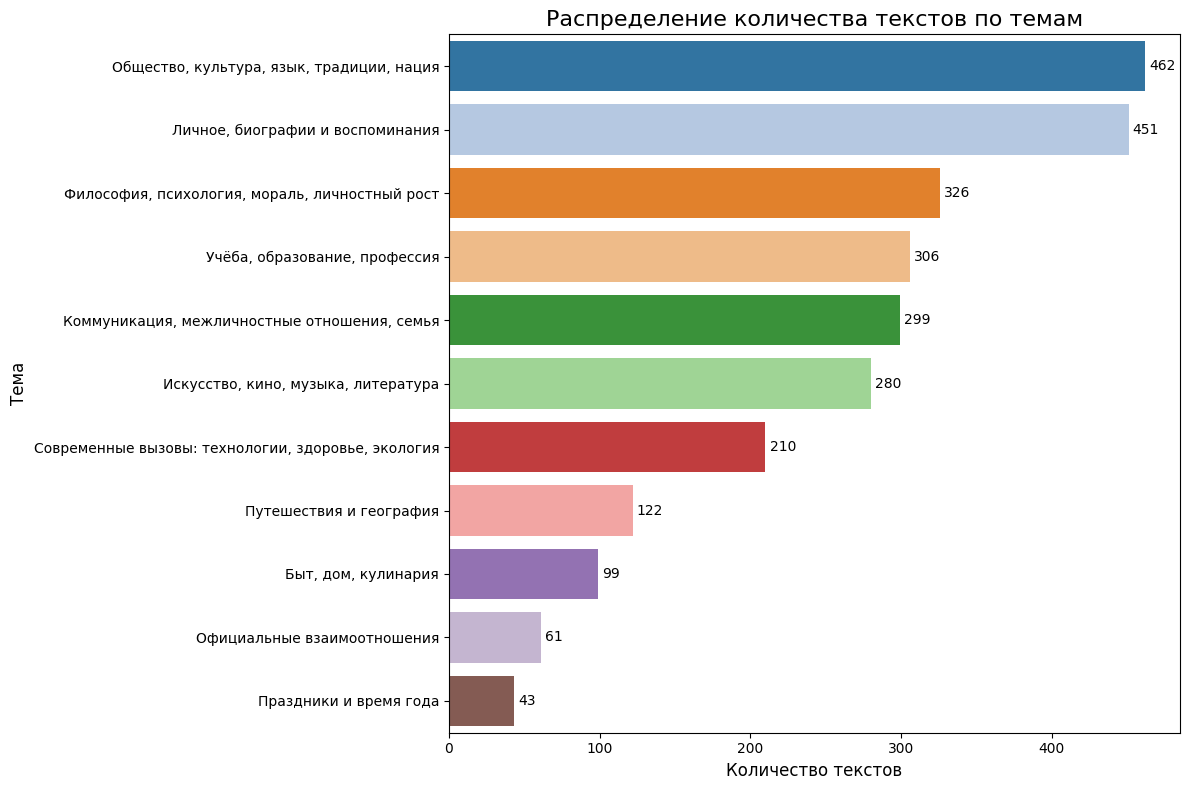

In [ ]:
plt.figure(figsize=(12, 8))

# Строим barplot
ax = sns.barplot(x=topic_distribution.values, y=topic_distribution.index, palette="tab20")

# Настроим внешний вид графика
plt.title('Распределение количества текстов по темам', fontsize=16)
plt.xlabel('Количество текстов', fontsize=12)
plt.ylabel('Тема', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Добавляем подписи в конце каждого бара
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Красивое выравнивание
plt.tight_layout()

# Показываем
plt.show()

In [ ]:
contingency_table = pd.crosstab(df_filtered['Тема'], df_filtered['Тег'])
contingency_table

Тег                                                 Graph  Hyphen  \
Тема                                                                
Быт, дом, кулинария                                     3      23   
Искусство, кино, музыка, литература                    20      49   
Коммуникация, межличностные отношения, семья           12      70   
Личное, биографии и воспоминания                       40      61   
Общество, культура, язык, традиции, нация              19      99   
Официальные взаимоотношения                             1       3   
Праздники и время года                                  1      17   
Путешествия и география                                11      10   
Современные вызовы: технологии, здоровье, экология      4      31   
Учёба, образование, профессия                          11      74   
Философия, психология, мораль, личностный рост         17      87   

Тег                                                 Hyphen, Misspell  \
Тема                                                                   
Быт, дом, кулинария                                                0   
Искусство, кино, музыка, литература                                0   
Коммуникация, межличностные отношения, семья                       0   
Личное, биографии и воспоминания                                   1   
Общество, культура, язык, традиции, нация                          0   
Официальные взаимоотношения                                        0   
Праздники и время года                                             0   
Путешествия и география                                            0   
Современные вызовы: технологии, здоровье, экология                 0   
Учёба, образование, профессия                                      0   
Философия, психология, мораль, личностный рост                     0   

Тег                                                 Misspell  Orpho  \
Тема                                                                  
Быт, дом, кулинария                                       19      0   
Искусство, кино, музыка, литература                       50      0   
Коммуникация, межличностные отношения, семья              93      1   
Личное, биографии и воспоминания                          67    120   
Общество, культура, язык, традиции, нация                 88      0   
Официальные взаимоотношения                               41      0   
Праздники и время года                                     5      0   
Путешествия и география                                   40      0   
Современные вызовы: технологии, здоровье, экология        53      0   
Учёба, образование, профессия                             72      0   
Философия, психология, мораль, личностный рост            60      0   

Тег                                                 Orpho, Graph  \
Тема                                                               
Быт, дом, кулинария                                            0   
Искусство, кино, музыка, литература                            0   
Коммуникация, межличностные отношения, семья                   0   
Личное, биографии и воспоминания                               1   
Общество, культура, язык, традиции, нация                      0   
Официальные взаимоотношения                                    0   
Праздники и время года                                         0   
Путешествия и география                                        0   
Современные вызовы: технологии, здоровье, экология             0   
Учёба, образование, профессия                                  0   
Философия, психология, мораль, личностный рост                 0   

Тег                                                 Ortho, Hyphen  \
Тема                                                                
Быт, дом, кулинария                                             2   
Искусство, кино, музыка, литература                             4   
Коммуникация, межличностные отношения, семья                    1   
Личное, био

In [ ]:
groups = ["Graph", "Hyphen", "Misspell", "Space", "Translit", "Ortho"]

In [ ]:
def distribute_errors_in_crosstab(contingency_table, groups):
    # Копируем исходную таблицу
    df_new = contingency_table.copy()

    # Перераспределение для столбцов с несколькими типами ошибок
    for col in contingency_table.columns:
        # Ищем колонки, которые имеют несколько типов ошибок
        if any("," in col for group in groups if group in col):
            error_types = col.split(", ")

            # Обрабатываем каждый тип ошибки по отдельности
            for error in error_types:
                if error in df_new.columns:
                    # Перераспределяем ошибки между типами
                    df_new[error] += contingency_table[col]
                else:
                    # Создаем новый столбец для ошибки, если его еще нет
                    df_new[error] = contingency_table[col]

            # Удаляем старые столбцы с комбинированными ошибками
            df_new.drop(columns=[col], inplace=True)

    # Совмещение похожих столбцов (если они существуют)
    similar_columns = [("Space", "space"), ("Orpho", "orpho"), ("Graph", "graph"), ("Ortho", "ortho")]
    for col_main, col_alt in similar_columns:
        if col_main in df_new.columns and col_alt in df_new.columns:
            df_new[col_main] += df_new[col_alt]
            df_new.drop(columns=[col_alt], inplace=True)

    return df_new

In [ ]:
contingency_table=contingency_table.reset_index()
df_distribution_all_ = distribute_errors_in_crosstab(contingency_table, groups)

In [ ]:
print("Перераспределенные частоты по группам:")
df_distribution_all_

Перераспределенные частоты по группам:


Тег                                               Тема  Graph  Hyphen  \
0                                  Быт, дом, кулинария      5      25   
1                  Искусство, кино, музыка, литература     21      53   
2         Коммуникация, межличностные отношения, семья     12      71   
3                     Личное, биографии и воспоминания     43      67   
4            Общество, культура, язык, традиции, нация     22     106   
5                          Официальные взаимоотношения      2       4   
6                               Праздники и время года      1      17   
7                              Путешествия и география     11      11   
8    Современные вызовы: технологии, здоровье, экол...      4      32   
9                        Учёба, образование, профессия     12      80   
10      Философия, психология, мораль, личностный рост     17      88   

Тег  Misspell  Orpho  Space  Translit  Ortho  
0          24      3     38         4      7  
1          68      6     91        41     22  
2         103      2    103         8     11  
3          99    127    100        18     35  
4         121     10    186        18     40  
5          44      0     10         2      4  
6           5      0     19         1      0  
7          53      6     23        18     14  
8          69      6     85        14     17  
9          86      0    118        10     20  
10         77      1    130        13     18

In [ ]:
df_distribution_all_.set_index('Тема')

Тег                                                 Graph  Hyphen  Misspell  \
Тема                                                                          
Быт, дом, кулинария                                     5      25        24   
Искусство, кино, музыка, литература                    21      53        68   
Коммуникация, межличностные отношения, семья           12      71       103   
Личное, биографии и воспоминания                       43      67        99   
Общество, культура, язык, традиции, нация              22     106       121   
Официальные взаимоотношения                             2       4        44   
Праздники и время года                                  1      17         5   
Путешествия и география                                11      11        53   
Современные вызовы: технологии, здоровье, экология      4      32        69   
Учёба, образование, профессия                          12      80        86   
Философия, психология, мораль, личностный рост         17      88        77   

Тег                                                 Orpho  Space  Translit  \
Тема                                                                         
Быт, дом, кулинария                                     3     38         4   
Искусство, кино, музыка, литература                     6     91        41   
Коммуникация, межличностные отношения, семья            2    103         8   
Личное, биографии и воспоминания                      127    100        18   
Общество, культура, язык, традиции, нация              10    186        18   
Официальные взаимоотношения                             0     10         2   
Праздники и время года                                  0     19         1   
Путешествия и география                                 6     23        18   
Современные вызовы: технологии, здоровье, экология      6     85        14   
Учёба, образование, профессия                           0    118        10   
Философия, психология, мораль, личностный рост          1    130        13   

Тег                                                 Ortho  
Тема                                                       
Быт, дом, кулинария                                     7  
Искусство, кино, музыка, литература                    22  
Коммуникация, межличностные отношения, семья           11  
Личное, биографии и воспоминания                       35  
Общество, культура, язык, традиции, нация              40  
Официальные взаимоотношения                             4  
Праздники и время года                                  0  
Путешествия и география                                14  
Современные вызовы: технологии, здоровье, экология     17  
Учёба, образование, профессия                          20  
Философия, психология, мораль, личностный рост         18

In [ ]:
df_distribution_all_["Ortho"] = df_distribution_all_["Ortho"] + df_distribution_all_["Orpho"]

# Удалим колонку Orpho
df_distribution_all_ = df_distribution_all_.drop(columns=["Orpho"])

In [ ]:
df_distribution_all_

Тег                                               Тема  Graph  Hyphen  \
0                                  Быт, дом, кулинария      5      25   
1                  Искусство, кино, музыка, литература     21      53   
2         Коммуникация, межличностные отношения, семья     12      71   
3                     Личное, биографии и воспоминания     43      67   
4            Общество, культура, язык, традиции, нация     22     106   
5                          Официальные взаимоотношения      2       4   
6                               Праздники и время года      1      17   
7                              Путешествия и география     11      11   
8    Современные вызовы: технологии, здоровье, экол...      4      32   
9                        Учёба, образование, профессия     12      80   
10      Философия, психология, мораль, личностный рост     17      88   

Тег  Misspell  Space  Translit  Ortho  
0          24     38         4     10  
1          68     91        41     28  
2         103    103         8     13  
3          99    100        18    162  
4         121    186        18     50  
5          44     10         2      4  
6           5     19         1      0  
7          53     23        18     20  
8          69     85        14     23  
9          86    118        10     20  
10         77    130        13     19

In [ ]:
df_distribution_all_.iloc[:, 1:] = df_distribution_all_.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_distribution_all_

Тег                                               Тема  Graph  Hyphen  \
0                                  Быт, дом, кулинария      5      25   
1                  Искусство, кино, музыка, литература     21      53   
2         Коммуникация, межличностные отношения, семья     12      71   
3                     Личное, биографии и воспоминания     43      67   
4            Общество, культура, язык, традиции, нация     22     106   
5                          Официальные взаимоотношения      2       4   
6                               Праздники и время года      1      17   
7                              Путешествия и география     11      11   
8    Современные вызовы: технологии, здоровье, экол...      4      32   
9                        Учёба, образование, профессия     12      80   
10      Философия, психология, мораль, личностный рост     17      88   

Тег  Misspell  Space  Translit  Ortho  
0          24     38         4     10  
1          68     91        41     28  
2         103    103         8     13  
3          99    100        18    162  
4         121    186        18     50  
5          44     10         2      4  
6           5     19         1      0  
7          53     23        18     20  
8          69     85        14     23  
9          86    118        10     20  
10         77    130        13     19

In [ ]:
cross_tab = df_distribution_all_.set_index('Тема')

In [ ]:
cross_tab

Тег                                                 Graph  Hyphen  Misspell  \
Тема                                                                          
Быт, дом, кулинария                                     5      25        24   
Искусство, кино, музыка, литература                    21      53        68   
Коммуникация, межличностные отношения, семья           12      71       103   
Личное, биографии и воспоминания                       43      67        99   
Общество, культура, язык, традиции, нация              22     106       121   
Официальные взаимоотношения                             2       4        44   
Праздники и время года                                  1      17         5   
Путешествия и география                                11      11        53   
Современные вызовы: технологии, здоровье, экология      4      32        69   
Учёба, образование, профессия                          12      80        86   
Философия, психология, мораль, личностный рост         17      88        77   

Тег                                                 Space  Translit  Ortho  
Тема                                                                        
Быт, дом, кулинария                                    38         4     10  
Искусство, кино, музыка, литература                    91        41     28  
Коммуникация, межличностные отношения, семья          103         8     13  
Личное, биографии и воспоминания                      100        18    162  
Общество, культура, язык, традиции, нация             186        18     50  
Официальные взаимоотношения                            10         2      4  
Праздники и время года                                 19         1      0  
Путешествия и география                                23        18     20  
Современные вызовы: технологии, здоровье, экология     85        14     23  
Учёба, образование, профессия                         118        10     20  
Философия, психология, мораль, личностный рост        130        13     19

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def cramers_v(cross_tab):
    X2 = chi2_contingency(cross_tab, correction=False)[0]
    phi2 = X2 / cross_tab.sum().sum()
    n_rows, n_cols = cross_tab.shape
    return (phi2 / min(n_cols - 1, n_rows - 1)) ** 0.5

In [ ]:
cross_tab

Тег                                                 Graph  Hyphen  Misspell  \
Тема                                                                          
Быт, дом, кулинария                                     5      25        24   
Искусство, кино, музыка, литература                    21      53        68   
Коммуникация, межличностные отношения, семья           12      71       103   
Личное, биографии и воспоминания                       43      67        99   
Общество, культура, язык, традиции, нация              22     106       121   
Официальные взаимоотношения                             2       4        44   
Праздники и время года                                  1      17         5   
Путешествия и география                                11      11        53   
Современные вызовы: технологии, здоровье, экология      4      32        69   
Учёба, образование, профессия                          12      80        86   
Философия, психология, мораль, личностный рост         17      88        77   

Тег                                                 Space  Translit  Ortho  
Тема                                                                        
Быт, дом, кулинария                                    38         4     10  
Искусство, кино, музыка, литература                    91        41     28  
Коммуникация, межличностные отношения, семья          103         8     13  
Личное, биографии и воспоминания                      100        18    162  
Общество, культура, язык, традиции, нация             186        18     50  
Официальные взаимоотношения                            10         2      4  
Праздники и время года                                 19         1      0  
Путешествия и география                                23        18     20  
Современные вызовы: технологии, здоровье, экология     85        14     23  
Учёба, образование, профессия                         118        10     20  
Философия, психология, мораль, личностный рост        130        13     19

In [ ]:
total_errors = cross_tab.sum(axis=0)
print(total_errors)

Тег
Graph       150
Hyphen      554
Misspell    749
Space       903
Translit    147
Ortho       349
dtype: int64


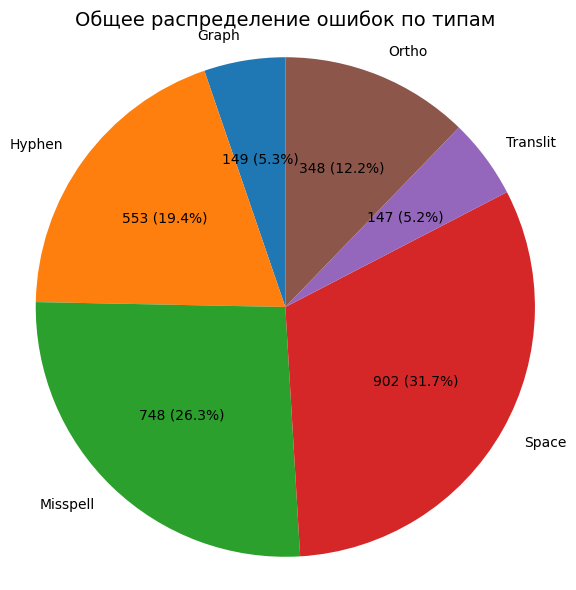

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(
    total_errors,
    labels=total_errors.index,
    autopct=lambda p: f'{int(p * total_errors.sum() / 100)} ({p:.1f}%)',
    startangle=90,
    textprops={'fontsize': 10}
)
plt.axis('equal')
plt.title('Общее распределение ошибок по типам', fontsize=14)
plt.tight_layout()
plt.show()

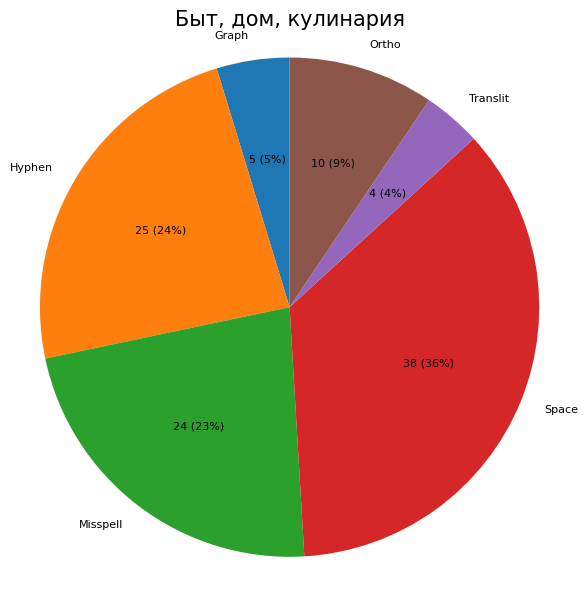

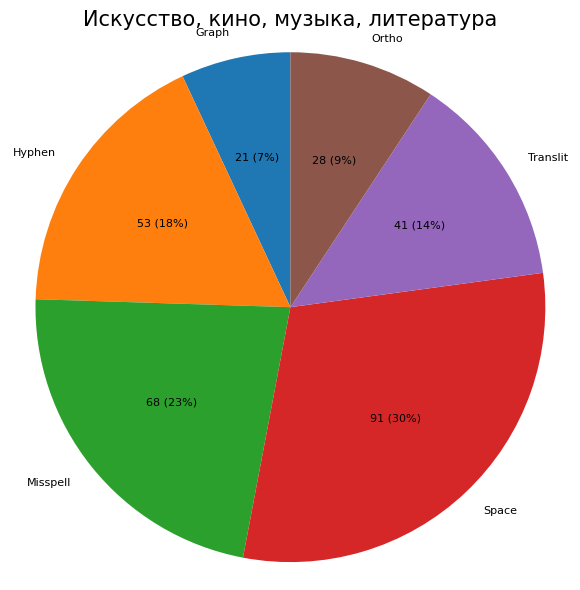

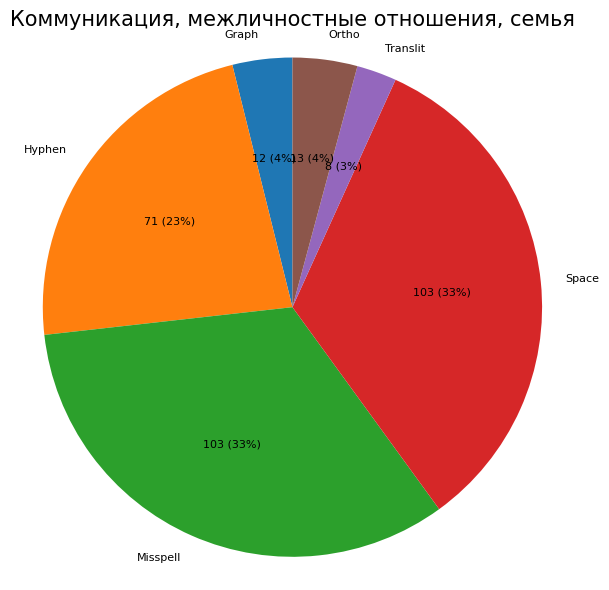

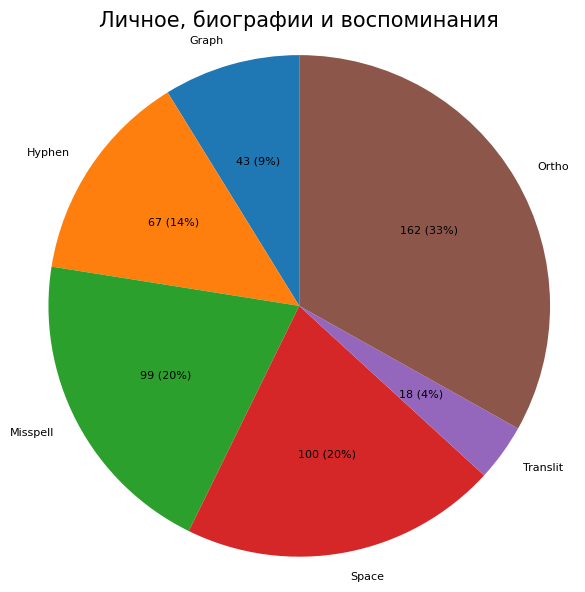

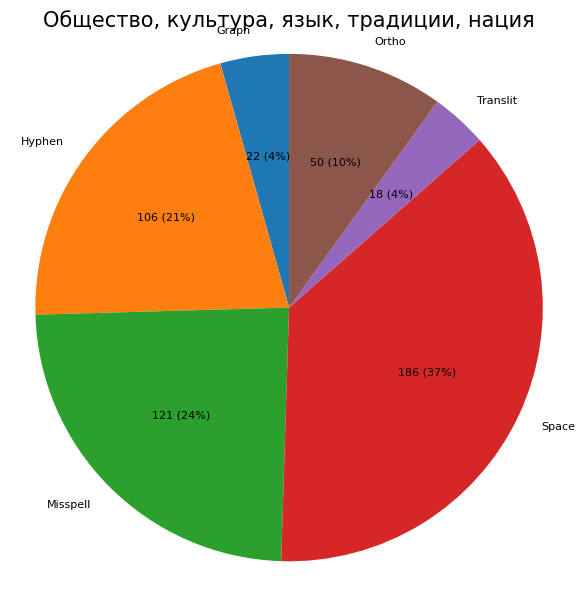

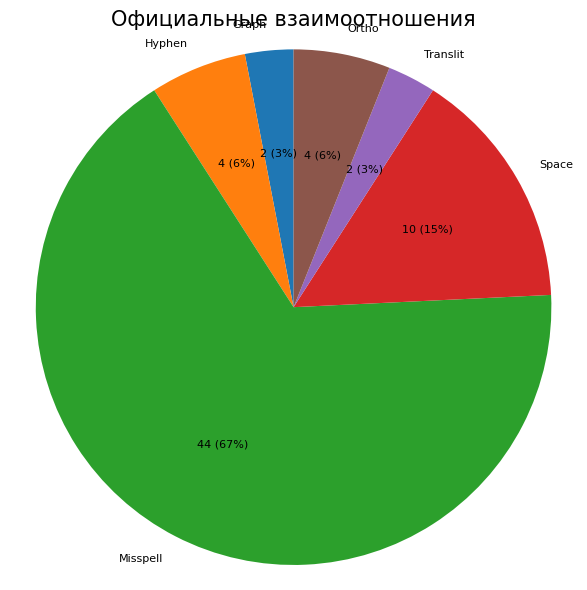

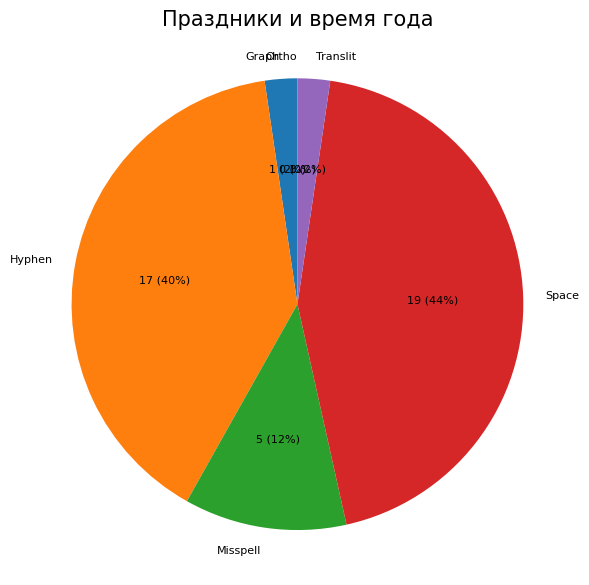

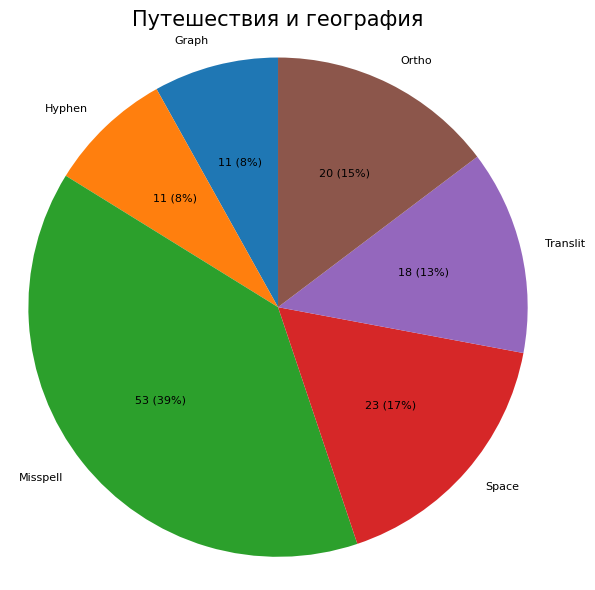

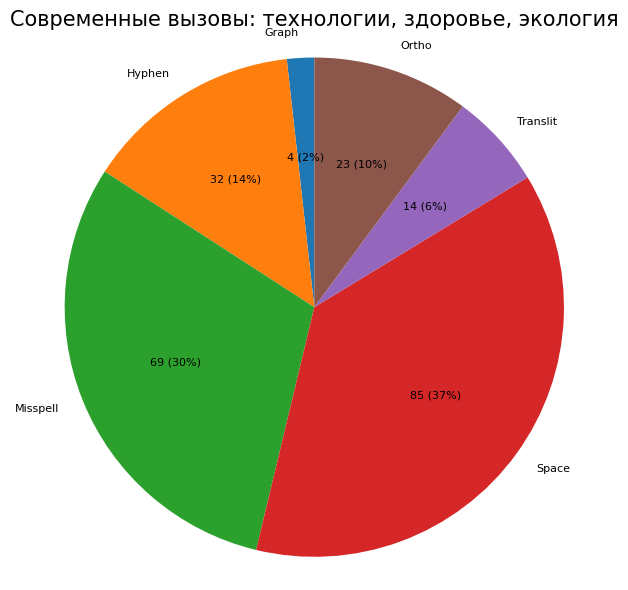

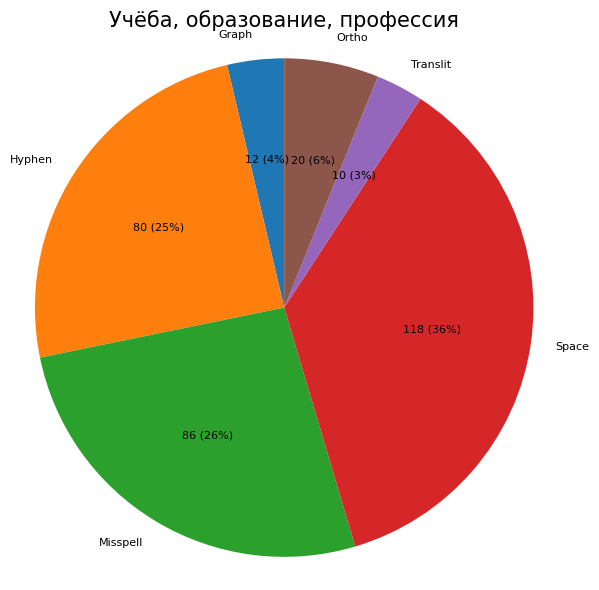

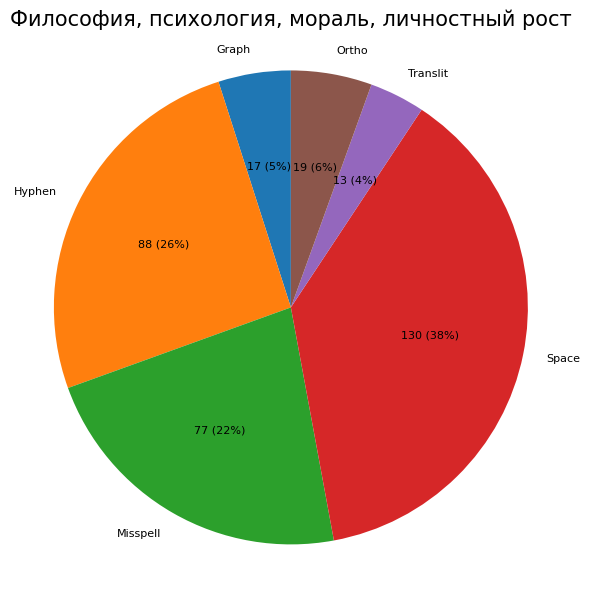

In [ ]:
for theme in cross_tab.index:
    values = cross_tab.loc[theme]

    # Общее количество ошибок для расчёта абсолютных значений
    total = values.sum()

    # Функция форматирования подписей
    def make_autopct(values):
        def my_autopct(pct):
            count = int(round(pct * total / 100.0))
            return f"{count} ({pct:.0f}%)"
        return my_autopct

    plt.figure(figsize=(6, 6))
    plt.pie(
        values,
        labels=values.index,
        autopct=make_autopct(values),
        startangle=90,
        textprops={"fontsize": 8}
    )
    plt.axis("equal")
    plt.title(f"{theme}", fontsize=15)
    plt.tight_layout()
    plt.show()


In [ ]:
print(figures[0].show())

None


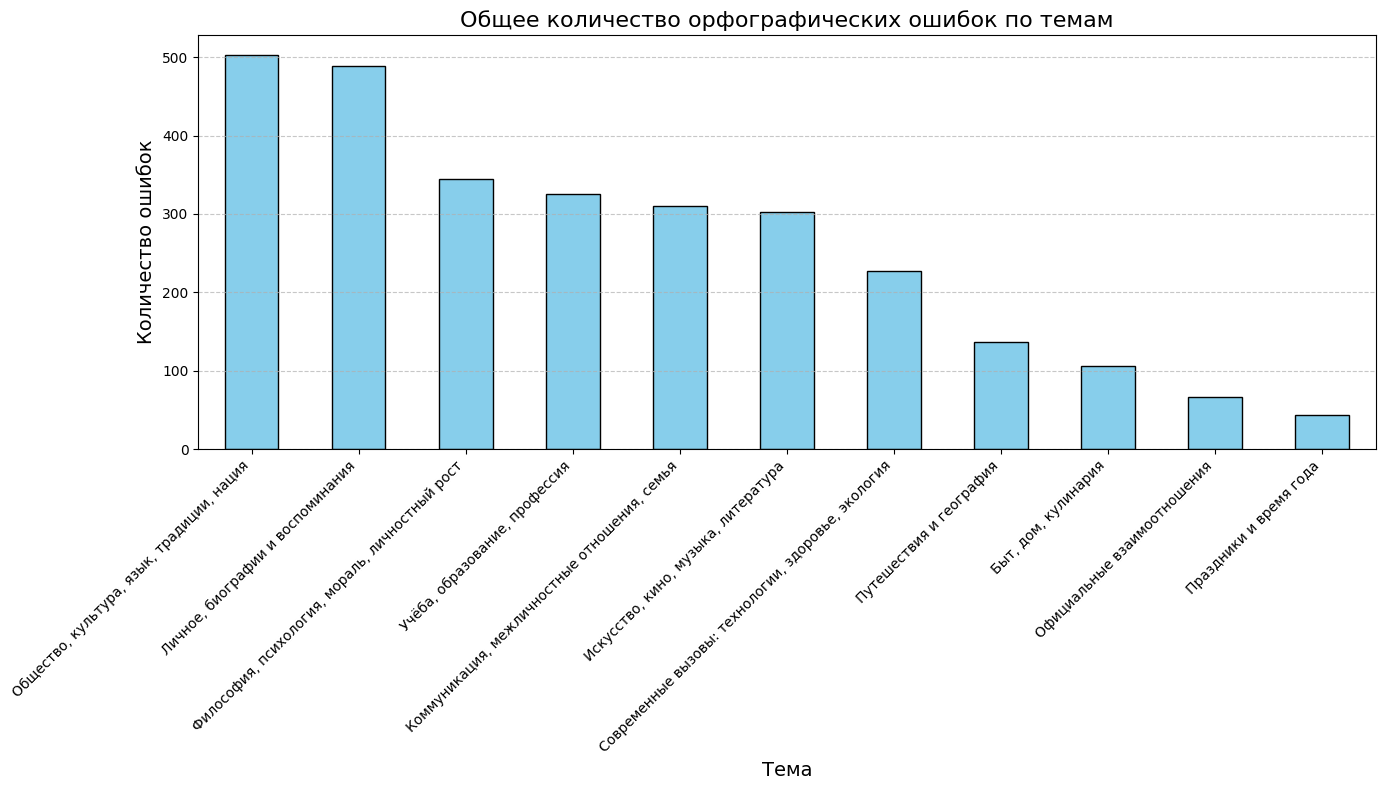

In [ ]:
errors_per_topic = cross_tab.sum(axis=1).sort_values(ascending=False)

# Строим столбчатую диаграмму
plt.figure(figsize=(14, 8))
errors_per_topic.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Общее количество орфографических ошибок по темам', fontsize=16)
plt.xlabel('Тема', fontsize=14)
plt.ylabel('Количество ошибок', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

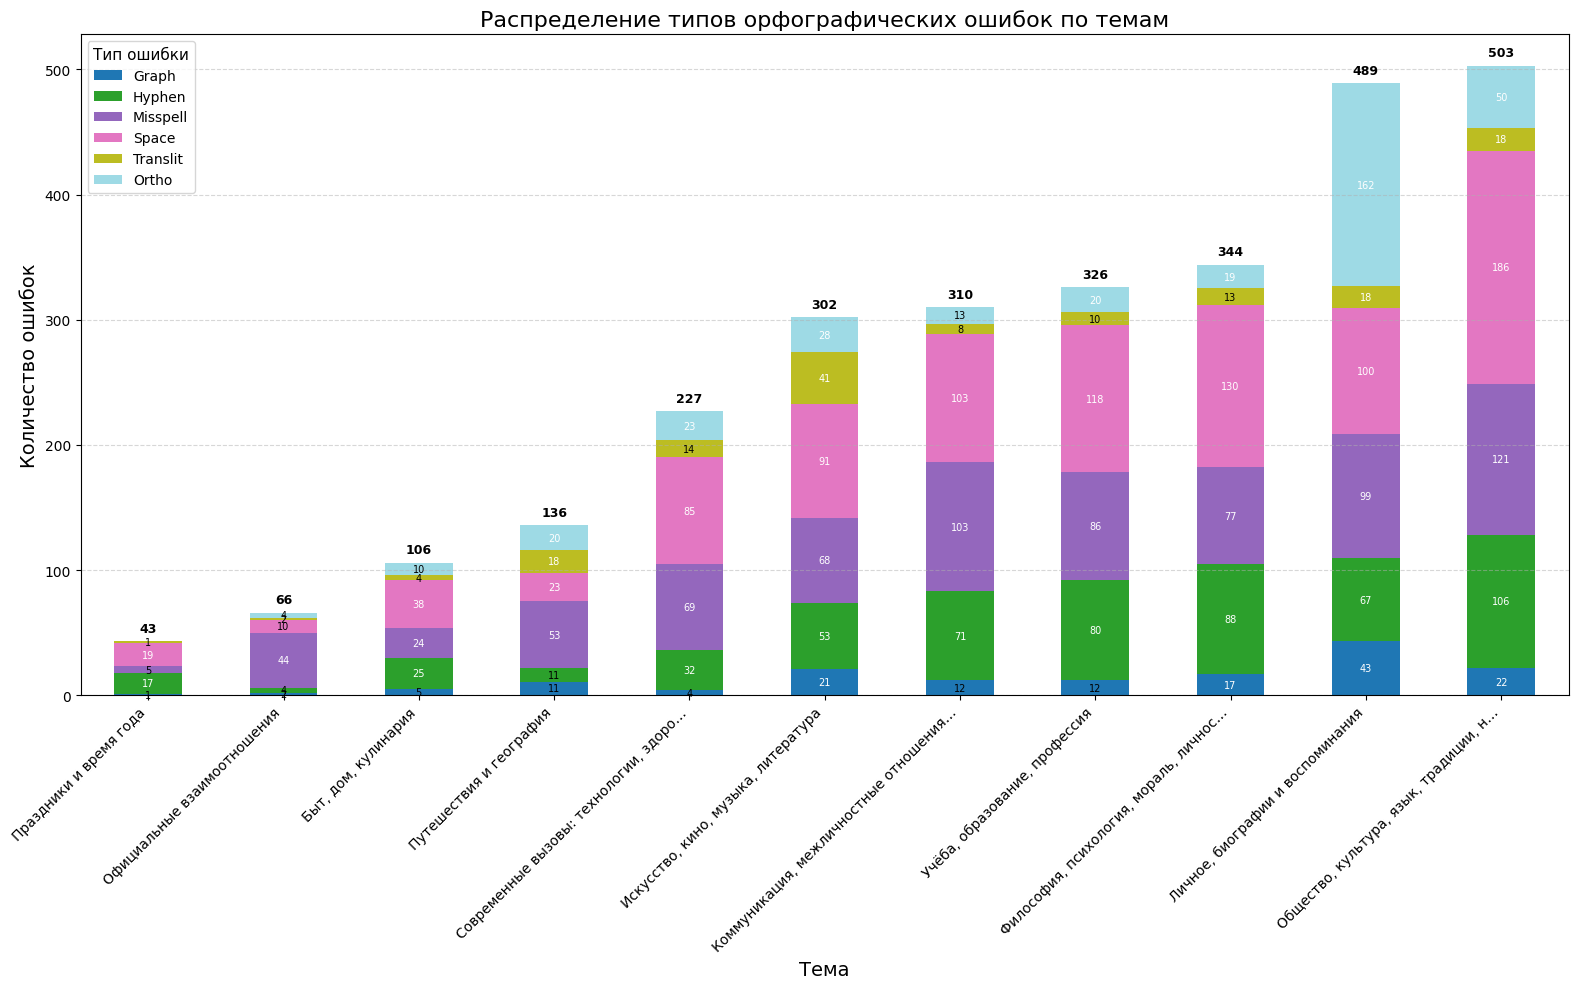

In [ ]:
# Сортировка тем по возрастанию общего количества ошибок
cross_tab_sorted = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=True).index]

# Укорачиваем названия после сортировки
short_index = [t if len(t) <= 40 else t[:37] + '…' for t in cross_tab_sorted.index]
cross_tab_plot = cross_tab_sorted.copy()
cross_tab_plot.index = short_index

# Построение графикаimport matplotlib.pyplot as plt
import pandas as pd

# Предположим, cross_tab уже загружен

# Сортировка тем по возрастанию общего количества ошибок
cross_tab_sorted = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=True).index]

# Укорачиваем названия тем после сортировки
short_index = [t if len(t) <= 40 else t[:37] + '…' for t in cross_tab_sorted.index]
cross_tab_plot = cross_tab_sorted.copy()
cross_tab_plot.index = short_index

# Построение графика
fig, ax = plt.subplots(figsize=(16, 10))
cross_tab_plot.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Добавление подписей с количеством по каждому типу ошибки внутри стопки
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{int(height)}",
                ha='center',
                va='center',
                fontsize=7,
                color='white' if height > 15 else 'black'
            )

# Добавление общей суммы ошибок над стопками
for idx, total in enumerate(cross_tab_plot.sum(axis=1)):
    ax.text(
        idx,
        total + 5,  # немного выше столбца
        f"{int(total)}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )

# Оформление графика
plt.title('Распределение типов орфографических ошибок по темам', fontsize=16)
plt.xlabel('Тема', fontsize=14)
plt.ylabel('Количество ошибок', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Тип ошибки', fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


In [ ]:
v = cramers_v(cross_tab)
print(f"Cramér's V: {v}")

Cramér's V: 0.1871563070162034


In [ ]:
chi2, p, _, expected = chi2_contingency(cross_tab)

# Вывод p-значения
print(f"p-value: {p}")

p-value: 2.12639059101278e-75


In [ ]:
chi2

499.4919112297526

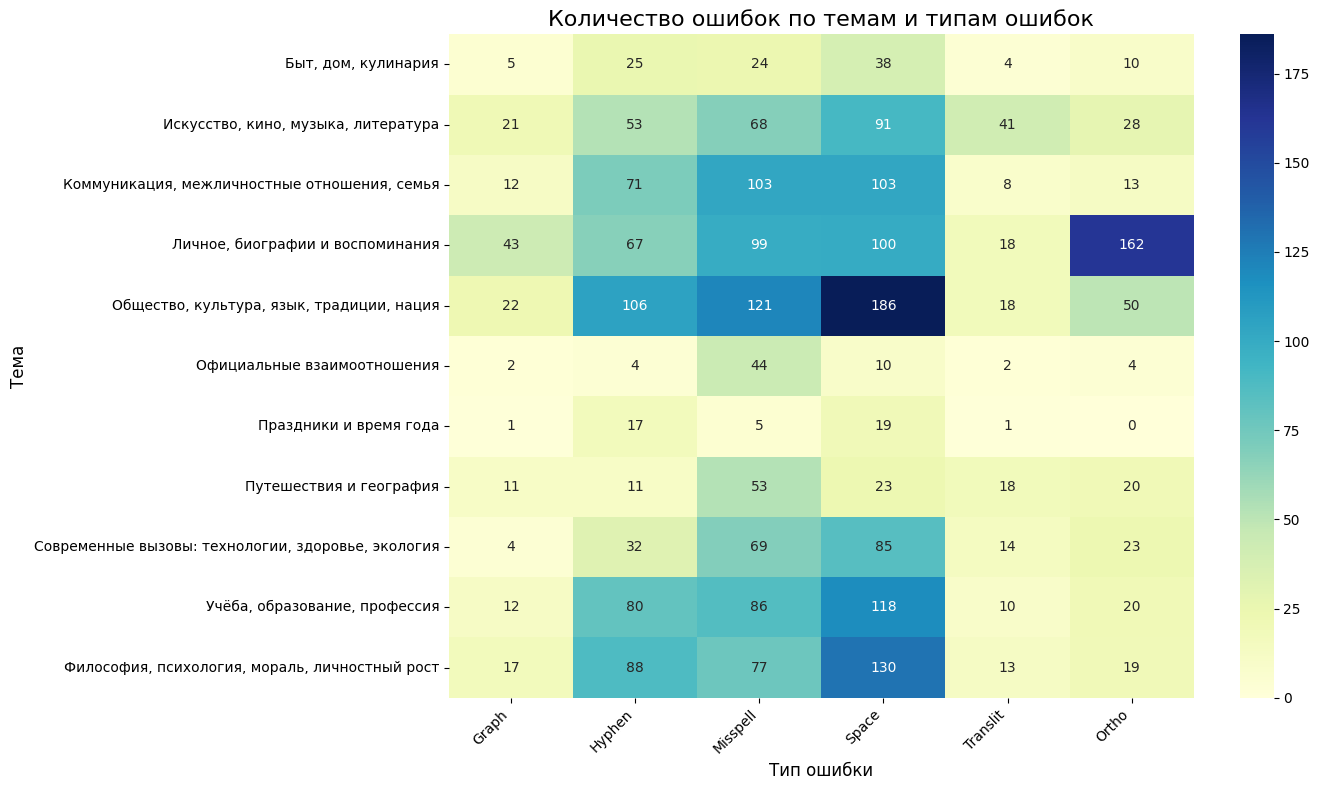

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Количество ошибок по темам и типам ошибок', fontsize=16)
plt.xlabel('Тип ошибки', fontsize=12)
plt.ylabel('Тема', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

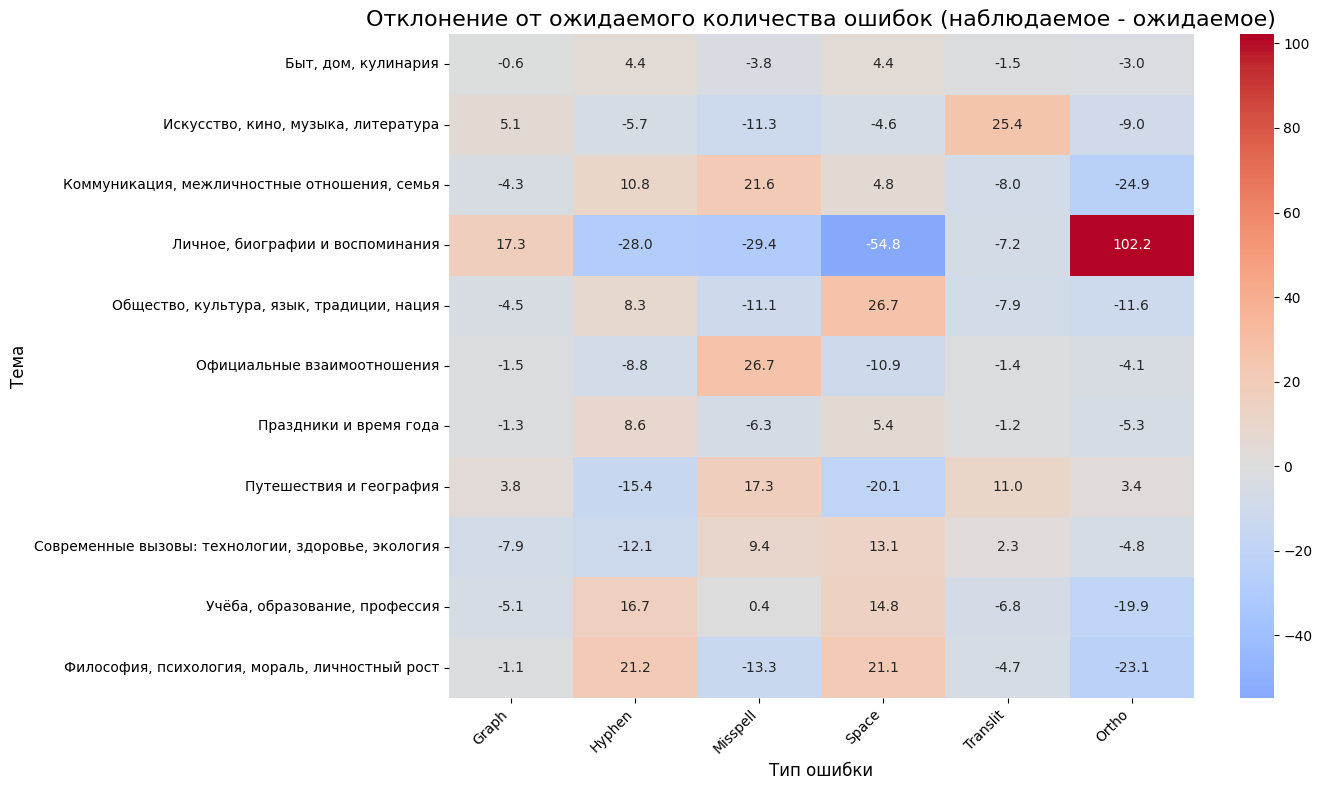

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 2. Считаем разницу: (реальные - ожидаемые)
deviation = cross_tab - expected

# 3. Визуализация отклонений
plt.figure(figsize=(14, 8))
sns.heatmap(deviation, cmap='coolwarm', center=0, annot=True, fmt='.1f')
plt.title('Отклонение от ожидаемого количества ошибок (наблюдаемое - ожидаемое)', fontsize=16)
plt.xlabel('Тип ошибки', fontsize=12)
plt.ylabel('Тема', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

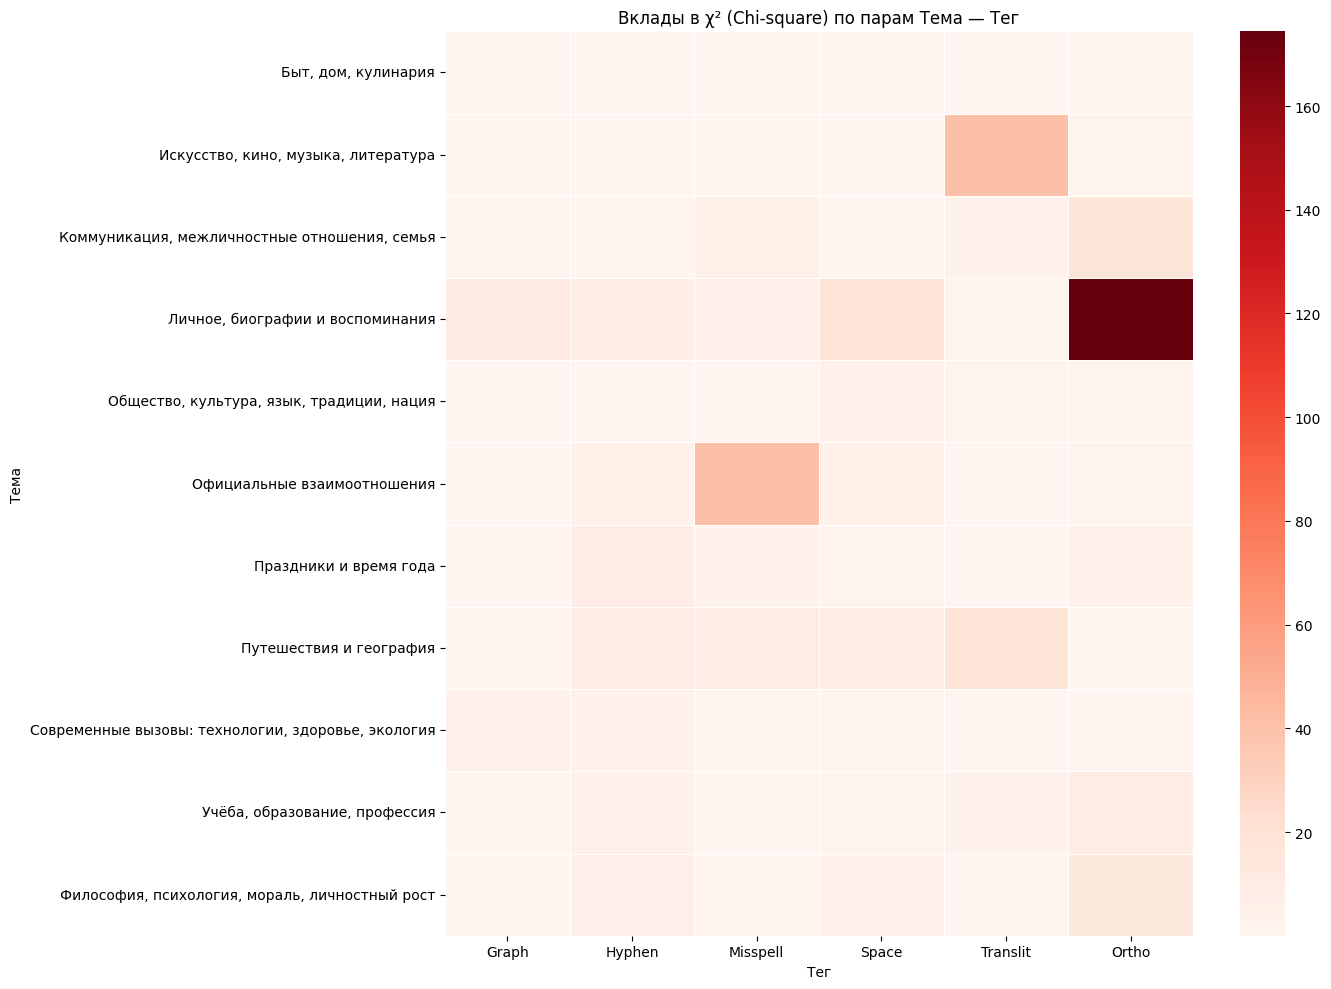

In [ ]:
observed = cross_tab.values
contrib = (observed - expected) ** 2 / expected

# Преобразуем в DataFrame с индексами
contrib_df = pd.DataFrame(contrib, index=cross_tab.index, columns=cross_tab.columns)

# Визуализируем тепловую карту вкладов
plt.figure(figsize=(14, 10))
sns.heatmap(contrib_df, cmap='Reds', linewidths=0.5)
plt.title('Вклады в χ² (Chi-square) по парам Тема — Тег')
plt.xlabel('Тег')
plt.ylabel('Тема')
plt.tight_layout()
plt.show()

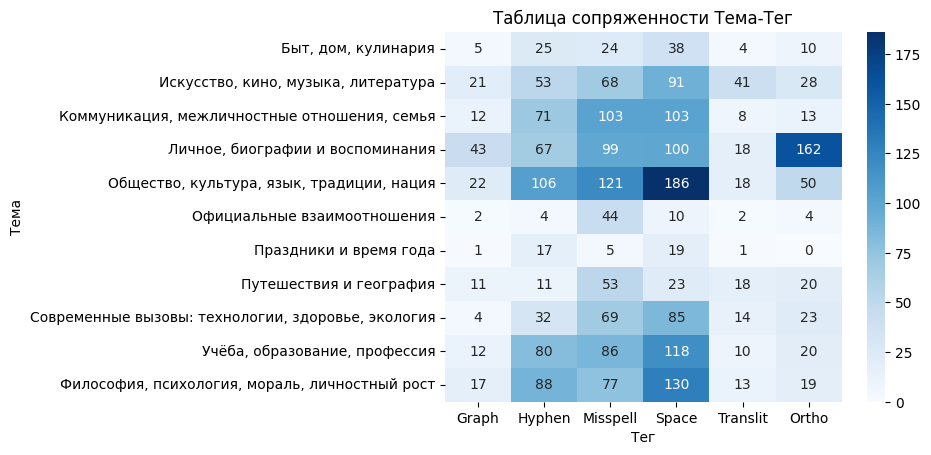

In [ ]:
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
plt.title('Таблица сопряженности Тема-Тег')
plt.show()

In [ ]:
import math

In [ ]:
x=df_filtered['Тег']
y=df_filtered['Тема']

In [ ]:
def conditional_entropy(x, y, log_base: float = 2):

  y_counts = Counter(y)
  xy_counts = Counter(list(zip(x, y)))
  total_counts = len(x)

  cond_entropy = 0.0

  for xy in xy_counts.keys():
      p_xy = xy_counts[xy] / total_counts
      p_y = y_counts[xy[1]] / total_counts
      cond_entropy += p_xy * math.log(p_y / p_xy, log_base)

  return cond_entropy

In [ ]:
conditional_entropy(x, y)

2.368359788357192

In [ ]:
def entropy(x, log_base: float = 2):
  x_counts = Counter(x)
  total_counts = len(x)
  p_x = list(map(lambda n: n / total_counts, x_counts.values()))
  entropy = 0.0
  for p in p_x:
    entropy += -p * math.log(p, 2)

  return entropy

In [ ]:
entropy(x)

2.5806261581624734

In [ ]:
def ucoef(x, y, log_base = 2):

  # найдем условную энтропию S(X,Y)
  s_xy = conditional_entropy(x, y, log_base)

  # энтропию S(X)
  s_x = entropy(x, log_base)

  # подставим эти значения в формулу
  u = (s_x - s_xy) / s_x

  # выведем результат
  return u

In [ ]:
ucoef(x, y)

0.08225382399302081

Насколько тег объясняет Тему:

In [ ]:
def ucoef_y_given_x(x, y, log_base=2):
    s_y = entropy(y, log_base)
    s_y_given_x = conditional_entropy(y, x, log_base)
    return (s_y - s_y_given_x) / s_y

In [ ]:
ucoef_y_given_x(x, y)

0.06652699574449243

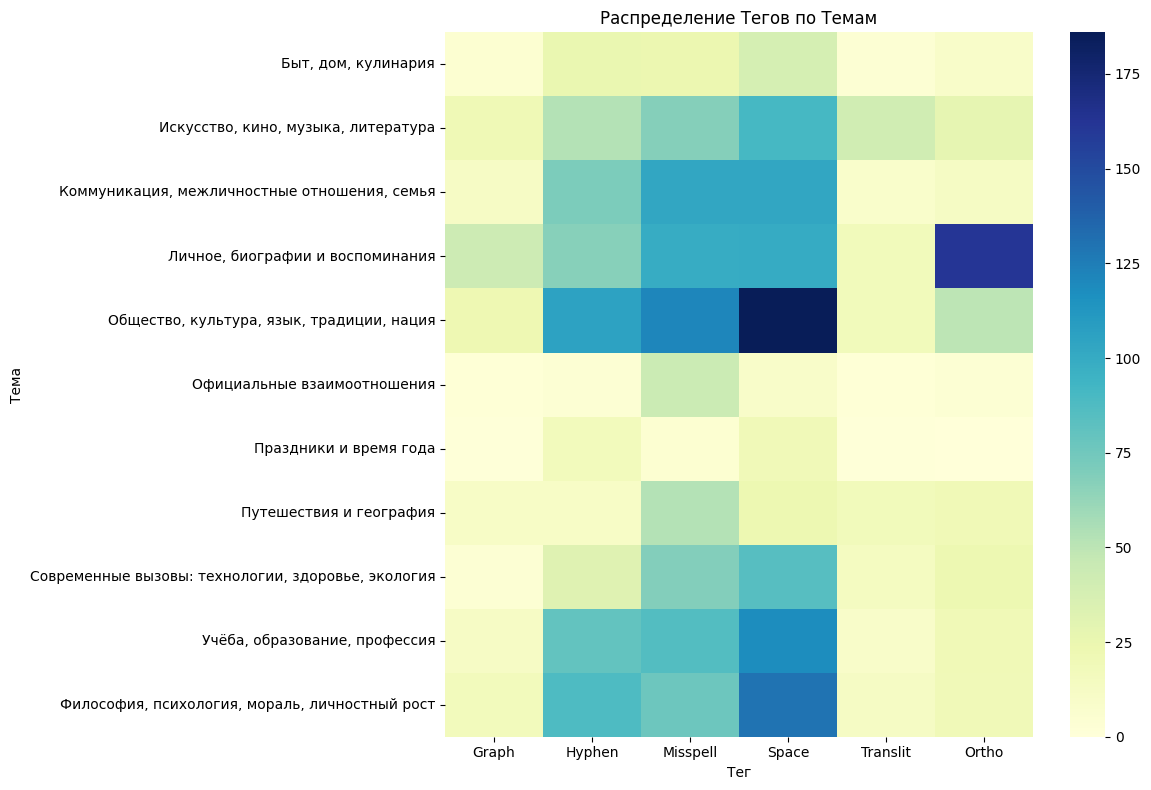

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=False)
plt.title('Распределение Тегов по Темам')
plt.ylabel('Тема')
plt.xlabel('Тег')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mi = mutual_info_score(x, y)
mi_bits = mi / math.log(2)  # Перевод в биты
print(f"Взаимная информация (в битах): {mi_bits}")

Взаимная информация (в битах): 0.2122663698052798


In [ ]:
pair_counts = df_filtered.groupby(['Тема', 'Тег']).size().reset_index(name='count')

# Отсортируем по убыванию
top_pairs = pair_counts.sort_values(by='count', ascending=False).head(20)

# Вывод
print(top_pairs)

                                                 Тема       Тег  count
47          Общество, культура, язык, традиции, нация     Space    186
94     Философия, психология, мораль, личностный рост     Space    130
32                   Личное, биографии и воспоминания     Orpho    120
86                      Учёба, образование, профессия     Space    118
24       Коммуникация, межличностные отношения, семья     Space    102
37                   Личное, биографии и воспоминания     Space    100
42          Общество, культура, язык, традиции, нация    Hyphen     99
20       Коммуникация, межличностные отношения, семья  Misspell     93
14                Искусство, кино, музыка, литература     Space     91
43          Общество, культура, язык, традиции, нация  Misspell     88
90     Философия, психология, мораль, личностный рост    Hyphen     87
78  Современные вызовы: технологии, здоровье, экол...     Space     85
82                      Учёба, образование, профессия    Hyphen     74
83    

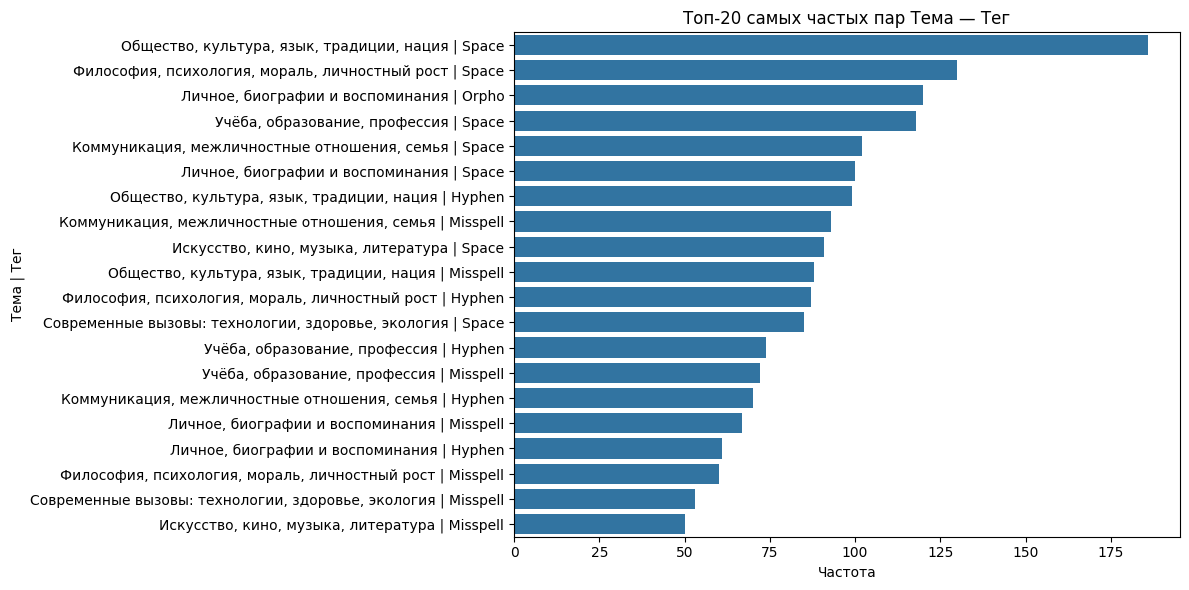

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pairs, x='count', y=top_pairs['Тема'] + " | " + top_pairs['Тег'])
plt.title('Топ-20 самых частых пар Тема — Тег')
plt.xlabel('Частота')
plt.ylabel('Тема | Тег')
plt.tight_layout()
plt.show()

####Метрики оценки каечства rule-based полуавтоматической кластеризации:

In [ ]:
from collections import Counter, defaultdict
from itertools import combinations

In [ ]:
import math

In [ ]:
TOP_N_WORDS = 30
MIN_PAIR_COUNT = 2

In [ ]:
from itertools import combinations

In [ ]:
def calculate_npmi_for_cluster(cluster_texts, min_df=1):
    """
    Вычисляет среднюю NPMI для кластера по очищенным текстам.
    :param cluster_texts: список очищенных текстов (строк)
    :param min_df: минимальное число документов для слова
    :return: среднее значение NPMI
    """
    tokenized_texts = []
    for text in cluster_texts:
        if isinstance(text, str) and text.strip():
            tokens = re.findall(r'\b\w+\b', text.lower())
            tokenized_texts.append(set(tokens))
    total_docs = len(tokenized_texts)

    word_doc_freq = Counter()
    pair_freq = Counter()

    for tokens in tokenized_texts:
        for token in tokens:
            word_doc_freq[token] += 1
        for w1, w2 in combinations(sorted(tokens), 2):
            pair_freq[(w1, w2)] += 1

    npmi_values = []

    for (w1, w2), pair_count in pair_freq.items():
        if word_doc_freq[w1] < min_df or word_doc_freq[w2] < min_df:
            continue

        p_w1 = word_doc_freq[w1] / total_docs
        p_w2 = word_doc_freq[w2] / total_docs
        p_w1w2 = pair_count / total_docs

        pmi = math.log(p_w1w2 / (p_w1 * p_w2) + 1e-10)
        npmi = pmi / (-math.log(p_w1w2 + 1e-10))
        npmi_values.append(npmi)

    if not npmi_values:
        return 0.0

    return sum(npmi_values) / len(npmi_values)

In [ ]:
clustered_texts = df_filtered.groupby('Тема')['Очищенный текст'].apply(list).to_dict()

In [ ]:
clustered_texts

{'Быт, дом, кулинария': ['работать обязанность включать смотреть ребёнок ребёнок кормить ребёнок дом город выполнять какой обязанность день',
  'квартира здание человек тридцать этаж квартира летать город вершина метр сто башня центр структура два малый башня башня запустить крепко широко основа городской иметь каждый угол',
  'дом элегантный многим украшение ребёнок построить стиль дело улица увидеть помнить закон',
  'шесть десять предпочитать жить собственно дом первый важный дом содержать неудобство сложный строить дорогой провести изыскательский работа место будущее строй',
  'шесть десять предпочитать жить собственно дом первый важный дом содержать неудобство сложный строить дорогой провести изыскательский работа место будущее строй',
  'первый важный дом содержать неудобство сложный строить дорогой провести изыскательский работа место будущее строй сравнение дом намного дешёвый пространство',
  'пойти река смочь выпить пол дом успеть хозяин',
  'завтра поехать бабушка дедушке вм

In [ ]:
npmi_scores = {}

for topic, texts in clustered_texts.items():
    npmi = calculate_npmi_for_cluster(texts)
    npmi_scores[topic] = npmi

In [ ]:
for cid, score in npmi_scores.items():
    print(f"Кластер «{cid}»: NPMI = {score:.4f}")

Кластер «Быт, дом, кулинария»: NPMI = 0.6407
Кластер «Искусство, кино, музыка, литература»: NPMI = 0.5418
Кластер «Коммуникация, межличностные отношения, семья»: NPMI = 0.5300
Кластер «Личное, биографии и воспоминания»: NPMI = 0.5048
Кластер «Общество, культура, язык, традиции, нация»: NPMI = 0.4391
Кластер «Официальные взаимоотношения»: NPMI = 0.6632
Кластер «Праздники и время года»: NPMI = 0.6778
Кластер «Путешествия и география»: NPMI = 0.6033
Кластер «Современные вызовы: технологии, здоровье, экология»: NPMI = 0.5484
Кластер «Учёба, образование, профессия»: NPMI = 0.4555
Кластер «Философия, психология, мораль, личностный рост»: NPMI = 0.4887


In [ ]:
len(npmi_scores)

11

In [ ]:
overall_npmi = np.mean(list(npmi_scores.values()))
print(f"Средний NPMI по всем кластерам: {overall_npmi:.4f}")

Средний NPMI по всем кластерам: 0.5539


In [ ]:
def calculate_topic_word_diversity(topic_words):
    """
    Оценивает разнообразие топ-слов в теме.
    :param topic_words: список топ-слов (лемматизированных)
    :return: коэффициент разнообразия от 0 до 1
    """
    unique_words = set(topic_words)
    if not topic_words:
        return 0.0
    return len(unique_words) / len(topic_words)

In [ ]:
df['tokens'] = df['Очищенный текст'].apply(lambda x: x.split() if isinstance(x, str) else [])

In [ ]:
topic_diversity = {}
for topic in df['Тема'].unique():
    topic_texts = df[df['Тема'] == topic]['tokens'].sum()
    diversity_score = calculate_topic_word_diversity(topic_texts)
    topic_diversity[topic] = diversity_score

In [ ]:
for topic, diversity in topic_diversity.items():
    print(f"Разнообразие топ-слов для темы '{topic}': {diversity:.4f}")

Разнообразие топ-слов для темы 'Общество, культура, язык, традиции, нация': 0.2054
Разнообразие топ-слов для темы 'Путешествия и география': 0.3931
Разнообразие топ-слов для темы 'Быт, дом, кулинария': 0.3317
Разнообразие топ-слов для темы 'Современные вызовы: технологии, здоровье, экология': 0.2876
Разнообразие топ-слов для темы 'Учёба, образование, профессия': 0.2244
Разнообразие топ-слов для темы 'Искусство, кино, музыка, литература': 0.2473
Разнообразие топ-слов для темы 'Личное, биографии и воспоминания': 0.1184
Разнообразие топ-слов для темы 'Философия, психология, мораль, личностный рост': 0.2508
Разнообразие топ-слов для темы 'Коммуникация, межличностные отношения, семья': 0.2253
Разнообразие топ-слов для темы 'Официальные взаимоотношения': 0.3284
Разнообразие топ-слов для темы 'Праздники и время года': 0.4779


In [ ]:
def get_top_words_for_topic(df, num_top_words=10):
    """
    Получает топ-слова для каждой темы.
    :param df: DataFrame с колонками "Очищенный текст" и "Тема"
    :param num_top_words: количество топ-слов для каждой темы
    :return: словарь {тема: [топ-слова]}
    """
    topic_word_lists = {}

    for topic in df['Тема'].unique():
        topic_texts = df[df['Тема'] == topic]['tokens'].sum()

        word_counts = Counter(topic_texts)


        top_words = [word for word, _ in word_counts.most_common(num_top_words)]

        topic_word_lists[topic] = top_words

    return topic_word_lists

topic_word_lists = get_top_words_for_topic(df)

In [ ]:
def calculate_intertopic_uniqueness(topic_word_lists):
    topics = list(topic_word_lists.keys())
    overlaps = []

    for i in range(len(topics)):
        for j in range(i + 1, len(topics)):
            words_i = set(topic_word_lists[topics[i]])
            words_j = set(topic_word_lists[topics[j]])
            if words_i and words_j:
                intersection = words_i & words_j
                union = words_i | words_j
                overlap_ratio = len(intersection) / len(union)
                overlaps.append(overlap_ratio)

    if not overlaps:
        return 1.0  # Нет пересечений => полностью уникальные темы

    average_overlap = sum(overlaps) / len(overlaps)
    return 1 - average_overlap

In [ ]:
uniqueness_score = calculate_intertopic_uniqueness(topic_word_lists)
print(f"Средняя уникальность тем: {uniqueness_score:.4f}")

Средняя уникальность тем: 0.8748


In [ ]:
def calculate_topic_uniqueness(topic_word_lists):
    """
    Оценивает уникальность каждой темы через среднее перекрытие топ-слов с другими темами.
    :param topic_word_lists: словарь {тема: список топ-слов}
    :return: словарь {тема: уникальность}
    """
    topics = list(topic_word_lists.keys())
    topic_uniqueness = {}

    for i in range(len(topics)):
        words_i = set(topic_word_lists[topics[i]])
        overlap_ratios = []

        # Считаем перекрытие для этой темы с каждой другой темой
        for j in range(len(topics)):
            if i != j:
                words_j = set(topic_word_lists[topics[j]])
                if words_i and words_j:
                    intersection = words_i & words_j
                    union = words_i | words_j
                    overlap_ratio = len(intersection) / len(union)
                    overlap_ratios.append(overlap_ratio)

        # Рассчитываем уникальность как 1 - среднее перекрытие
        if overlap_ratios:
            average_overlap = sum(overlap_ratios) / len(overlap_ratios)
            topic_uniqueness[topics[i]] = 1 - average_overlap
        else:
            topic_uniqueness[topics[i]] = 1.0  # Если пересечений нет, тема полностью уникальна

    return topic_uniqueness

In [ ]:
topic_word_lists = get_top_words_for_topic(df)

topic_uniqueness_scores = calculate_topic_uniqueness(topic_word_lists)

for topic, score in topic_uniqueness_scores.items():
    print(f"Уникальность темы '{topic}': {score:.4f}")

Уникальность темы 'Общество, культура, язык, традиции, нация': 0.8664
Уникальность темы 'Путешествия и география': 0.8454
Уникальность темы 'Быт, дом, кулинария': 0.9221
Уникальность темы 'Современные вызовы: технологии, здоровье, экология': 0.8388
Уникальность темы 'Учёба, образование, профессия': 0.8789
Уникальность темы 'Искусство, кино, музыка, литература': 0.8606
Уникальность темы 'Личное, биографии и воспоминания': 0.9678
Уникальность темы 'Философия, психология, мораль, личностный рост': 0.8388
Уникальность темы 'Коммуникация, межличностные отношения, семья': 0.8094
Уникальность темы 'Официальные взаимоотношения': 0.9428
Уникальность темы 'Праздники и время года': 0.8519


In [ ]:
def calculate_topic_density(topic_words, documents):
    """
    Оценивает плотность темы: насколько часто топ-слова встречаются вместе в документах.
    :param topic_words: список топ-слов темы
    :param documents: список документов (очищенных текстов)
    :return: средняя плотность топ-слов в документах
    """
    if not topic_words or not documents:
        return 0.0

    vectorizer = CountVectorizer(vocabulary=topic_words, binary=True)
    X = vectorizer.transform(documents)

    co_occurrence_counts = (X @ X.T).toarray()
    n_docs = X.shape[0]

    total_density = 0
    for i in range(n_docs):
        word_count = X[i].sum()
        if word_count > 1:
            total_density += word_count * (word_count - 1) / 2

    max_possible_pairs = n_docs * (len(topic_words) * (len(topic_words) - 1) / 2)
    if max_possible_pairs == 0:
        return 0.0

    return total_density / max_possible_pairs

In [ ]:
df['Очищенный текст'] = df['Очищенный текст'].fillna('')
documents = df['Очищенный текст'].tolist()
topic_density_scores = {}
for topic, top_words in topic_word_lists.items():
    density_score = calculate_topic_density(top_words, documents)
    topic_density_scores[topic] = density_score

In [ ]:
for topic, density in topic_density_scores.items():
    print(f"Плотность для темы '{topic}': {density:.4f}")

Плотность для темы 'Общество, культура, язык, традиции, нация': 0.0151
Плотность для темы 'Путешествия и география': 0.0093
Плотность для темы 'Быт, дом, кулинария': 0.0083
Плотность для темы 'Современные вызовы: технологии, здоровье, экология': 0.0121
Плотность для темы 'Учёба, образование, профессия': 0.0097
Плотность для темы 'Искусство, кино, музыка, литература': 0.0065
Плотность для темы 'Личное, биографии и воспоминания': 0.0198
Плотность для темы 'Философия, психология, мораль, личностный рост': 0.0101
Плотность для темы 'Коммуникация, межличностные отношения, семья': 0.0176
Плотность для темы 'Официальные взаимоотношения': 0.0069
Плотность для темы 'Праздники и время года': 0.0087


####Данные для контекстуального анализа:

In [ ]:
columns = [
    "Оригинальное предложение",
    "Тег",
    "Ошибка",
    "Исправление",
    "Очищенный текст",
    "Очищенное название текста RLC",
    "Тема"
]

In [ ]:
df_filtered[columns].sample(n=10, random_state=42)

Оригинальное предложение  \
832                                                                                      {{Так}} {{же}} будет обсуждаться, какой Россия была в начале ХХ века, ее экономическое, политическое, военное положение и ее империалистические амбиции.   
124                                                                                                                                                                     Чувствовал себя неловко очень медленно разговаривая {{по}} {{английски}}.   
1433                                                                                           Кроме  этих  информируют  {{о }} артической  группе  Миткий,  о  новую  гостиницу  и  автобусе  с  баней,  с  которым  возможно  ехать  в  России.   
1617  Этот  психолог  делит  подростков  на  две  группы: (1)  подростки,  которые  начинают  стесняться  происходящих  с  ними  измнение,  и (2)  подростки,  которые  хотят  выделиться  из  толпы  и  {{подчеркнчть }} свои  индивидуальности.   
701                                                                                                                                          В течение речи он употреблял сложные конструкции, как для того, чтобы», и {{терманы}}, как биг мэн».   
650      На стиль {{Арт}} {{Деко}} повлияли направления и стиле и искусстве, такие как модерн, русский конструктивизм, венский Сецессион, немецкий союз дизайнеров Веркбунд, {{годдандское}} движение Де Стейл», а также абстракционизм и кубизм.   
2057                                                               {{Из }} {{за }} этого  бывают  преступления  и  т. д.  Есть  такие  люди  которые  желают  собладать  законы  {{но }} {{чистично }} попадают  в  {{какие }} {{то }} передряги.   
766                                                                                             .Дан развернутый обзор проектов новых ресторанов в Минске, {{Спроектирован}} новый вид Макдональдса абсолютно непохожего на его классический тип.   
173                                В этой книге {{Партч}} объясняет, как он придумывал и строил свои собственные новые и уникальные инструменты, чтобы применять свои новые системы настройки, основанные на интервалах даже менее четверти тона.   
462                                                                                                                                 Когда Бродский писал для английских читателей его мотивы и темы {{был}} {{исвязаны}} с произведениями Элиота.   

           Тег         Ошибка    Исправление  \
832      Space         Так же          Также   
124     Hyphen   по английски   по-английски   
1433  Misspell              о            об    
1617  Misspell    подчеркнчть    подчеркнуть   
701      Space        биг мэн         бигмен   
650   Translit       Арт Деко        Ар-деко   
2057    Hyphen     какие   то       какие-то   
766      orpho  Спроектирован  спроектирован   
173   Translit          Партч           Парч   
462      Space   был исвязаны   были связаны   

                                                                                                                                                                                                                                                                                           Очищенный текст  \
832                                                                                                                        особый внимание сделать мотив привести россия япония война западный держать отдельный личность война сторона япония обсуждать россия век экономический положение восточный игра   
124                                                                                                                                                                          трудность первый раз стоять классный учить чувствовать неловкий медленно разговаривать английский лекция российский революция   
1433                                                                               обр

In [ ]:
df_topic_tag = df_filtered[
    (df_filtered["Тема"] == "Общество, культура, язык, традиции, нация") &
    (df_filtered["Тег"] == "Misspell")
]

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
random_30 = df_topic_tag[columns].sample(n=min(60, len(df_topic_tag)), random_state=56)
random_30

Оригинальное предложение  \
789                                                                                                                                                                                                                                                                                                                   Радиоактивные отбросы систематично {{поподают}} в реки России, одним из примеров стала {{аврия}} Чернобыля.   
1433                                                                                                                                                                                                                                                                           Кроме  этих  информируют  {{о }} артической  группе  Миткий,  о  новую  гостиницу  и  автобусе  с  баней,  с  которым  возможно  ехать  в  России.   
1475                                                                                                                                                                                                                                                                                                     Если  я  найду  одежды,  которую  мне  нравится,  я  покупаю  нескольку  предметов  {{палтьа }} и  брюкей  одного  вида.   
1426                                                                                                                                                                                                           Финны,  она  говорит,  в  свою  {{очеред }} всегда  следуют  однажды  данному  слову,  неукоснительно  соблюдают  законность  и  букву  контракта —  и  это,  по-моему,  типично  протестантская  рабочая  мораль.   
1372                                                                                                                                                                                                                                                                                                                            В  школе  мне  почти  все  предметы  были  легкими,  но  физическое  воспитание  я  {{ненавила.}}   
78                                                                                                                                                                                                                                                                                           Объясните значение термина. догма - система вероведения, которая {{определает}} как люди {{дольжы}} себя вести в какой-то религии...   
1664                                                                                                                                                                                                                                                                                                                                               Это  выглядит  больше,  как  мирный  способ  показывать  свое  {{недогласие.}}   
1311                                                                                                                                                                                                     Но  если  я  бы  могла  изменить  что-нибудь  в  русском  менталитете,  то  я  бы  перевела  внимание  чиновников  {{вместео }} букв  на  анкетов  на  более  важные  проблемы -  например  на  регуляции  безопасности.   
67                                                                                                                                                                                                                                                                                                                                                             {{Симейноя}} {{жизьнь}} в моём мнение выглядит {{по}} {{другому}}.   
705                                                                                                                                                                                    

####Logictic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2), (1,3)],
    'tfidf__max_df': [0.9, 1.0],
    'clf__C': [0.1, 1, 10]
}

In [ ]:
X = df_filtered['Очищенный текст']
y = df_filtered['Тема']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

In [ ]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=10000,
                                                        ngram_range=(1, 2))),
                                       ('clf',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10], 'tfidf__max_df': [0.9, 1.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='f1_macro')

In [ ]:
print("Лучшие параметры:", grid.best_params_)
y_pred = grid.predict(X_test)

Лучшие параметры: {'clf__C': 10, 'tfidf__max_df': 0.9, 'tfidf__ngram_range': (1, 2)}


In [ ]:
print(classification_report(y_test, y_pred))

                                                    precision    recall  f1-score   support

                               Быт, дом, кулинария       0.61      0.73      0.67        15
               Искусство, кино, музыка, литература       0.80      0.80      0.80        25
      Коммуникация, межличностные отношения, семья       0.85      0.74      0.79        31
                  Личное, биографии и воспоминания       0.76      0.78      0.77        36
         Общество, культура, язык, традиции, нация       0.66      0.75      0.70        28
                       Официальные взаимоотношения       0.86      0.55      0.67        11
                            Праздники и время года       0.88      0.88      0.88         8
                           Путешествия и география       0.82      0.60      0.69        15
Современные вызовы: технологии, здоровье, экология       0.87      0.76      0.81        17
                     Учёба, образование, профессия       0.76      0.90      0.

In [ ]:
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1_macro', n_jobs=-1)

In [ ]:
print(f"F1-Score на каждом фолде: {cv_scores}")
print(f"Средний F1-Score: {np.mean(cv_scores)}")
print(f"Стандартное отклонение F1-Score: {np.std(cv_scores)}")

F1-Score на каждом фолде: [0.4486035  0.53135242 0.57239131 0.67038965 0.53208966]
Средний F1-Score: 0.5509653086744738
Стандартное отклонение F1-Score: 0.07202797051980322


#### Определение тем для оставшихся текстов

In [ ]:
df_unlabeled = df[df["Тема"].isna() & df["Очищенный текст"].notna()]

In [ ]:
X_unlabeled = df_unlabeled["Очищенный текст"]
predicted_topics = grid.best_estimator_.predict(X_unlabeled)

ValueError: Found array with 0 sample(s) (shape=(0, 10000)) while a minimum of 1 is required by TfidfTransformer.

In [ ]:
df.loc[df_unlabeled.index, "Предсказанная тема"] = predicted_topics

In [ ]:
df

In [ ]:
df_with_predictions = df[df["Предсказанная тема"].notna()]

In [ ]:
len(df_with_predictions)

1325

In [ ]:
df_with_predictions

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2613          17871         11556   
2655          18074         11948   
2656          18075         11948   
2657          18076         11948   
2658          18076         11948   

                                        Название текста                 Автор  \
0     lecture notes (non-timed, sentences, Russian i...       Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)      Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...      Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...      Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)     Sonia (F, HL, IH)   
...                                                 ...                   ...   
2613                                             Анкета  Арина_L2_f_Армянский   
2655                                            Монолог           SFU_Hud_Naz   
2656                                            Монолог           SFU_Hud_Naz   
2657                                            Монолог           SFU_Hud_Naz   
2658                                            Монолог           SFU_Hud_Naz   

         Язык Русский язык Уровень        Год  \
0         eng           FL      IH  2009-2010   
1         eng           HL      IM       2008   
2         eng           HL      IH  2012-2013   
3         eng           HL      AL       2009   
4         eng           HL      IH  2009-2010   
...       ...          ...     ...        ...   
2613      eng           FL      B2       2022   
2655  turkmen           FL      B1       2022   
2656  turkmen           FL      B1       2022   
2657  turkmen           FL      B1       2022   
2658  turkmen           FL      B1       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2613      Она  {{не }} {{однозначная, }} но  правдивая.   
2655  В  одном  городе  проходило  состязание  худож...   
2656  Иногда  художника  казалось  что  он  {{ни }} ...   
2657  Когда  открыли  вторую  картину  на  ней  была...   
2658  Когда  открыли  вторую  картину  на  ней  была...   

                               Исправленное предложение  ...    Исправление  \
0     Частные институты действуют *посредством* рыно...  ...    посредством   
1     Когда я *поехала* в Париж и первый раз пошла *...  ...       Эйфелеву   
2     *В мои обязанности входит* смотреть за ребенко...  ...          также   
3     Подробнее о лекции можно узнать на нашем *веб-...  ...      веб-сайте   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  ...   Портлендском   
...                                                 ...  ...            ...   
2613                 Она *неоднозначная*  но правдивая.  ...  неоднозначная   
2655  В одном городе проходило состязание художников...  ...    нарисовать    
2656  Иногда *художнику* казалось что он *никогда*  ...  ...        никогда   
2657  Когда открыли вторую картину на ней *нарисован...  ...        никогда   
2658  Когда открыли вторую картину на ней *нарисован...  ...        горячо    

        Разметчик                               Комментарий  \
0           admin                                       NaN   
1       mginazova                                       NaN   
2       mginazova                                       NaN   
3      iglazunova  Источник: НКРЯ, поисковая система, Abbyy   
4      Annotator1         

In [ ]:
df_with_predictions.to_excel("predicted_topics.xlsx", index=False)
files.download("predicted_topics.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["Тема"] = df["Тема"].combine_first(df["Предсказанная тема"])

In [ ]:
df

Номер примера  Номер текста  \
0                 9             6   
1                15            10   
2                21            12   
3                29            14   
4                39            17   
...             ...           ...   
2660          18099         12260   
2661          18099         12260   
2662          18100         12260   
2663          18101         12260   
2664          18115         12309   

                                        Название текста              Автор  \
0     lecture notes (non-timed, sentences, Russian i...    Bob (M, FL, IH)   
1            narration (timed (7 min), paragraph, SINQ)   Lana (F, HL, IM)   
2     description (timed (7 min), paragraph, America...   Liza (F, HL, IH)   
3     business correspondence (non-timed, paragraph,...   Olga (F, HL, AL)   
4       expository (non-timed, paragraph, On Democracy)  Sonia (F, HL, IH)   
...                                                 ...                ...   
2660                           Важные даты в моей жизни        SFU_Cha_Fan   
2661                           Важные даты в моей жизни        SFU_Cha_Fan   
2662                           Важные даты в моей жизни        SFU_Cha_Fan   
2663                           Важные даты в моей жизни        SFU_Cha_Fan   
2664      Сочинение с использованием разных местоимений        SFU_Lyi_Men   

     Язык Русский язык Уровень        Год  \
0     eng           FL      IH  2009-2010   
1     eng           HL      IM       2008   
2     eng           HL      IH  2012-2013   
3     eng           HL      AL       2009   
4     eng           HL      IH  2009-2010   
...   ...          ...     ...        ...   
2660  chi           FL      A2       2022   
2661  chi           FL      A2       2022   
2662  chi           FL      A2       2022   
2663  chi           FL      A2       2022   
2664  chi           FL      B2       2022   

                               Оригинальное предложение  \
0     Частные институты действуют {{по}} {{средствам...   
1     Когда я {{поехола}} в Париж и первый раз пошла...   
2     Мои обязанности включают смотреть за ребенком,...   
3     Подробнее о лекции можно узнать на нашем {{веб...   
4     Мы взяли интервью у name профессора, преподава...   
...                                                 ...   
2660  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2661  Я  начал  изучать  {{иностраный }} язык  в  {{...   
2662  Я  приехал  в  Россию  в  {{дветысячи }} восем...   
2663  Я  окончию  университет  в  {{дветысяча }} два...   
2664  Я  люблю  путешествовать  в  {{пекине }} не  т...   

                               Исправленное предложение  ...   Исправление  \
0     Частные институты действуют *посредством* рыно...  ...   посредством   
1     Когда я *поехала* в Париж и первый раз пошла *...  ...      Эйфелеву   
2     *В мои обязанности входит* смотреть за ребенко...  ...         также   
3     Подробнее о лекции можно узнать на нашем *веб-...  ...     веб-сайте   
4     Мы взяли интервью у&lt; name&gt;, профессора, ...  ...  Портлендском   
...                                                 ...  ...           ...   
2660  Я начал изучать *иностранный * язык в *две тыс...  ...    две тысячи   
2661  Я начал изучать *иностранный * язык в *две тыс...  ...  иностранный    
2662  Я приехал в Россию в *две тысячи* восемнадцато...  ...    две тысячи   
2663  Я *окончил * университет в *две тысячи* двадца...  ...    две тысячи   
2664  Я люблю путешествовать в *Пекине * не только п...  ...       Пекине    

       Разметчик                                Комментарий  \
0          admin                                        NaN   
1      mginazova                                        NaN   
2      mginazova                                        NaN   
3     iglazunova   Источник: НКРЯ, поисковая система, Abbyy   
4     Annotator1                                        NaN   
...          ...                                        ...